In [19]:
import pandas as pd
import psycopg2 as pg2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from seaborn import pairplot

In [13]:
conn = pg2.connect(user='postgres',  dbname='penny', host='localhost', port='5432', password='password')


In [16]:
df = pd.read_sql ("""Select * from ministeve_lagged""", conn)

In [15]:
df.columns

Index(['auctionid', 'is_winner', 'cardtype', 'cashvalue', 'cardvalue',
       'bidvalue', 'limited_allowed', 'is_locked', 'auctiontime', 'bid',
       'is_bidomatic', 'bids_so_far', 'username', 'prevusers', 'username0',
       'distance0', 'is_bidomatic0', 'bids_so_far0', 'bom_bids_so_far0',
       'streak0', 'username1', 'distance1', 'is_bidomatic1', 'bids_so_far1',
       'bom_bids_so_far1', 'streak1', 'username2', 'distance2',
       'is_bidomatic2', 'bids_so_far2', 'bom_bids_so_far2', 'streak2',
       'username3', 'distance3', 'is_bidomatic3', 'bids_so_far3',
       'bom_bids_so_far3', 'streak3'],
      dtype='object')

In [8]:
df[df.is_winner==1].shape

(15966, 32)

In [18]:
df[df.is_winner==1].groupby("cardtype").count()

,auctionid,is_winner,cashvalue,cardvalue,bidvalue,limited_allowed,is_locked,auctiontime,bid,is_bidomatic,...,is_bidomatic2,bids_so_far2,bom_bids_so_far2,streak2,username3,distance3,is_bidomatic3,bids_so_far3,bom_bids_so_far3,streak3
cardtype,,,,,,,,,,,,,,,,,,,,,
Amazon,585,585,585,585,585,585,585,585,585,585,...,477,477,477,477,427,427,427,427,427,427
Home Depot,114,114,114,114,114,114,114,114,114,114,...,78,78,78,78,64,64,64,64,64,64
None,249,249,249,249,249,249,249,249,249,249,...,167,167,167,167,134,134,134,134,134,134
Shell,260,260,260,260,260,260,260,260,260,260,...,208,208,208,208,185,185,185,185,185,185
Target,68,68,68,68,68,68,68,68,68,68,...,47,47,47,47,39,39,39,39,39,39
Walmart,248,248,248,248,248,248,248,248,248,248,...,184,184,184,184,157,157,157,157,157,157


In [25]:
test_df = df.loc[:, ["is_winner", "cardtype", "cardvalue", "bid_value"]]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ubuntu/anacond

ZeroDivisionError: 0.0 cannot be raised to a negative power

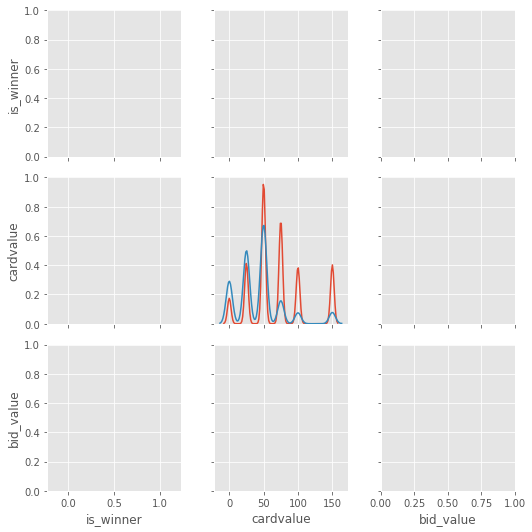

In [26]:
pairplot(test_df, hue="is_winner", diag_kind="kde")

In [62]:
streak_df = df.groupby(["streak1", "is_bidomatic1"]).mean().reset_index()
streak_df = streak_df[streak_df.is_bidomatic1==True]
streak_df = streak_df[streak_df.streak1 < 300]

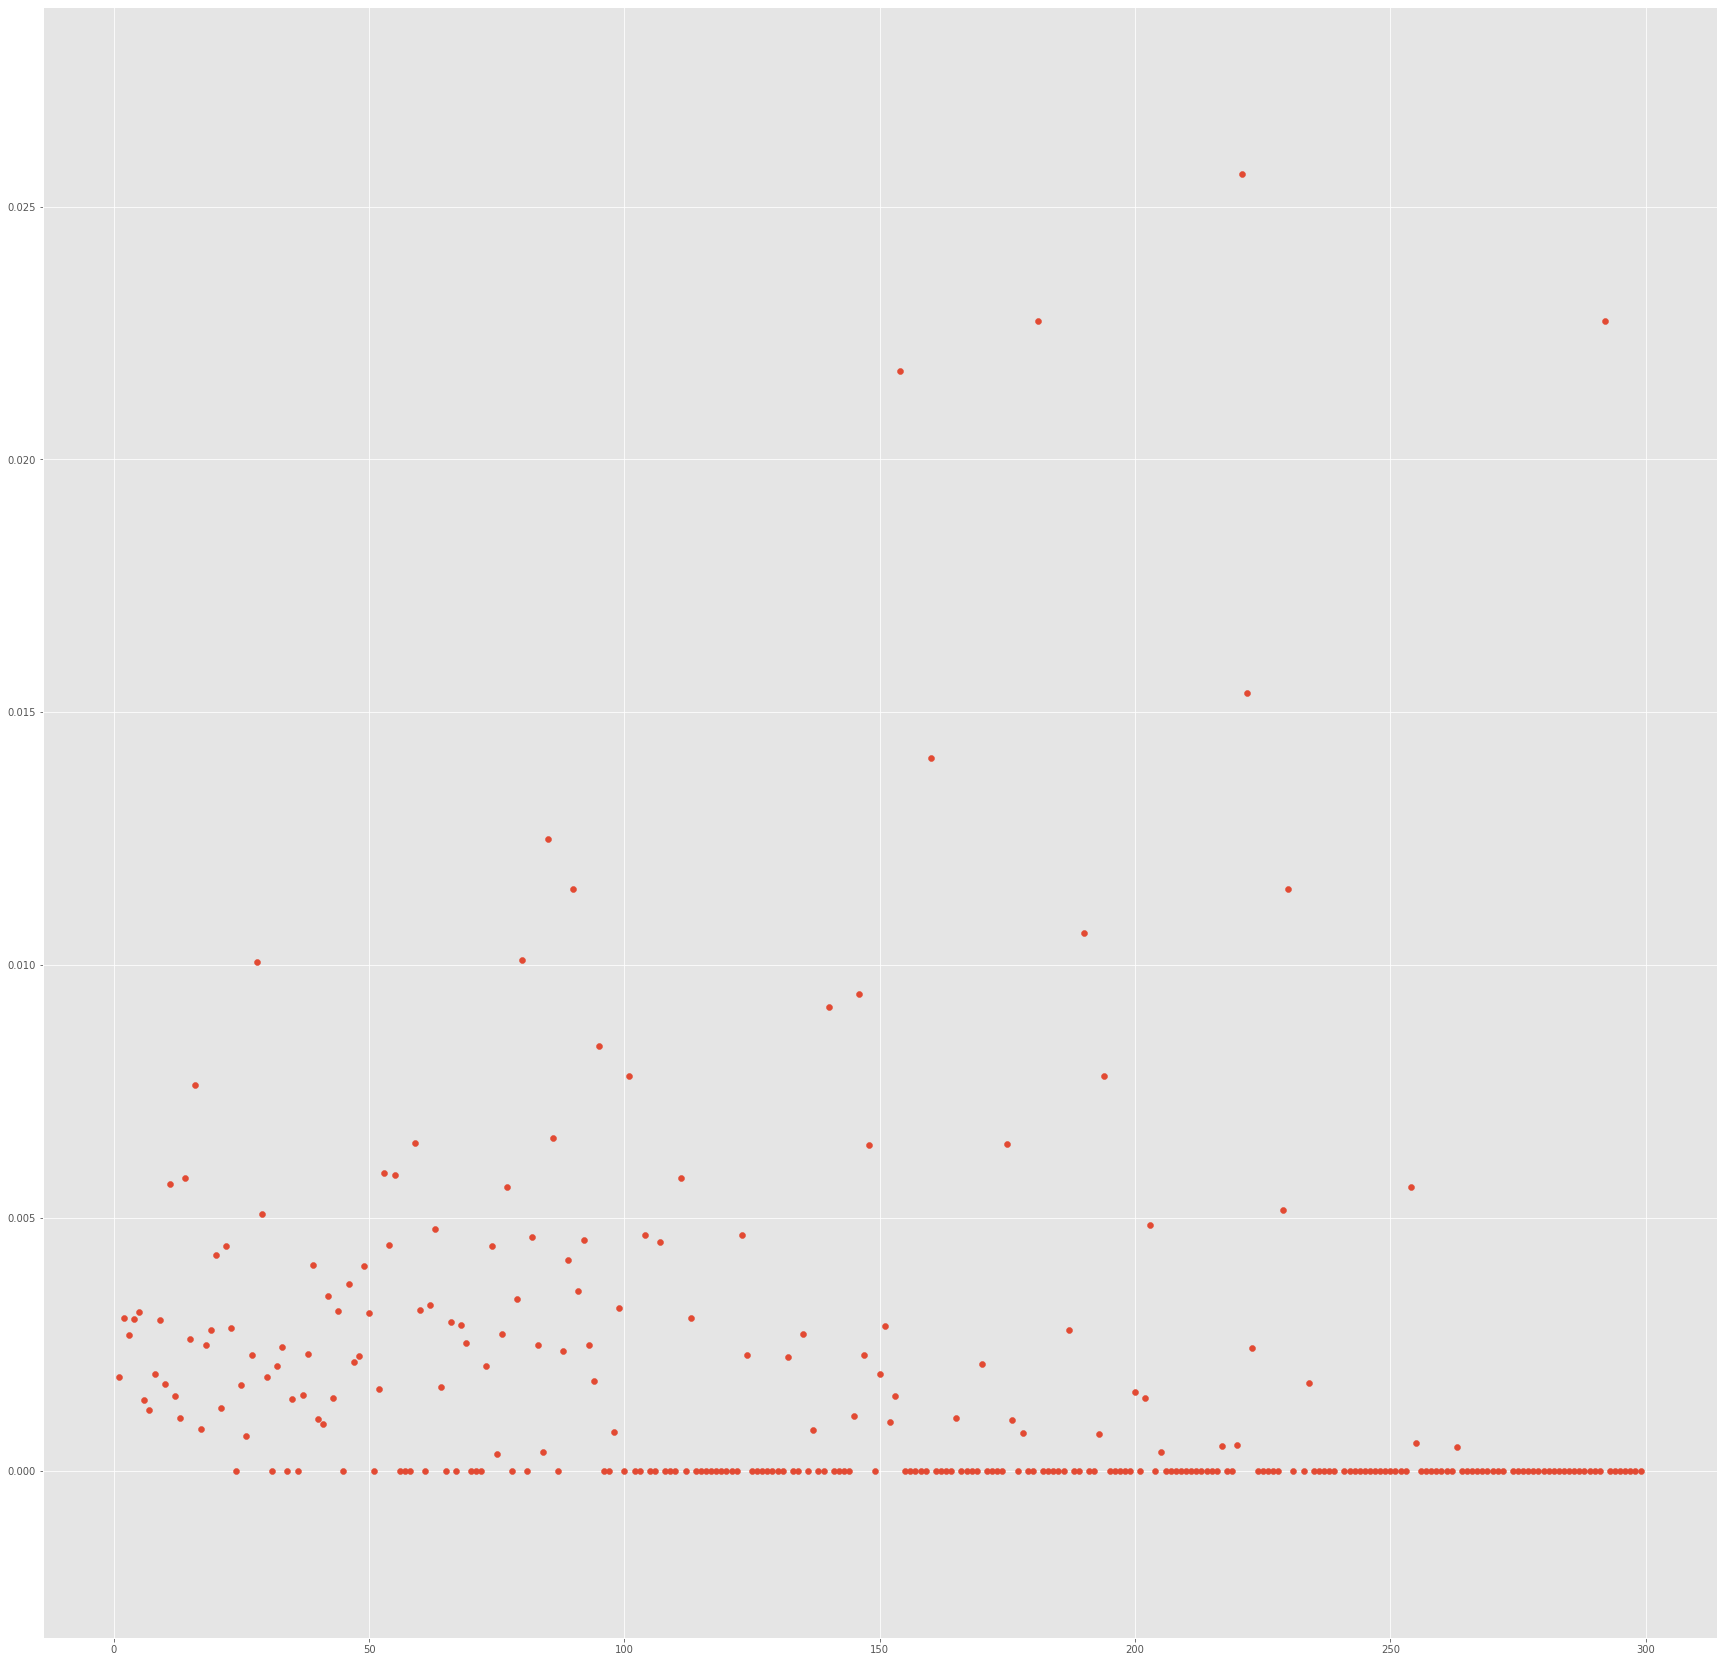

In [63]:
fig, ax = plt.subplots(figsize=(30, 30))
ax.scatter(streak_df.streak1, streak_df.is_winner)


Amazon 25 20
Amazon 25 30
Amazon 50 0
Amazon 50 20
Amazon 50 30
Amazon 50 35
Amazon 75 30
Amazon 100 30
Amazon 150 30
Home Depot 25 20
Home Depot 25 30
Home Depot 50 30
Home Depot 50 35
None 0 15
None 0 25
None 0 50
None 0 100
None 0 250
Shell 25 20
Shell 25 30
Shell 50 0


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


Shell 50 20
Shell 50 30
Shell 50 35
Target 25 20
Target 25 30
Walmart 25 20
Walmart 25 30
Walmart 50 0
Walmart 50 20
Walmart 50 30
Walmart 50 35


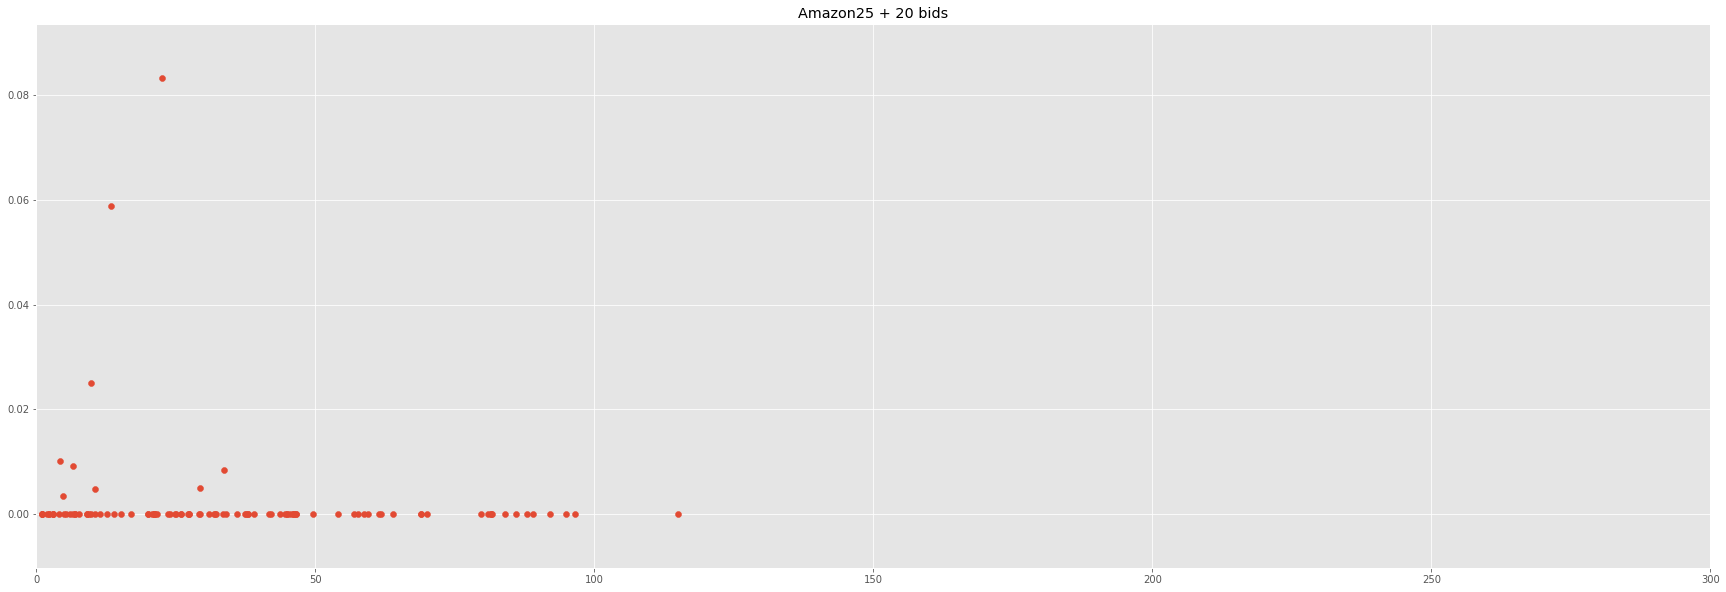

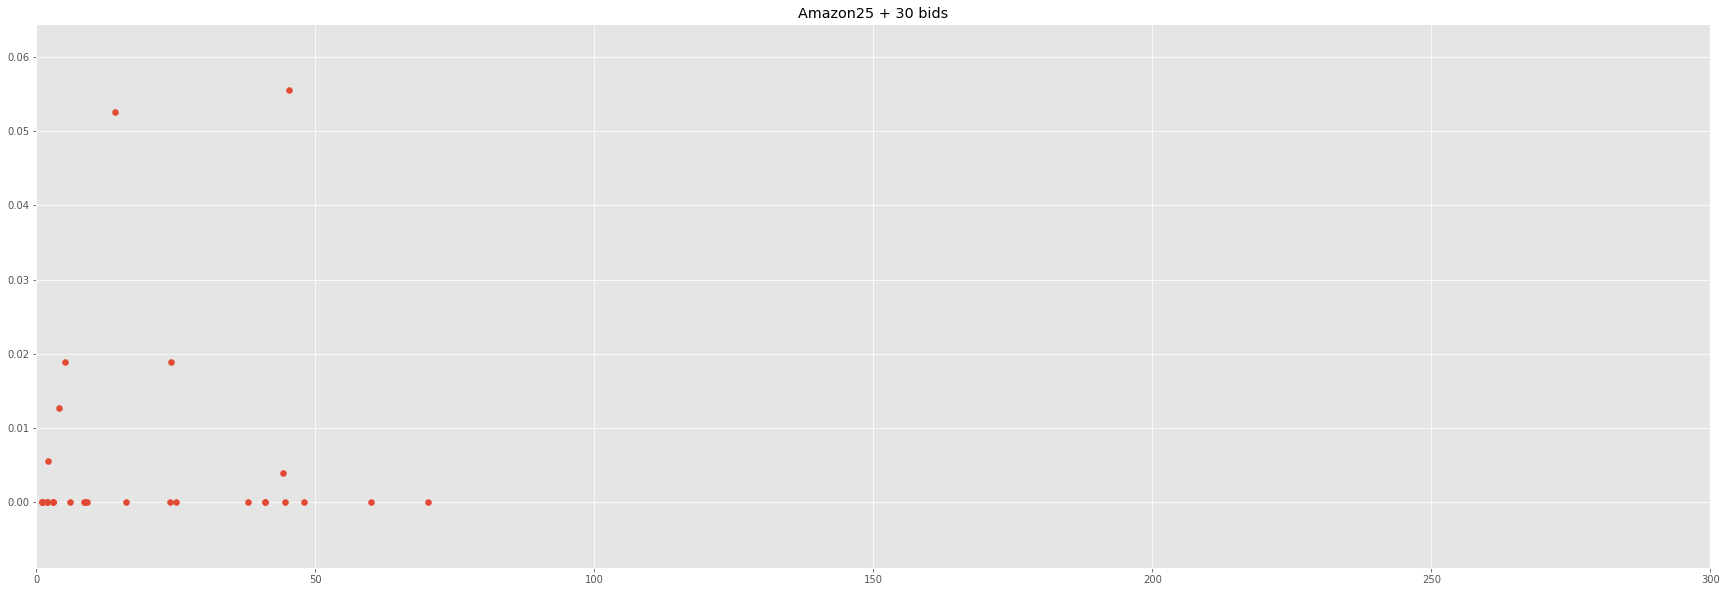

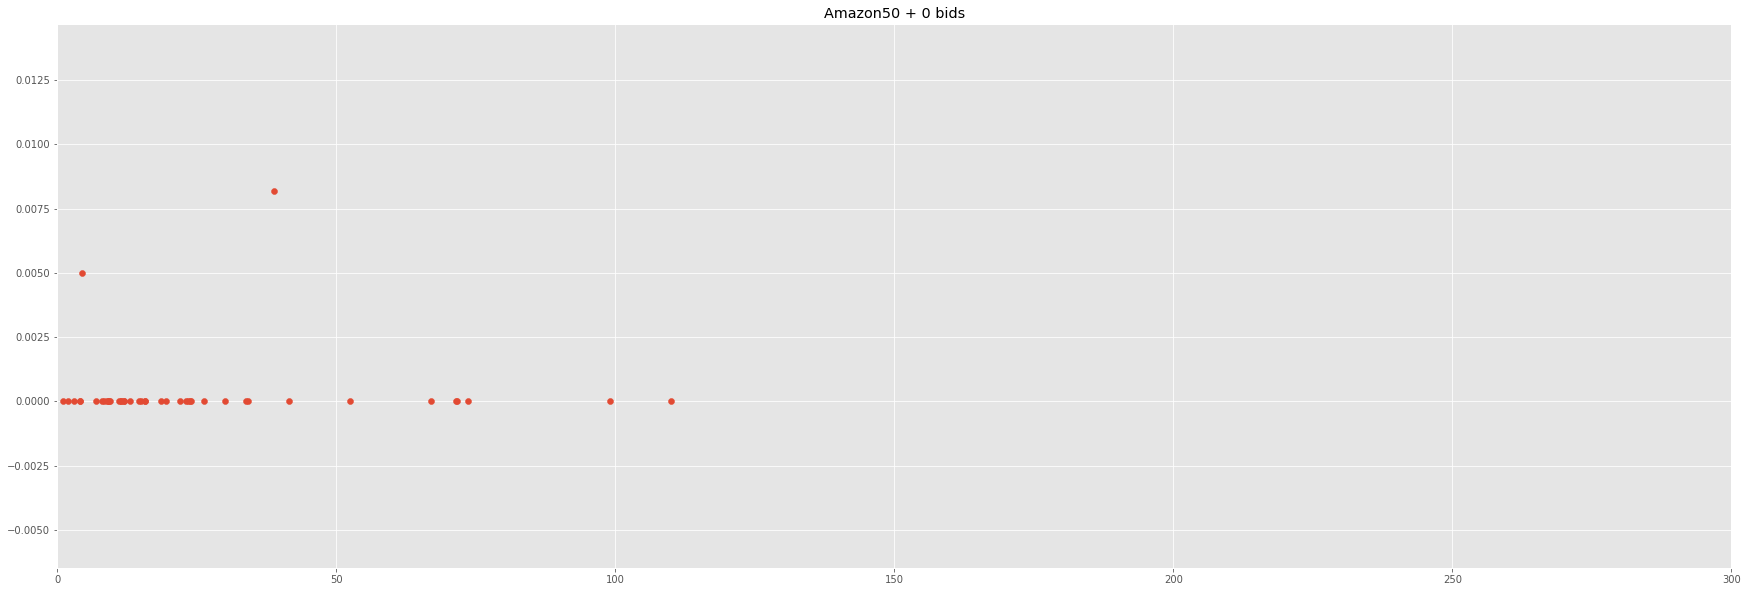

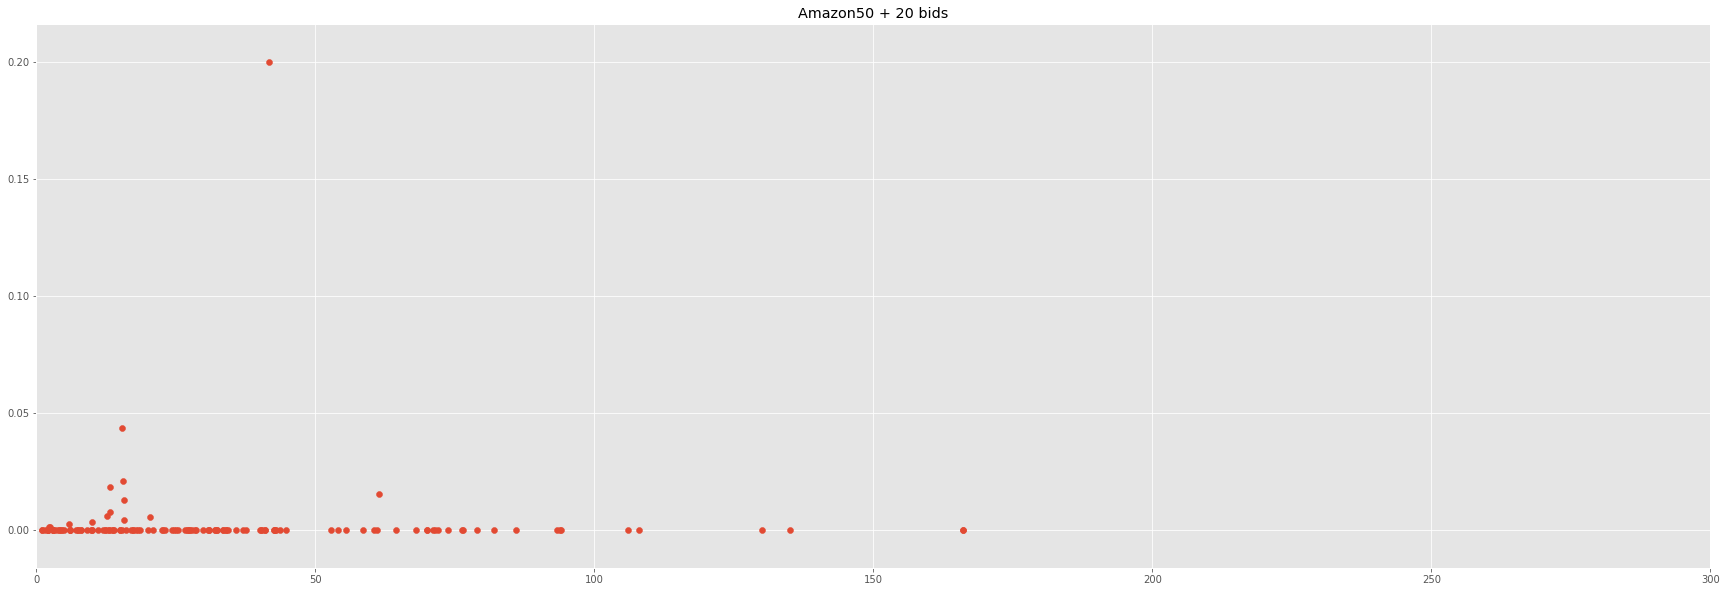

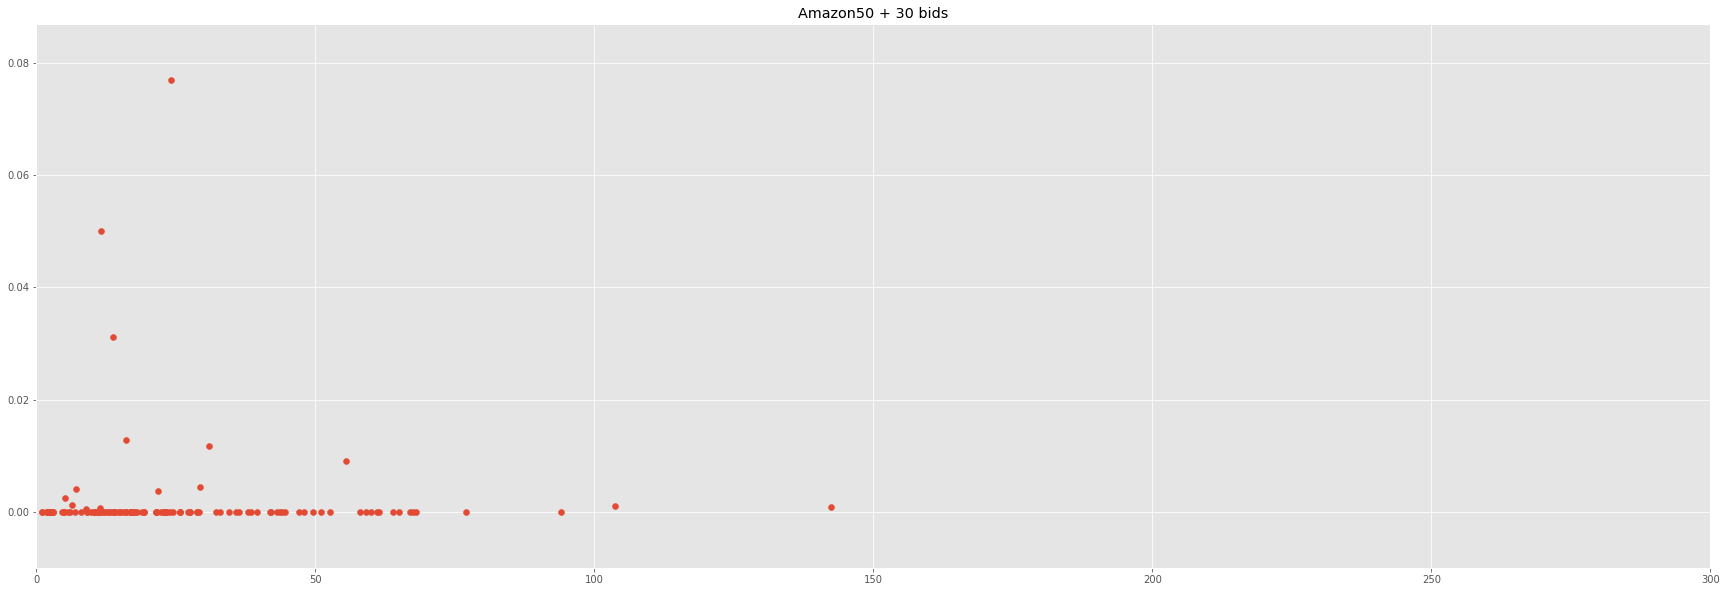

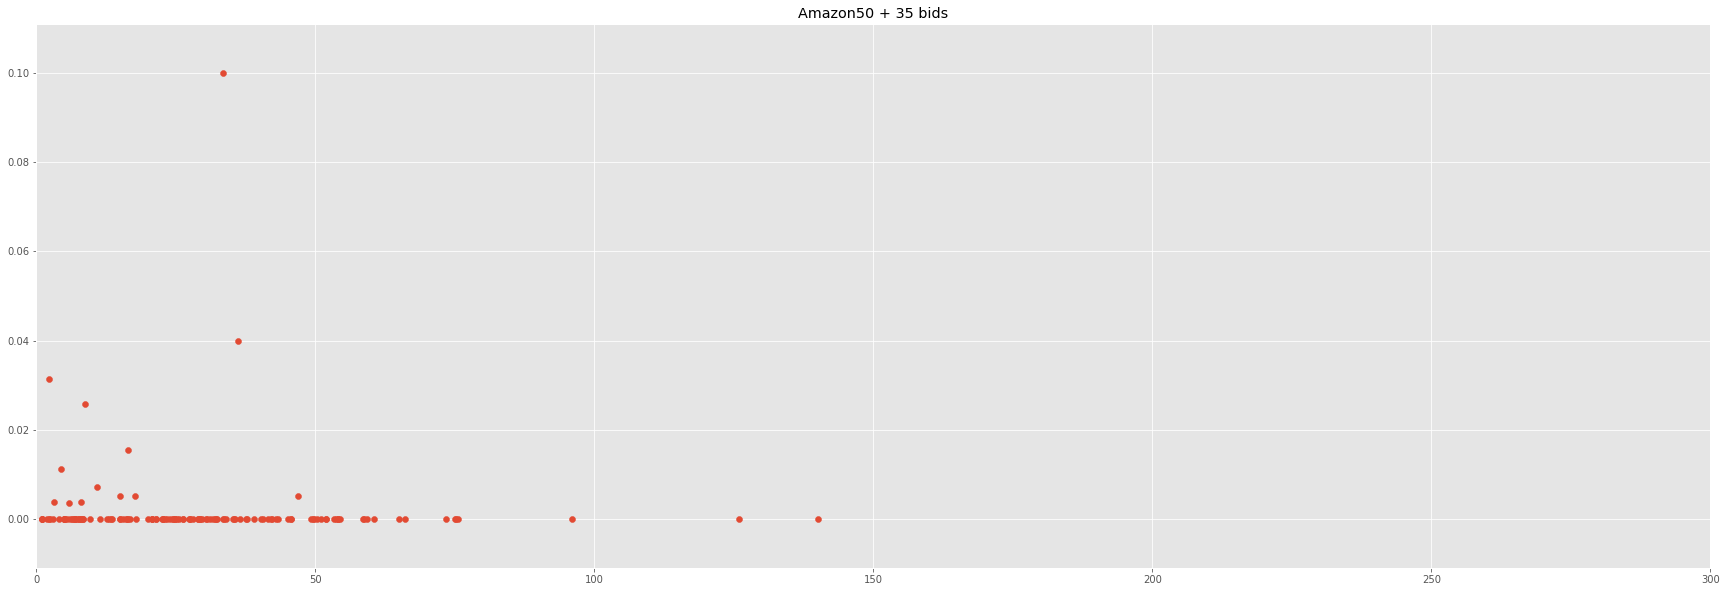

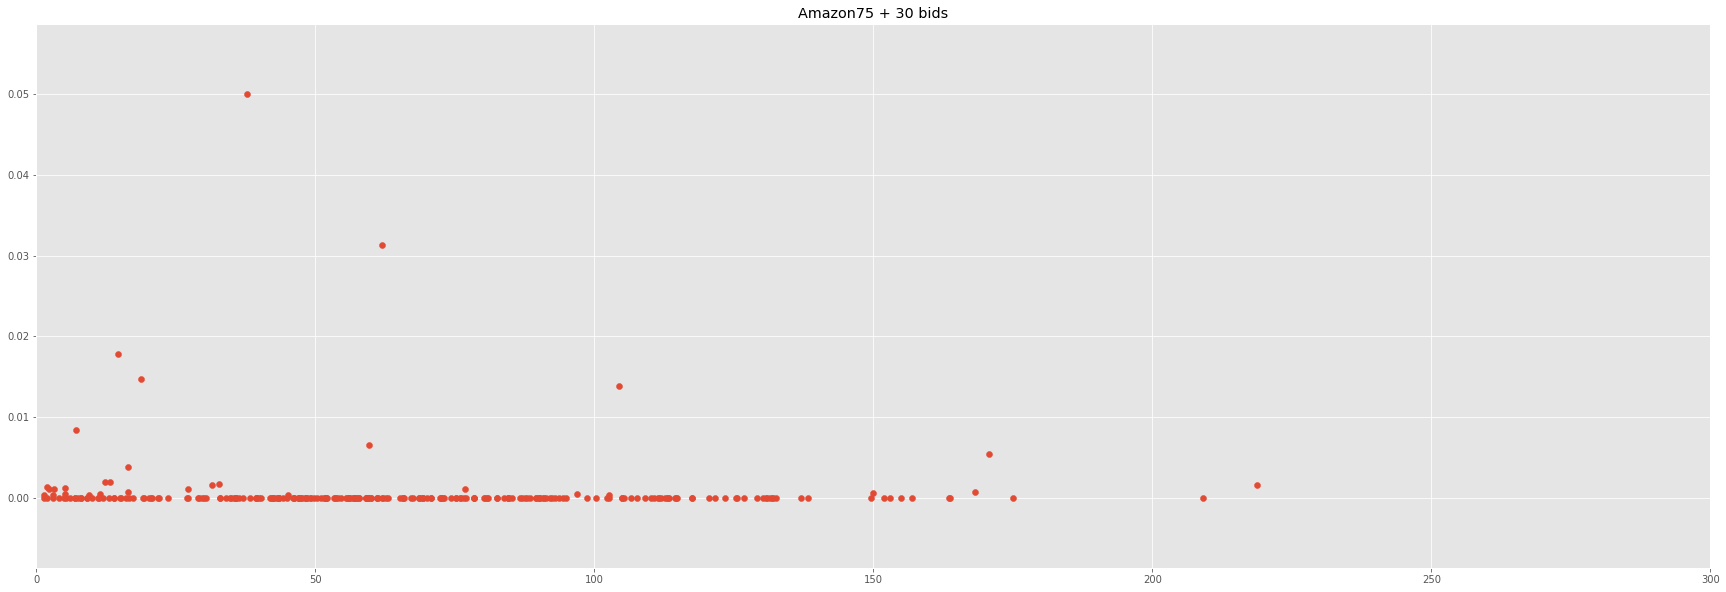

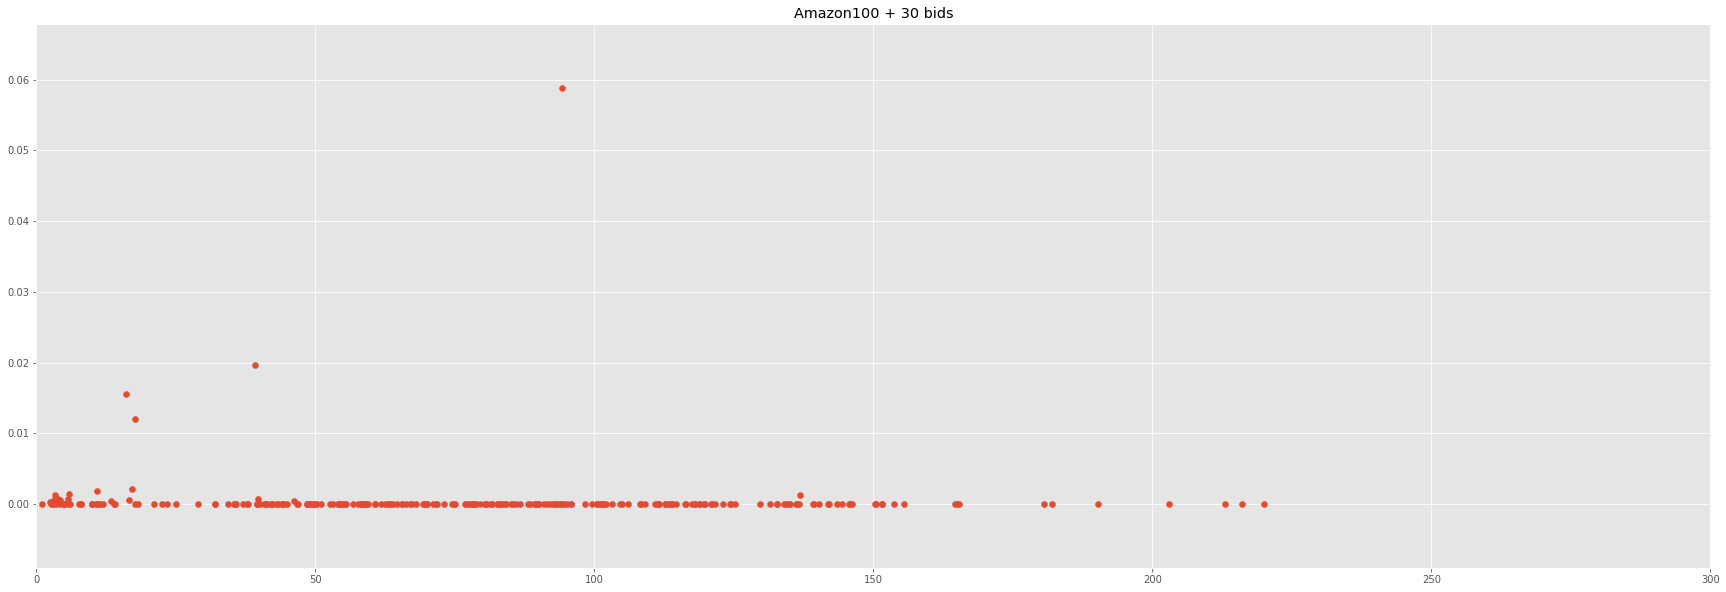

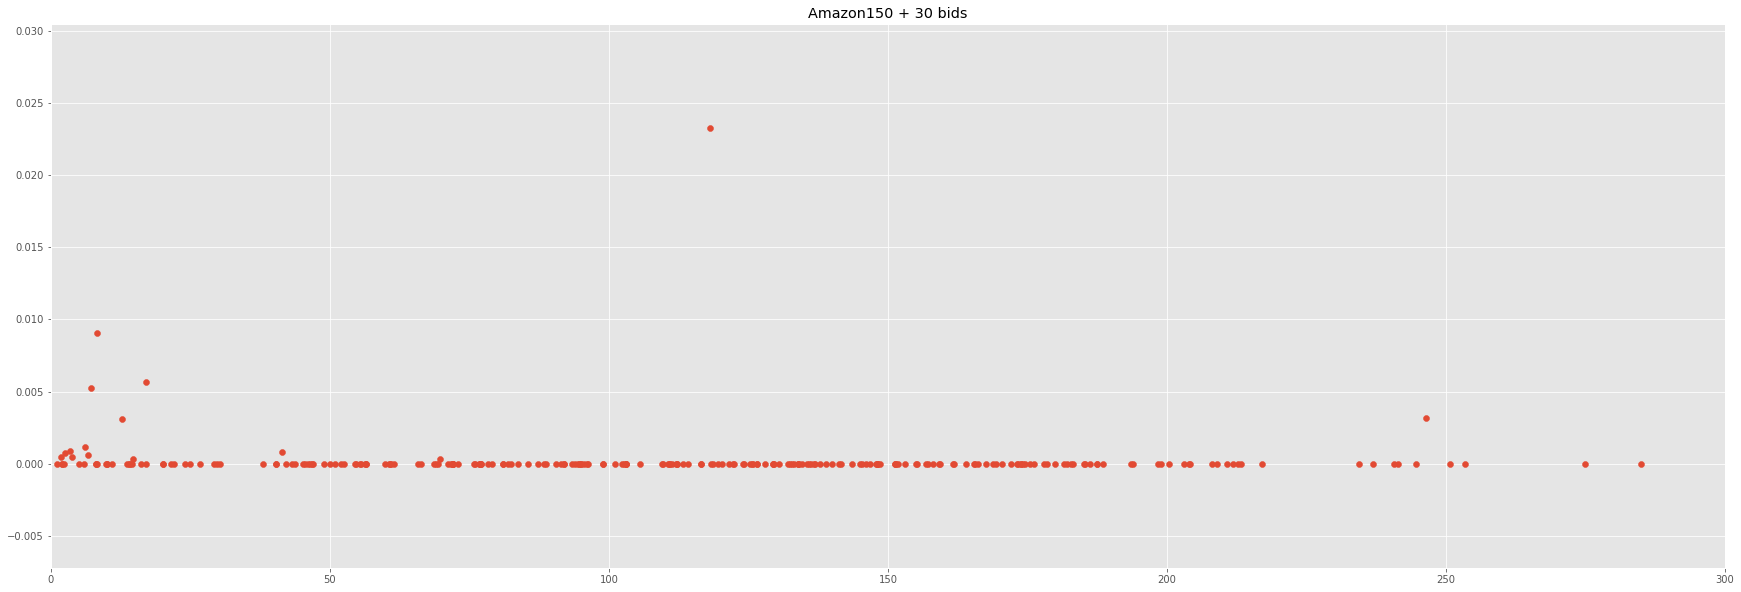

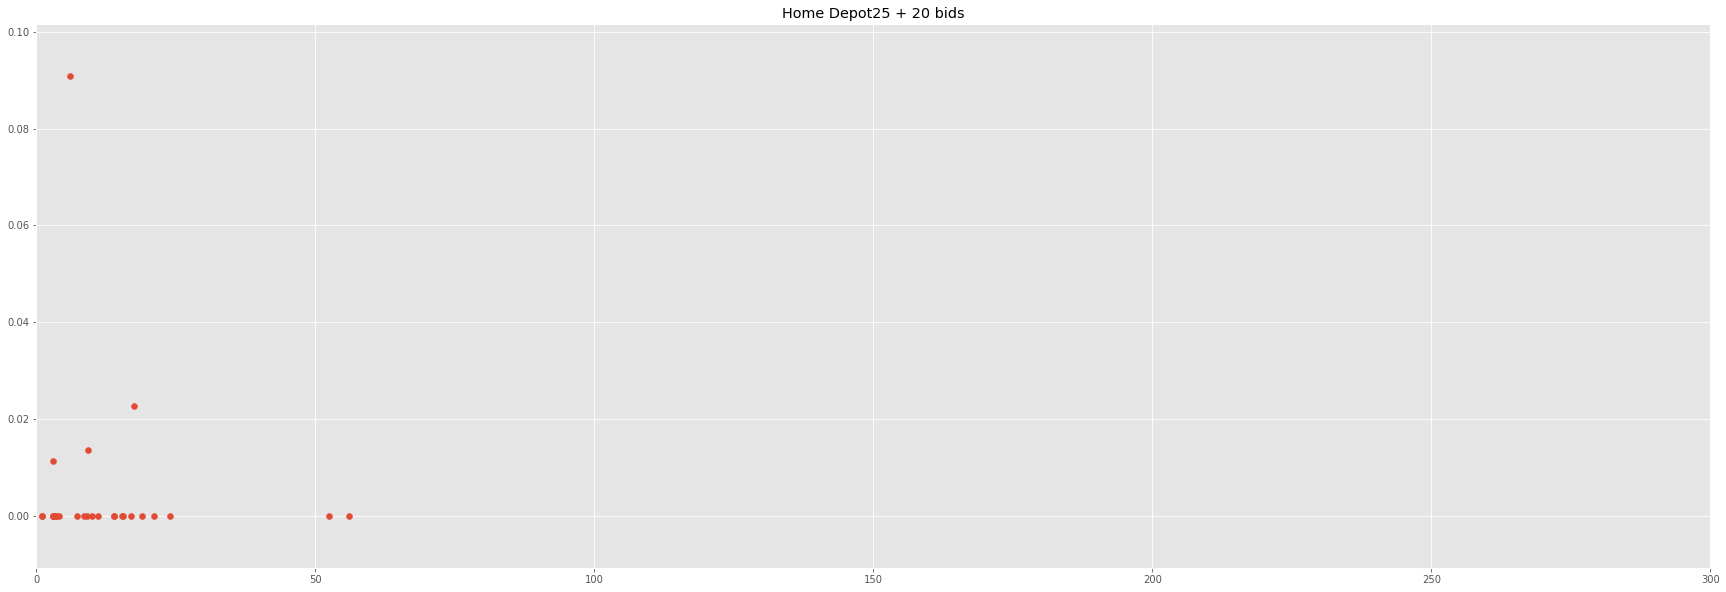

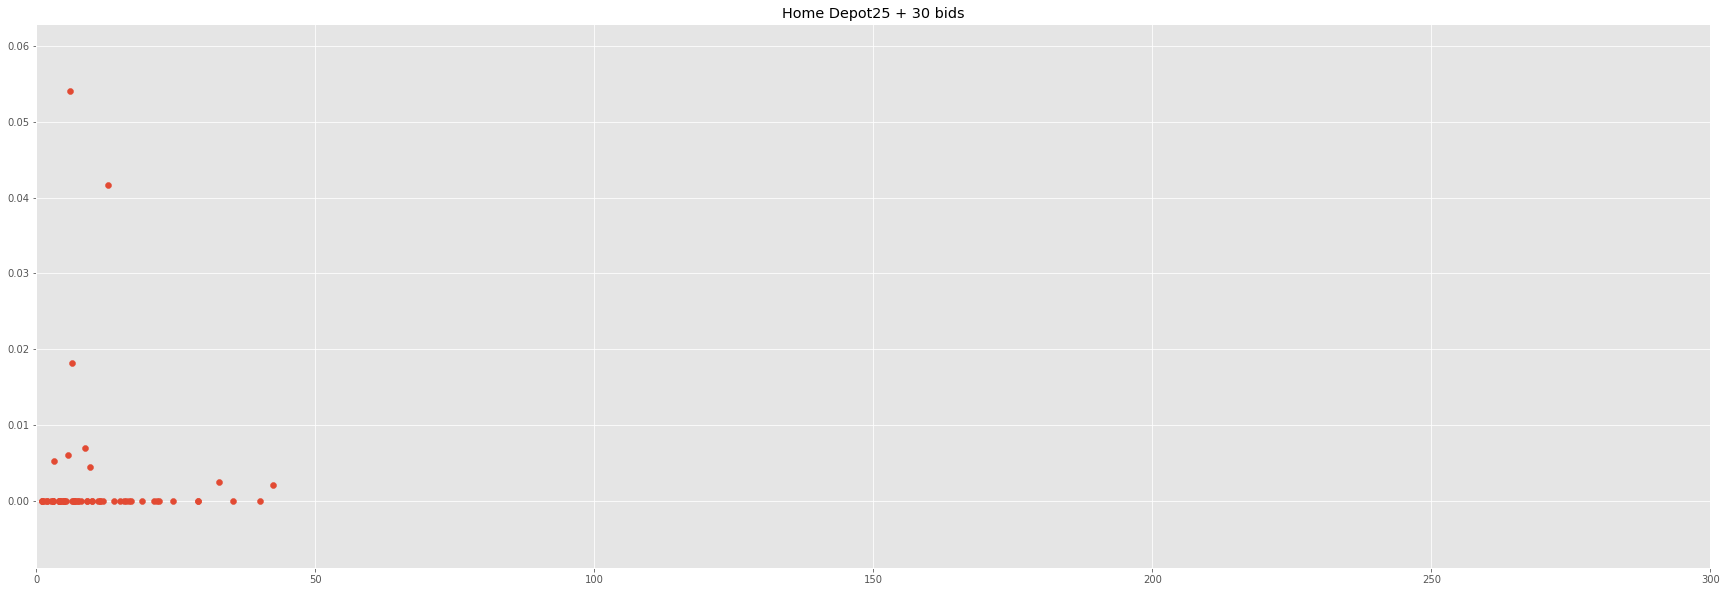

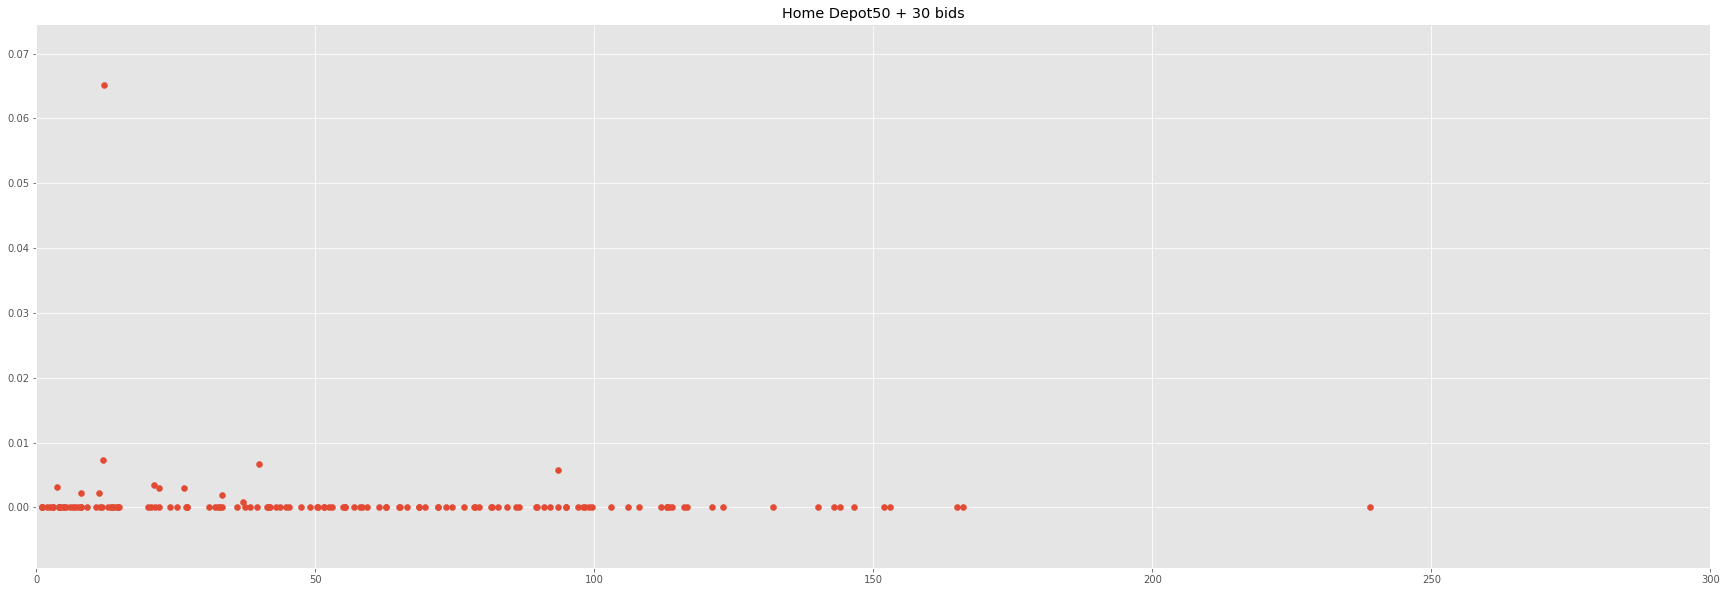

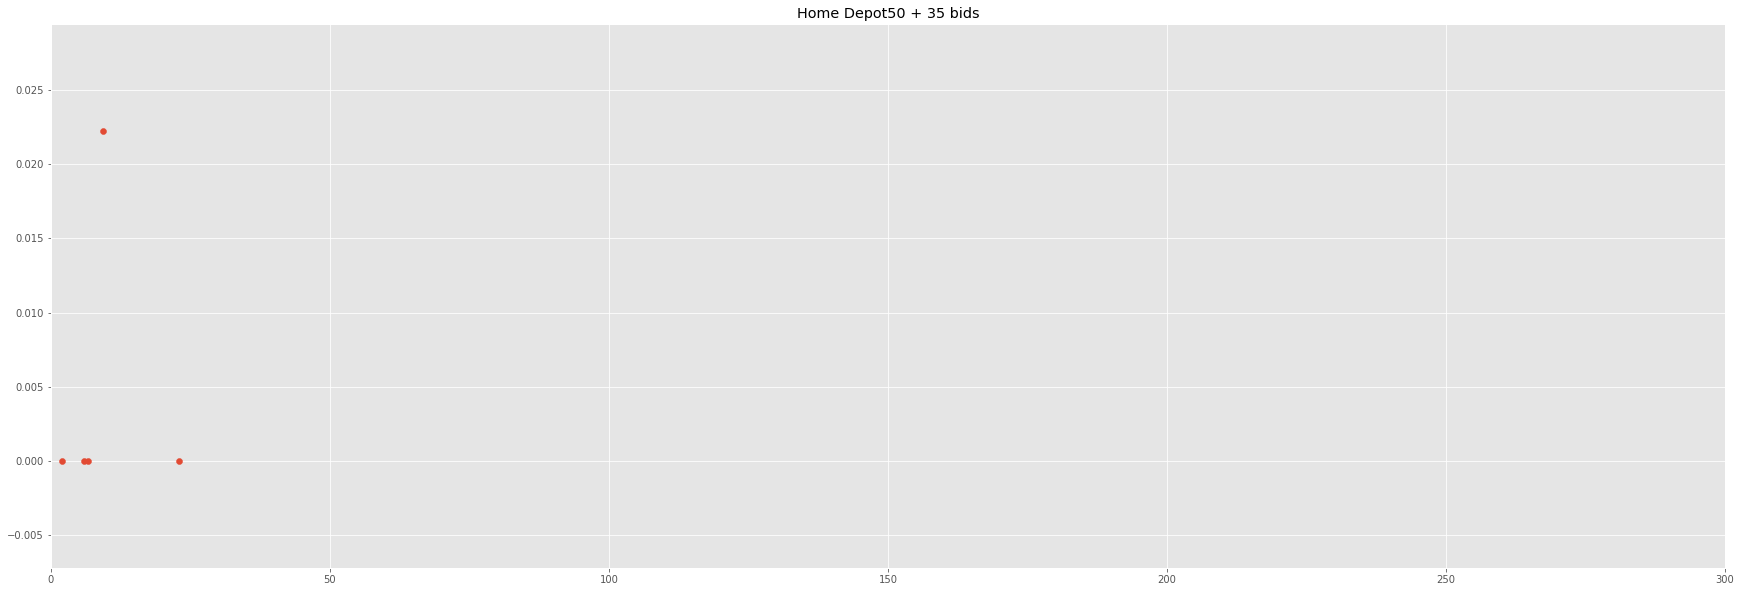

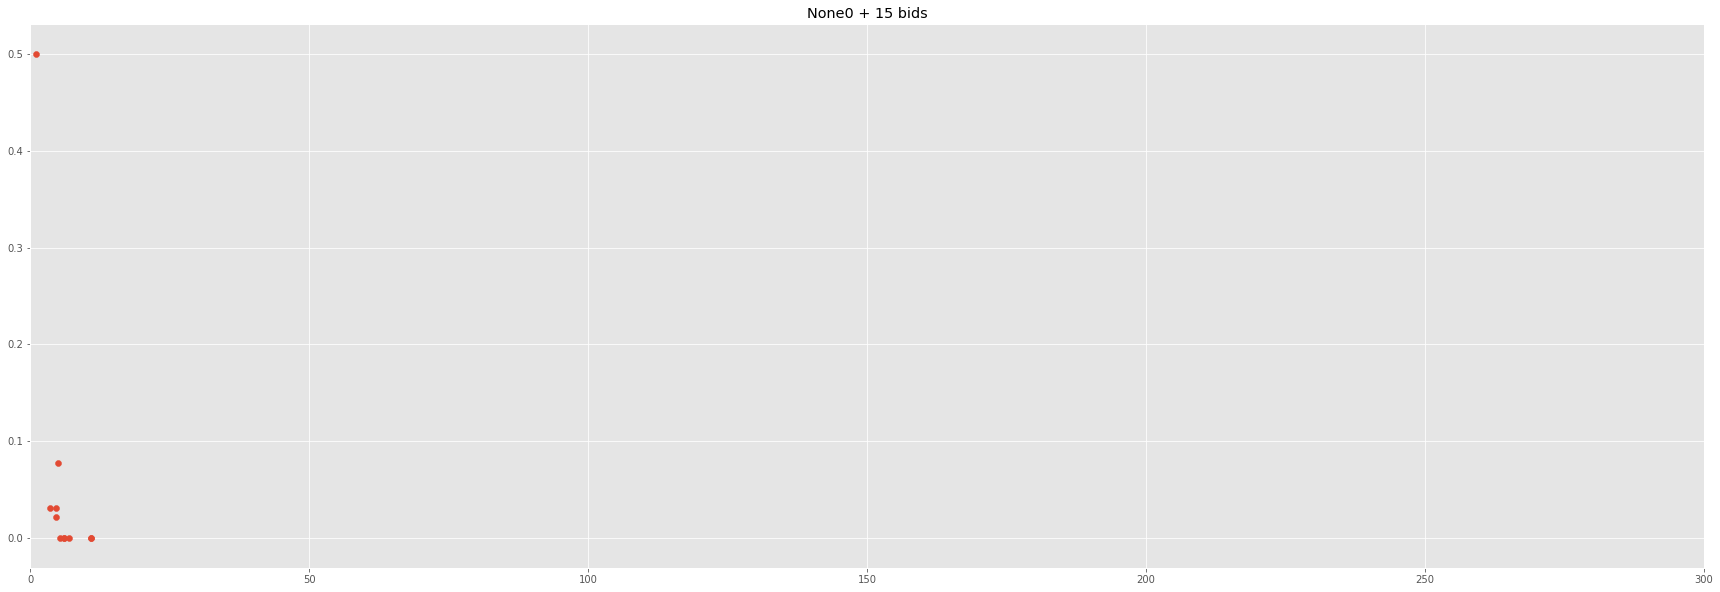

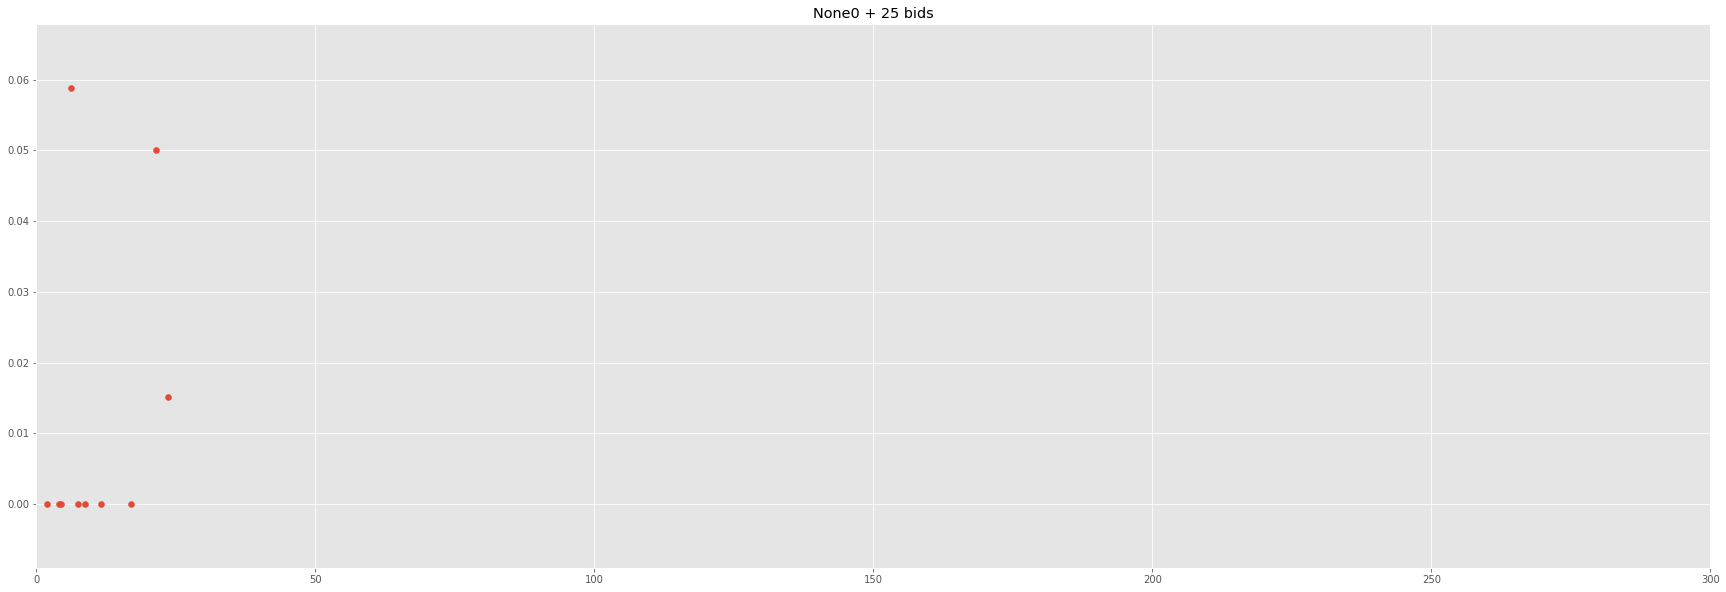

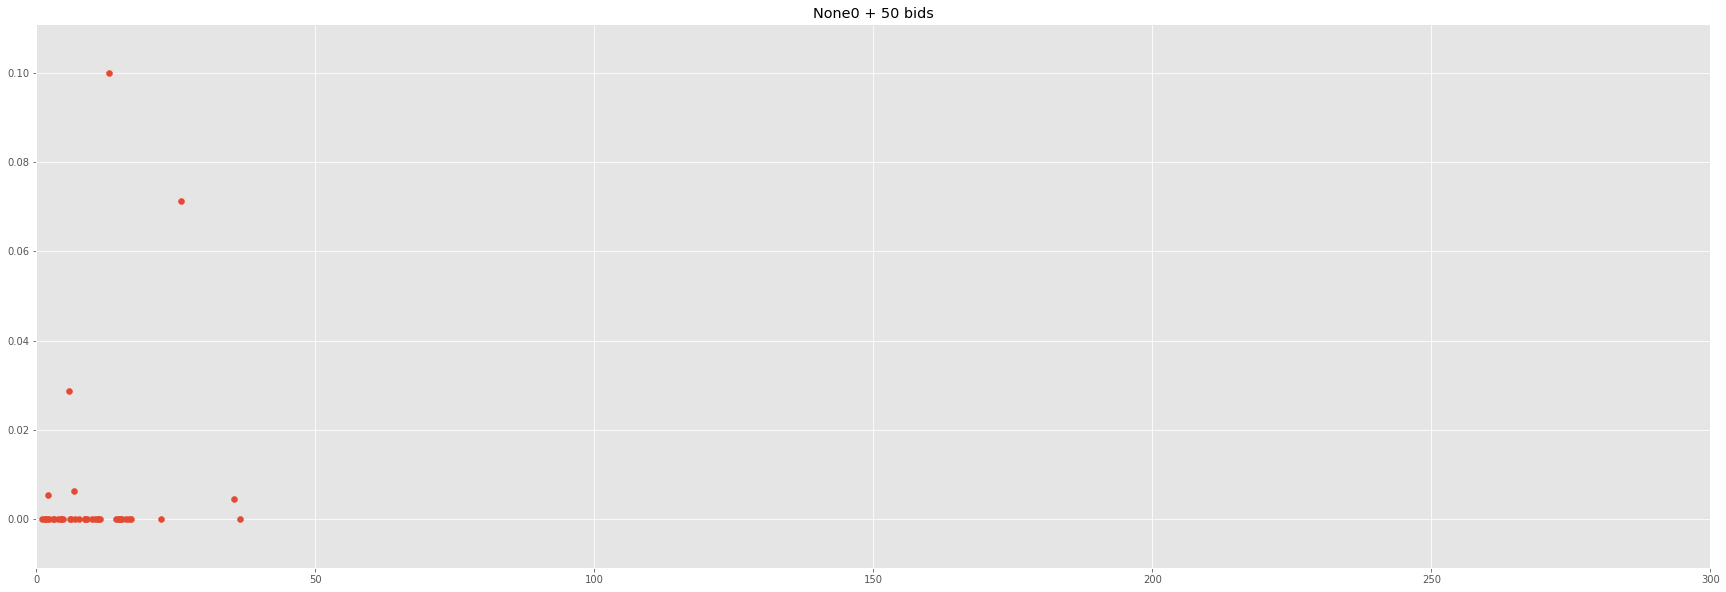

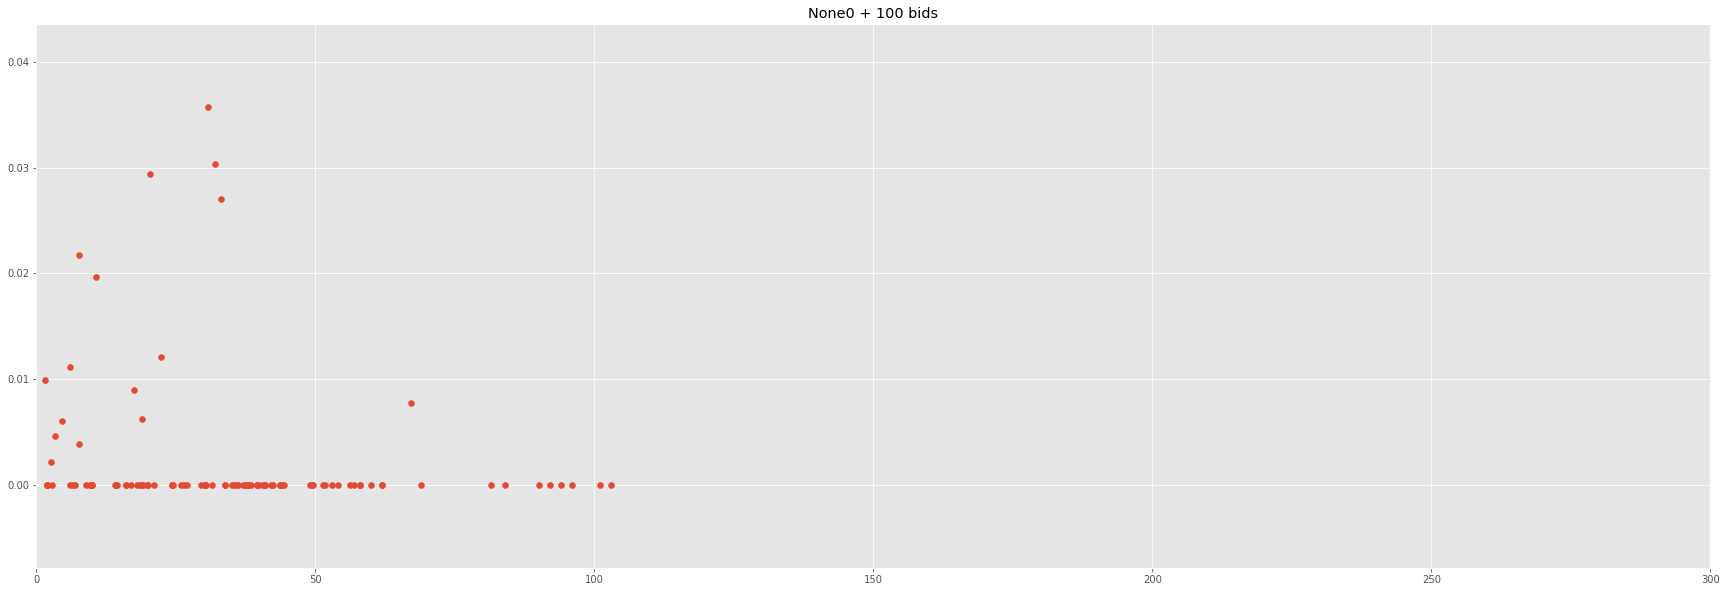

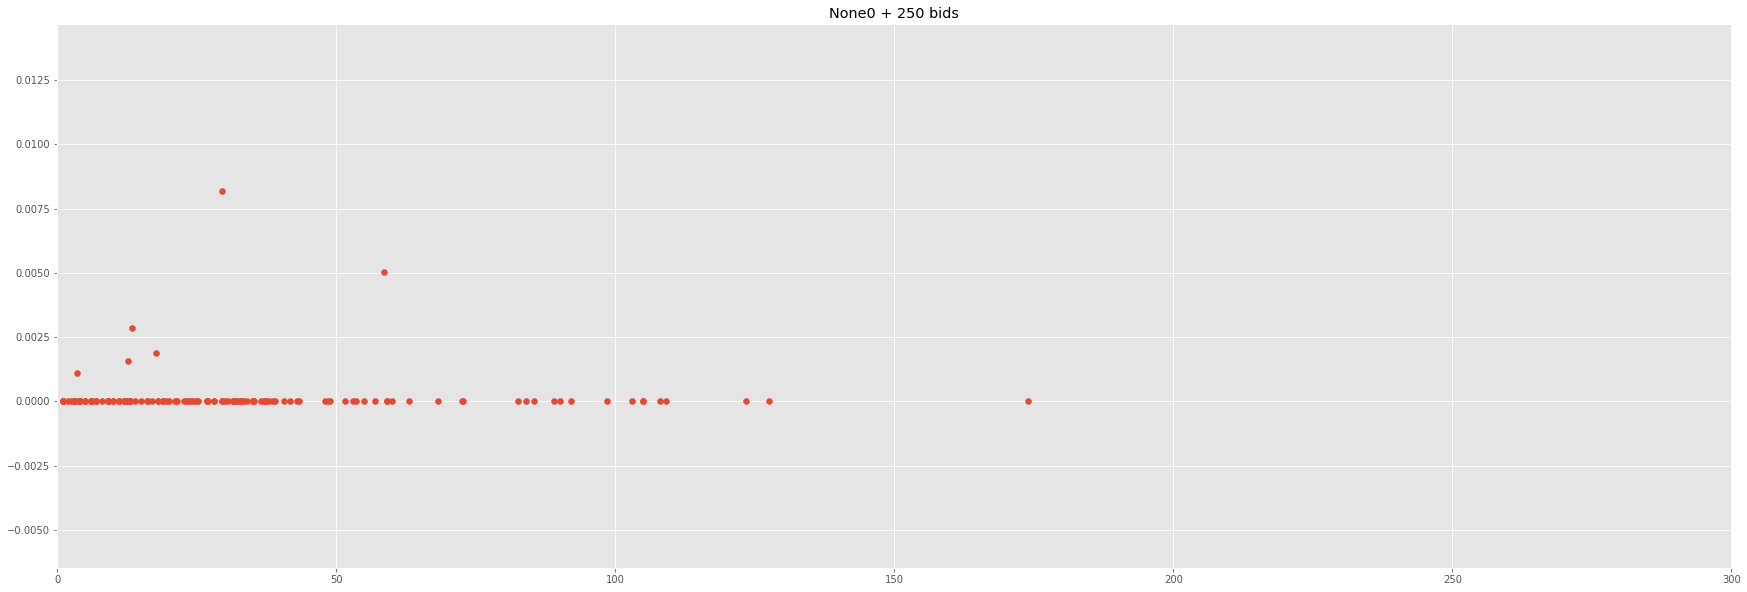

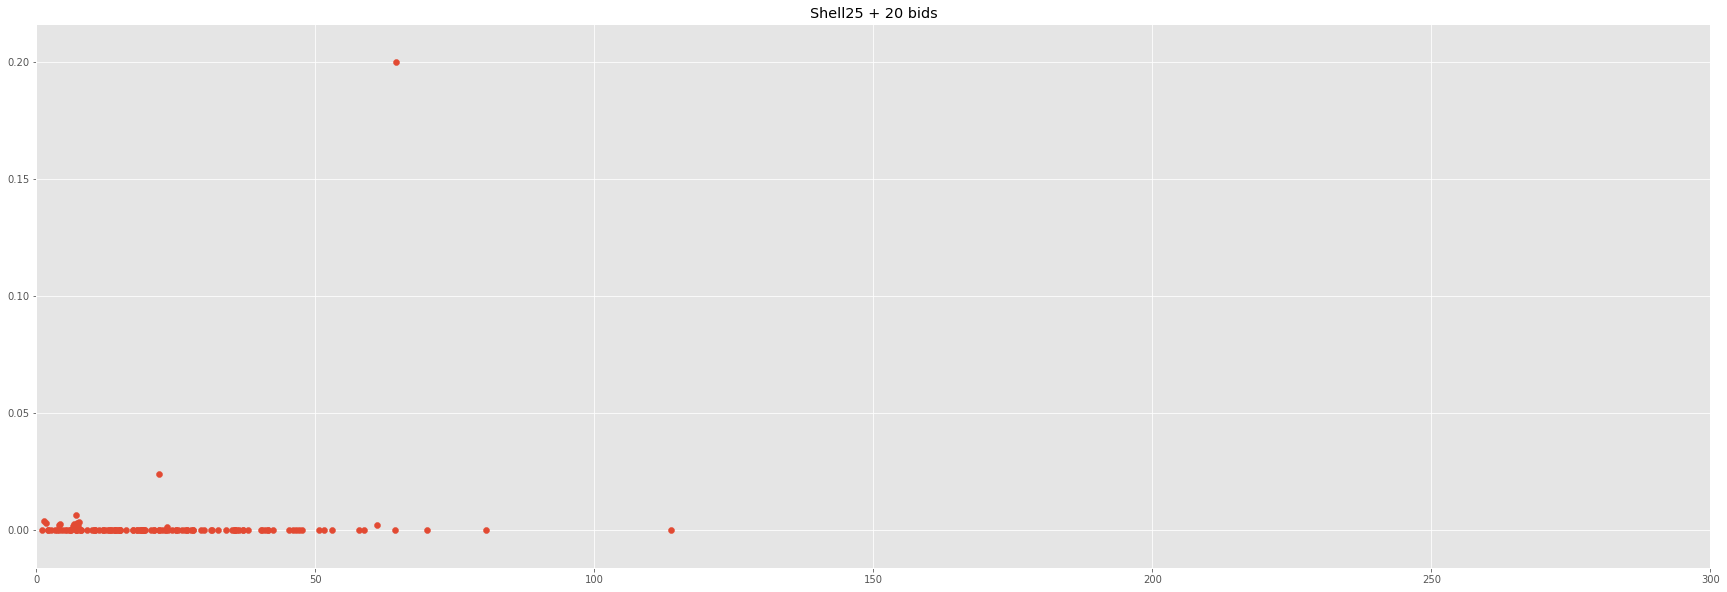

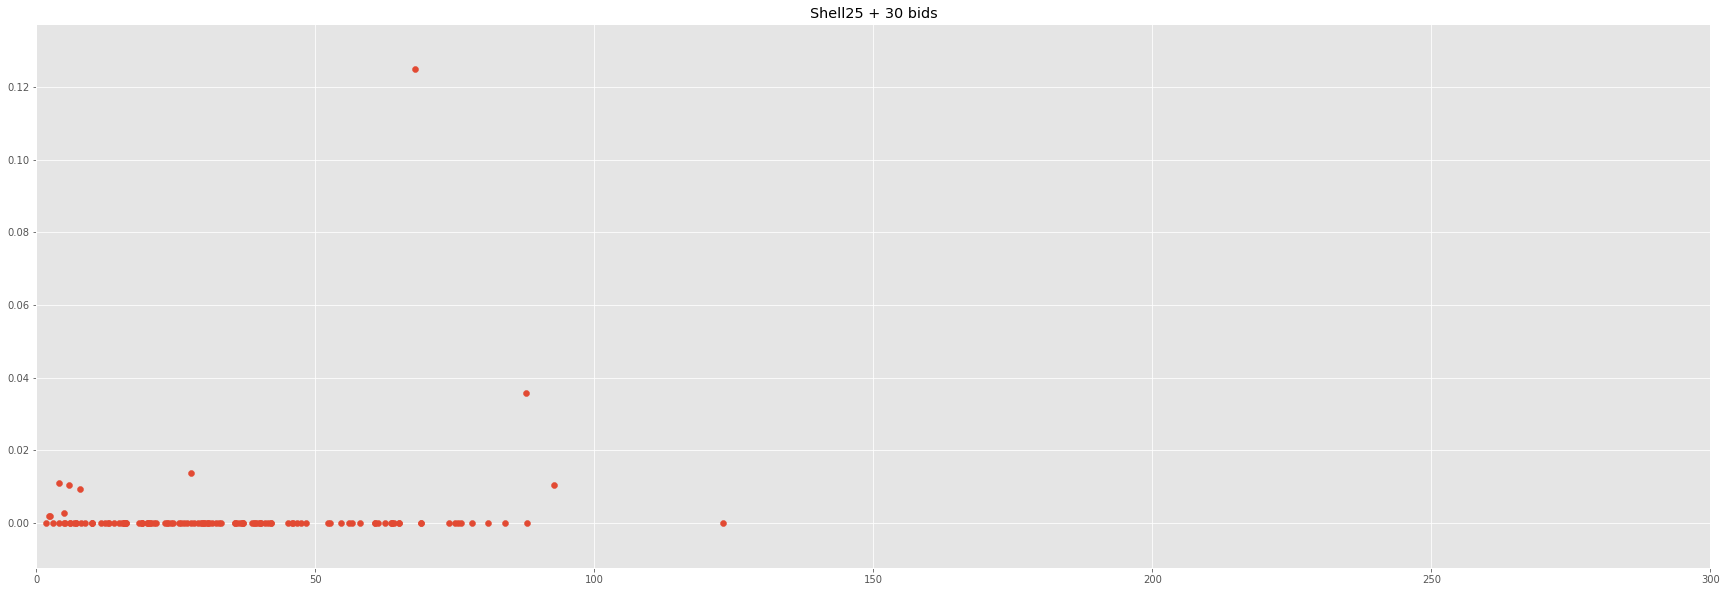

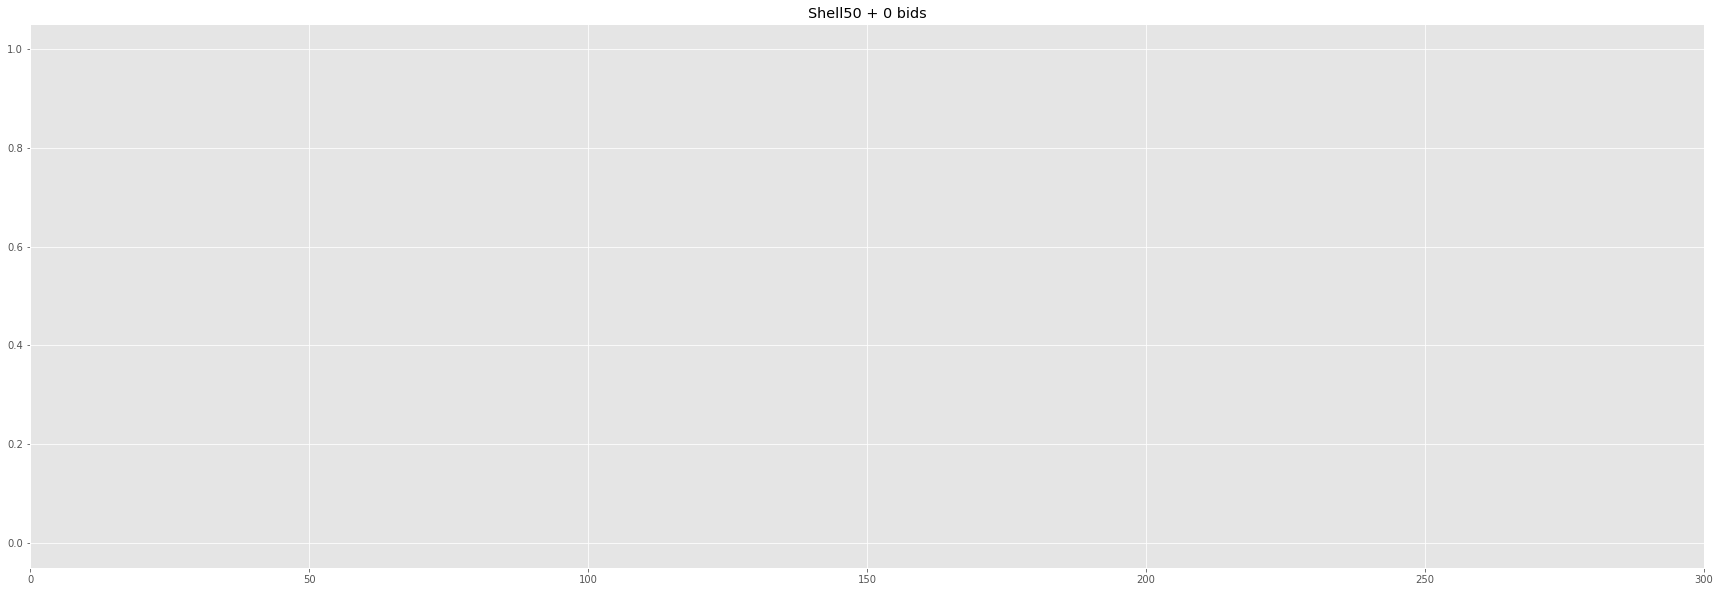

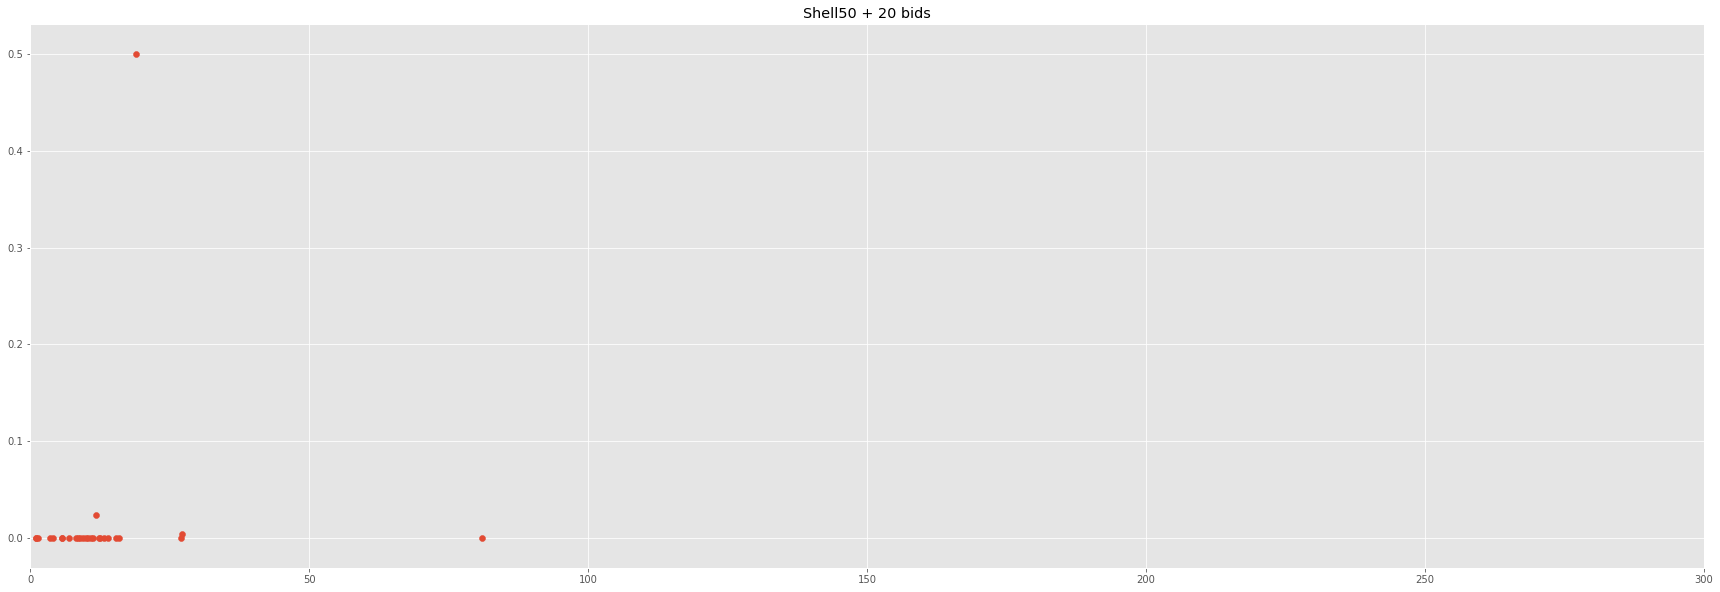

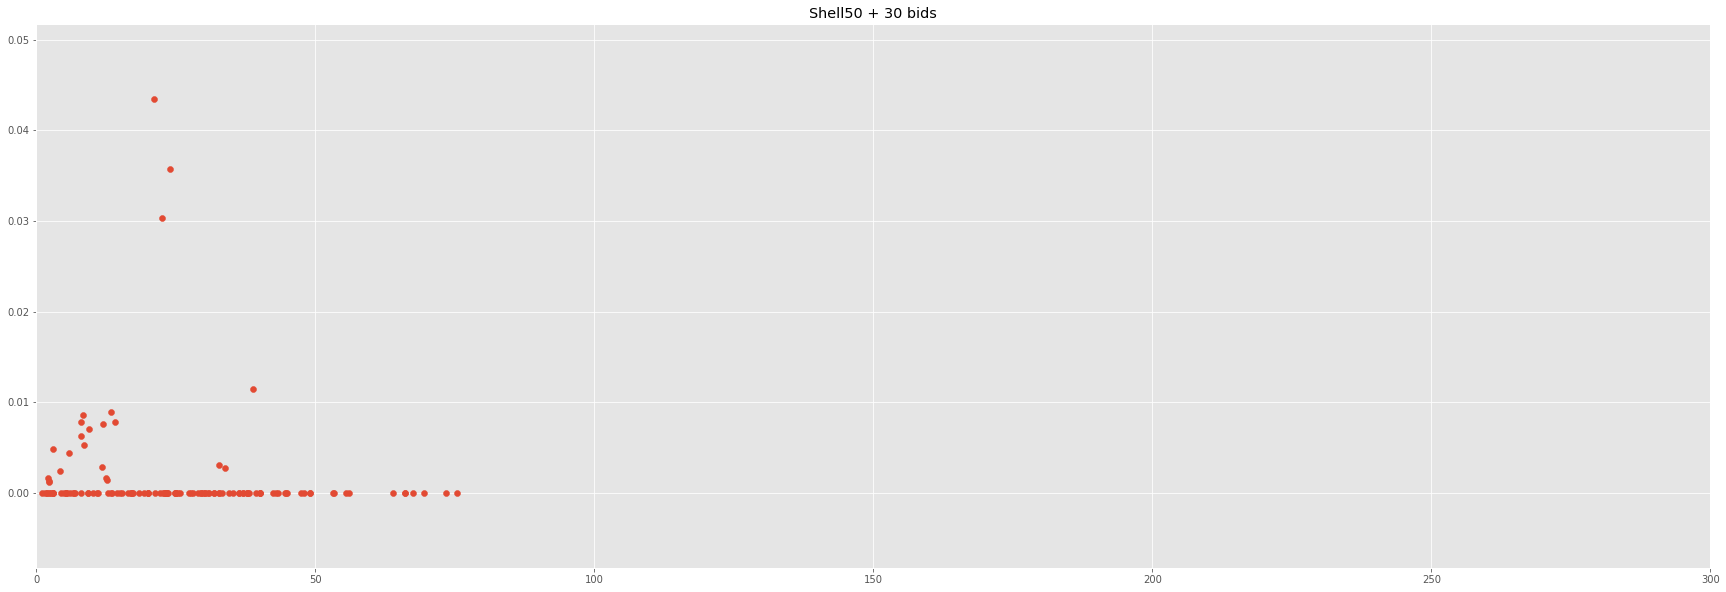

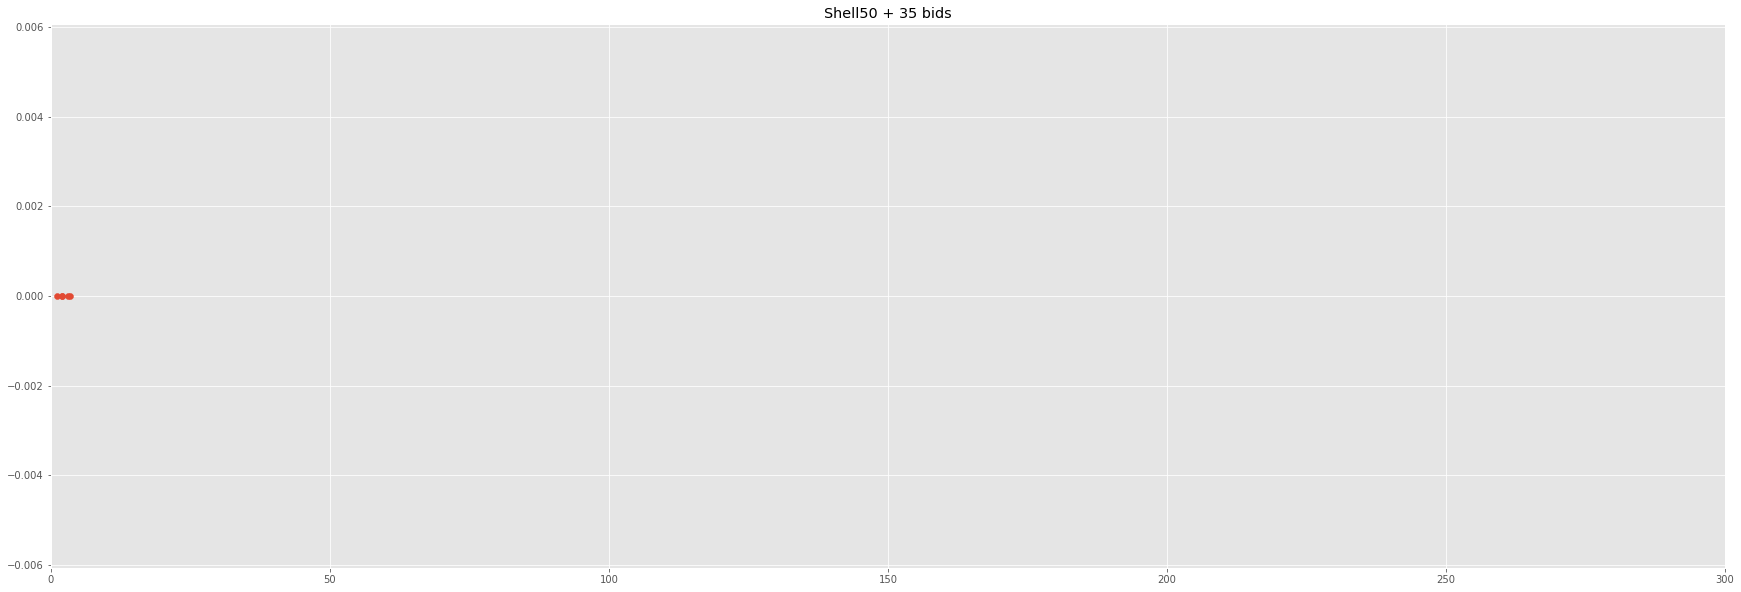

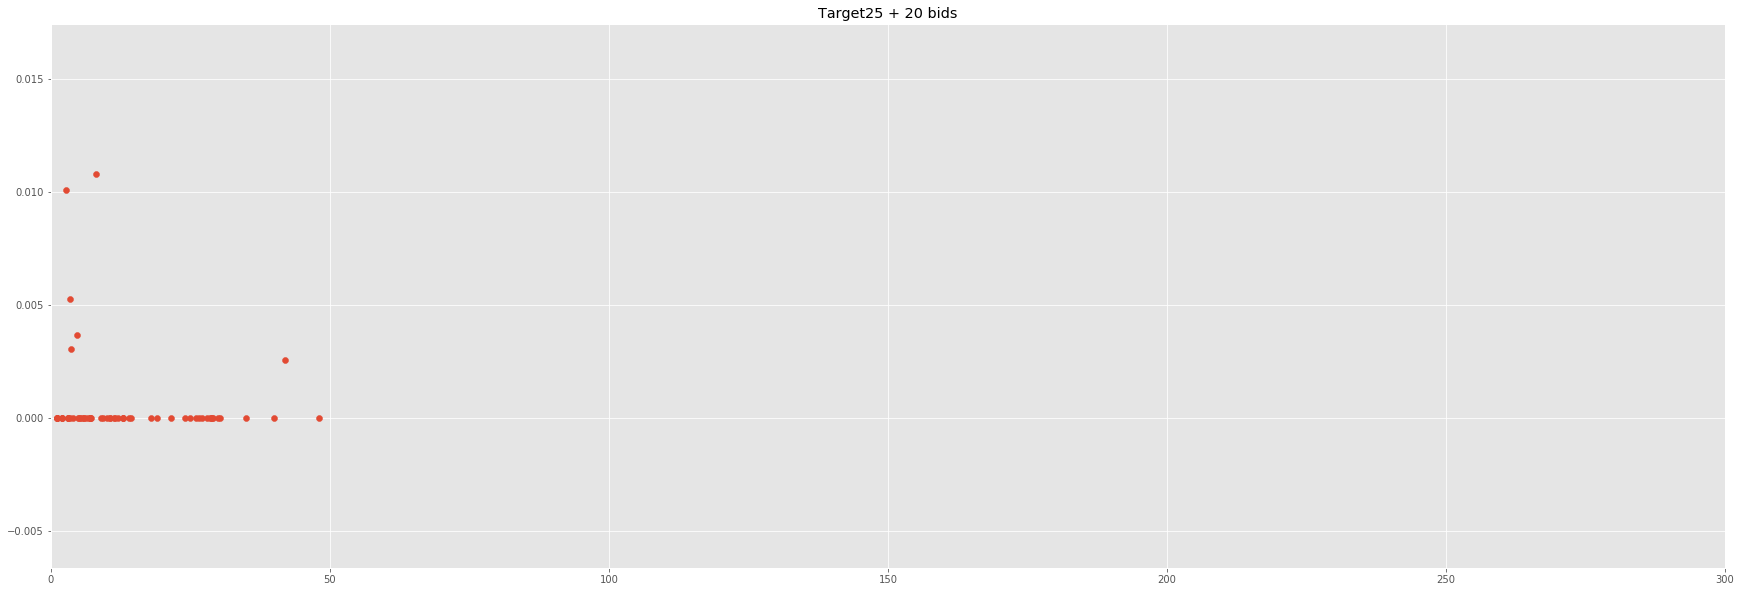

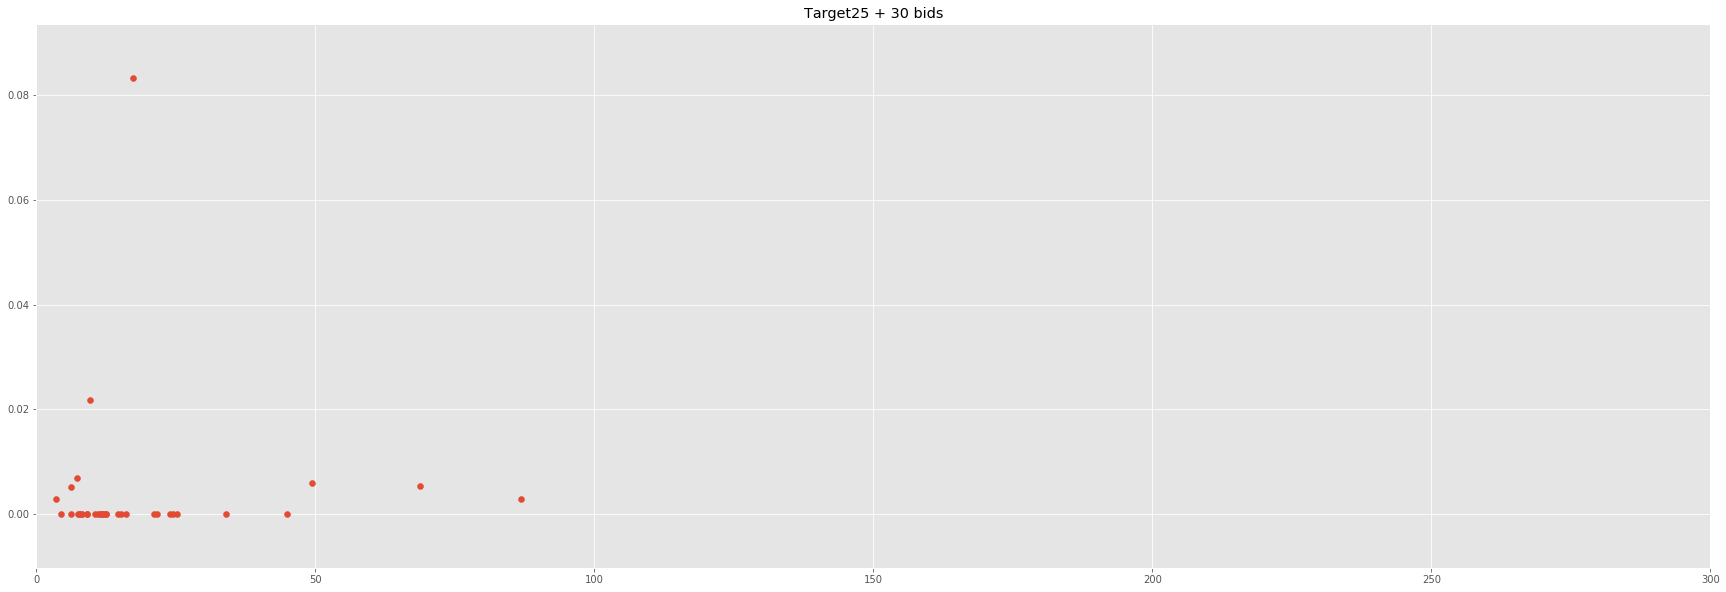

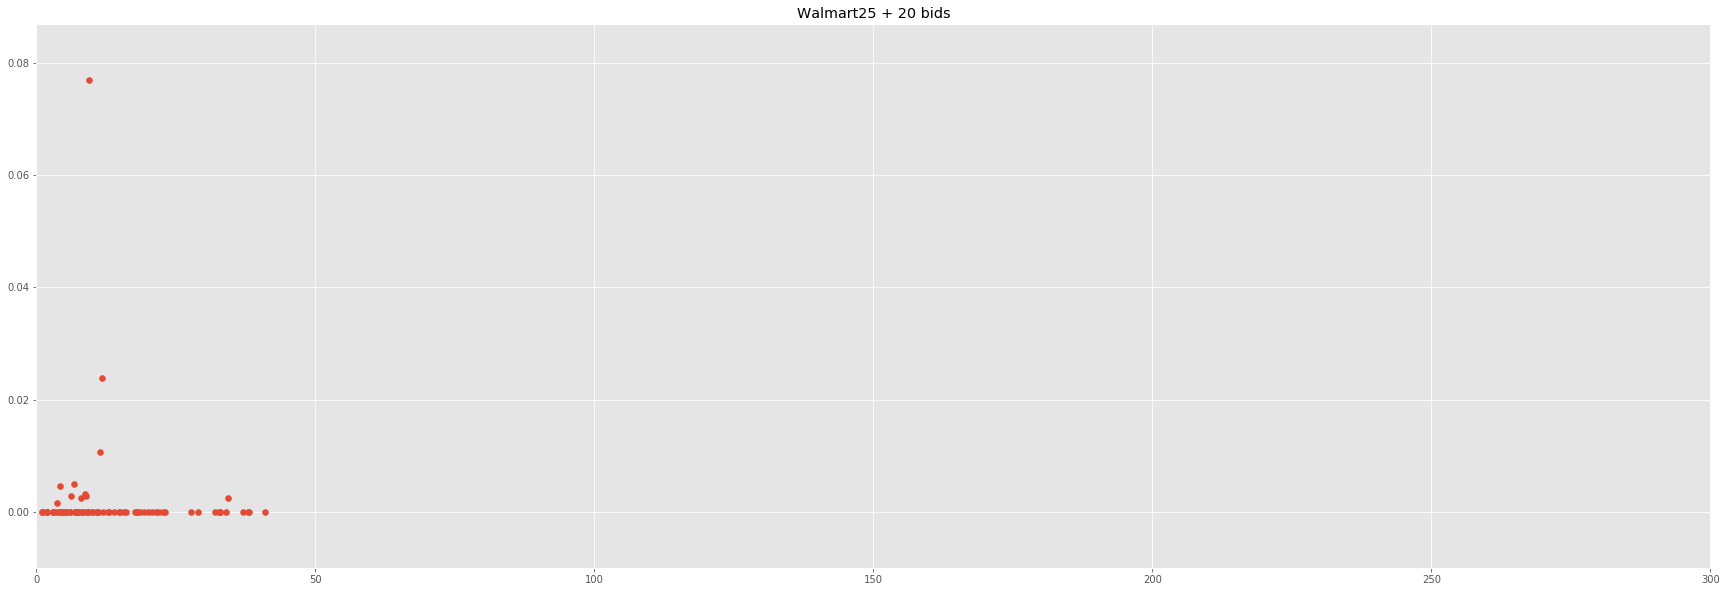

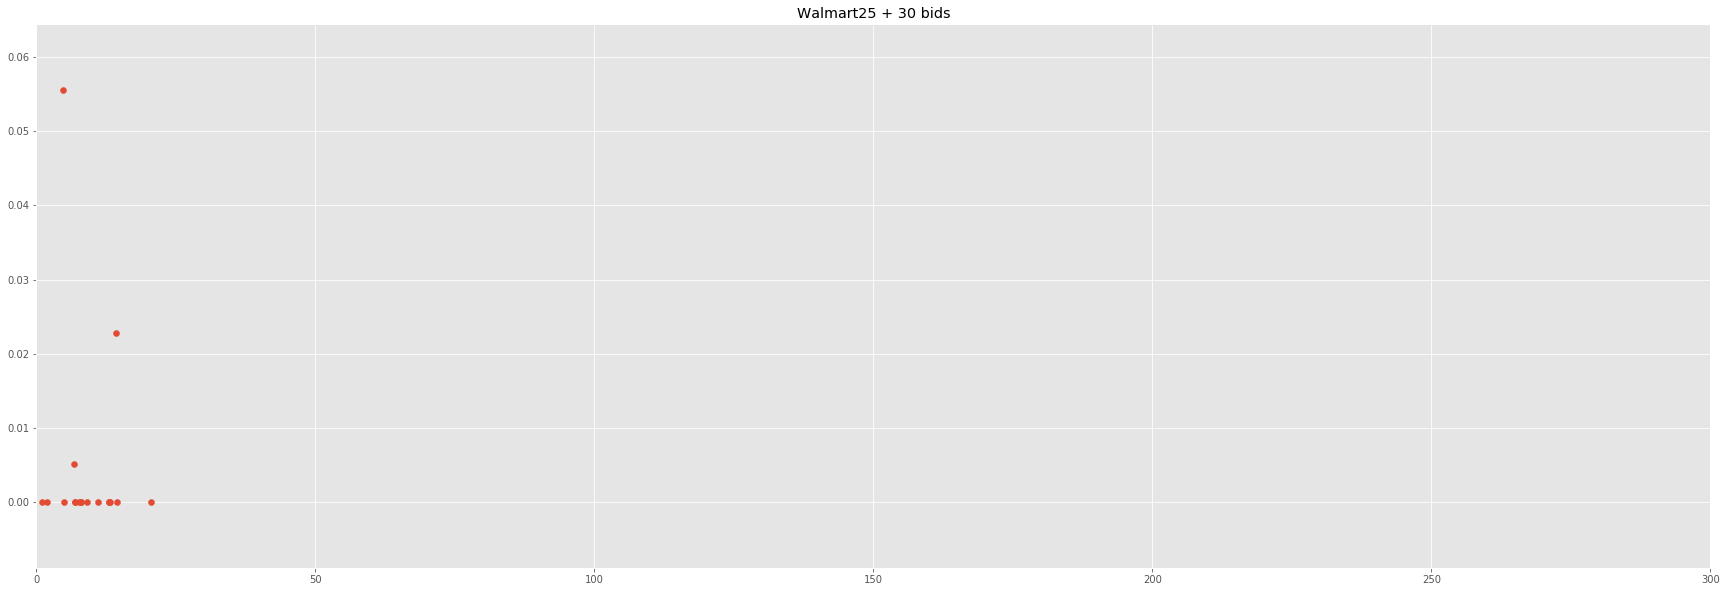

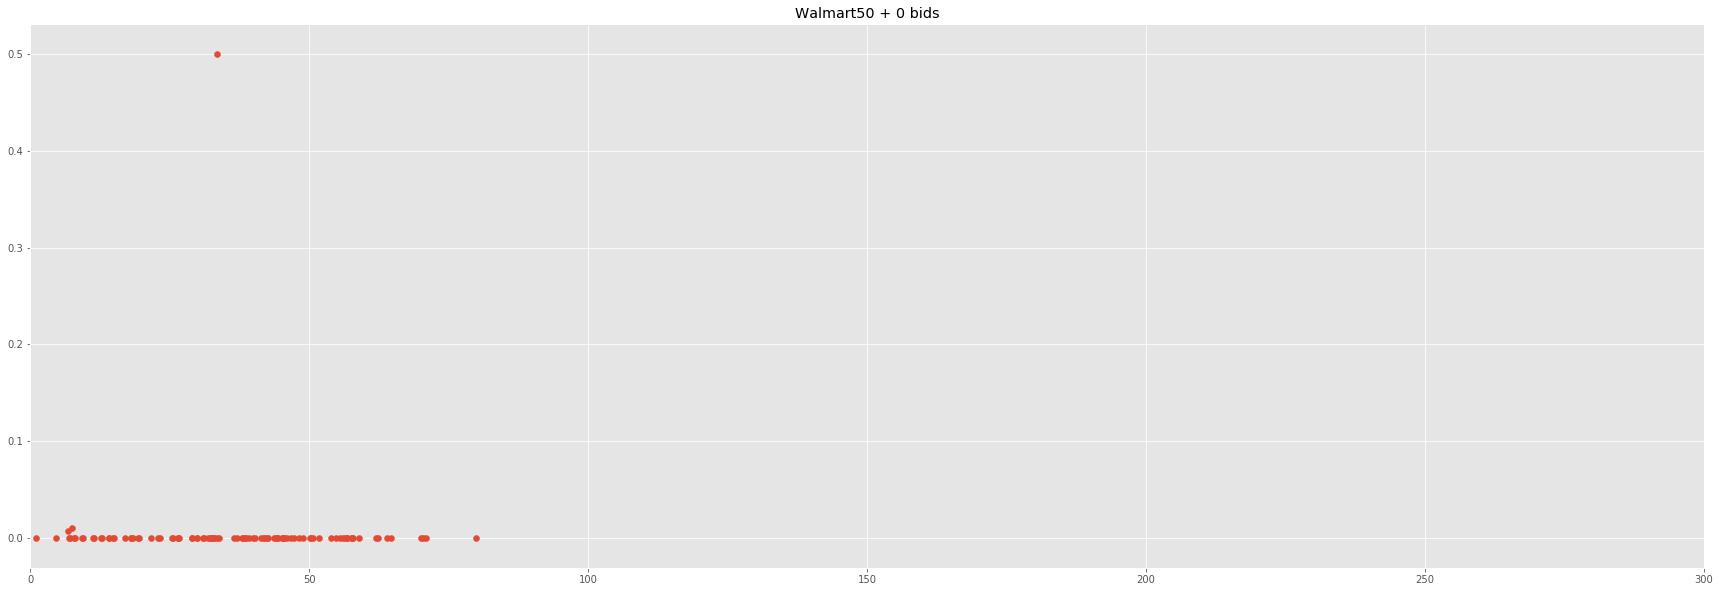

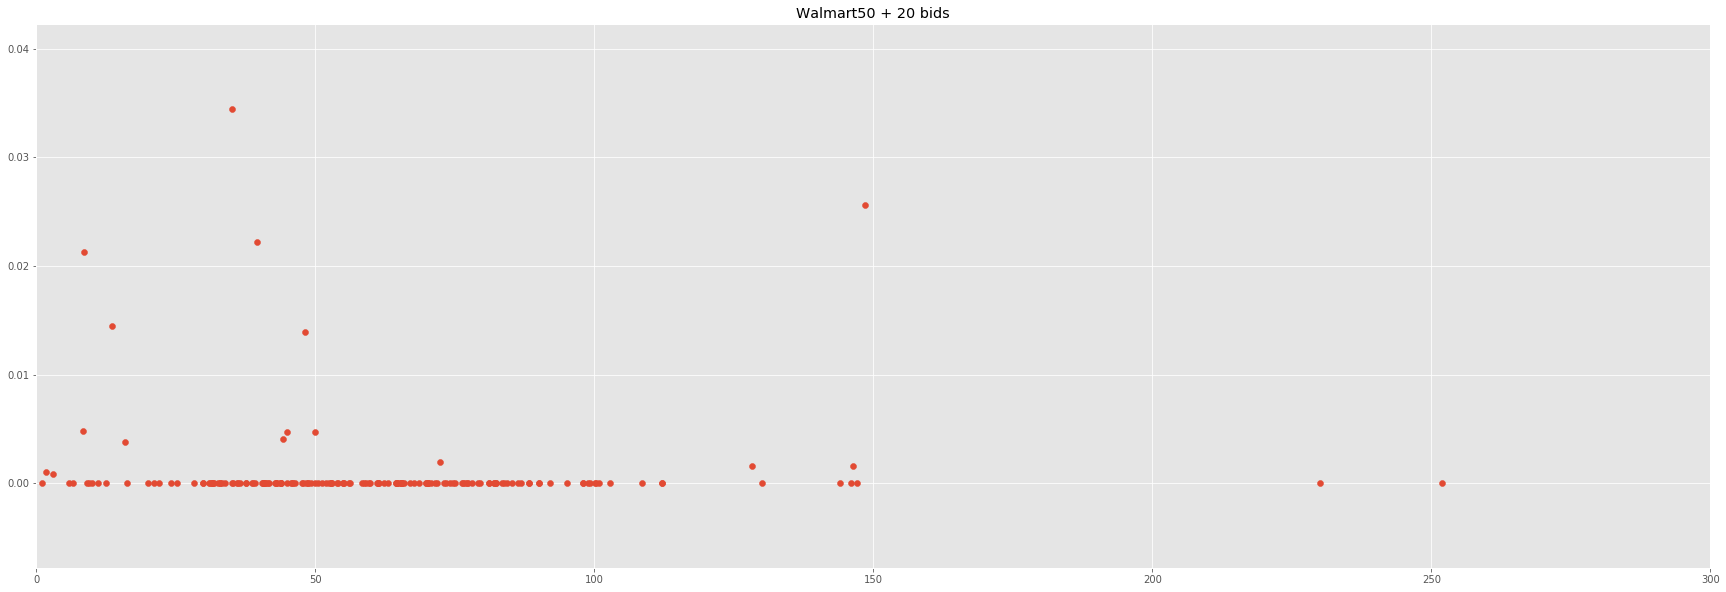

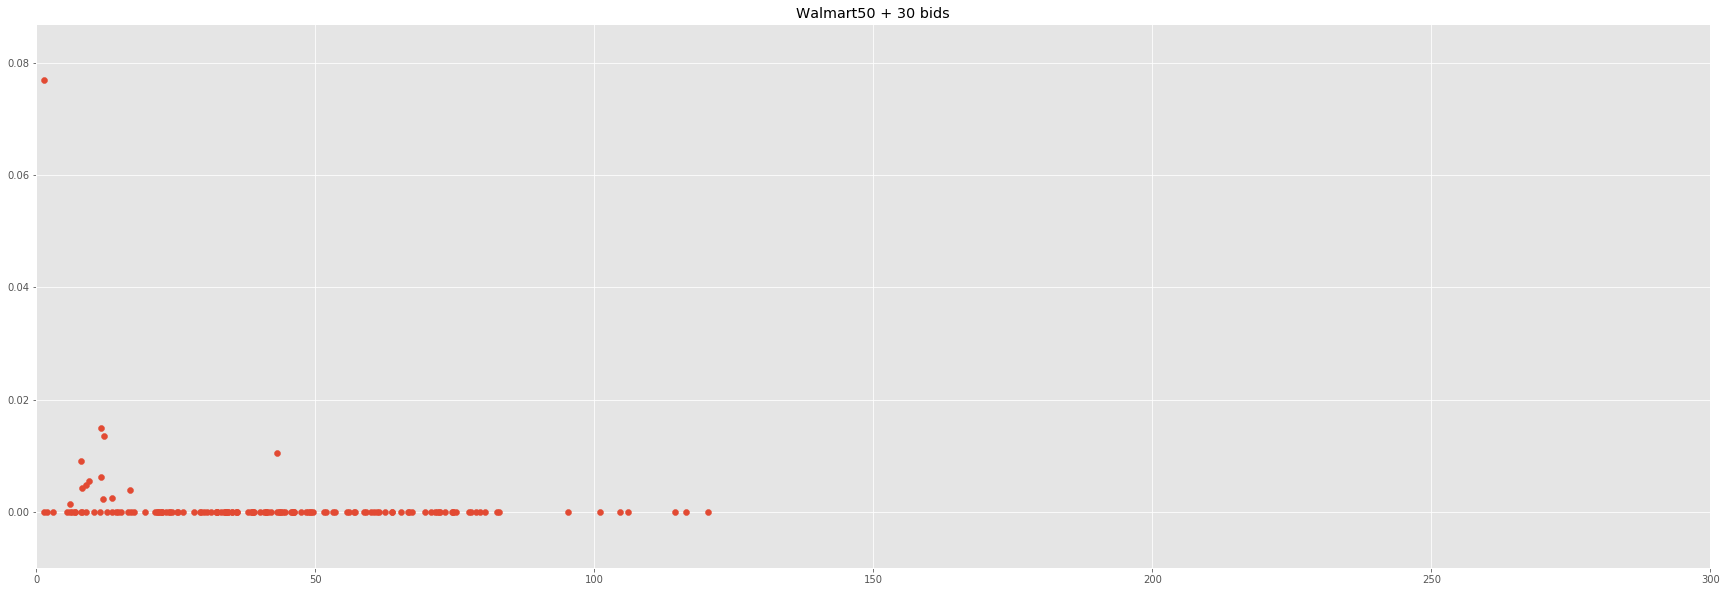

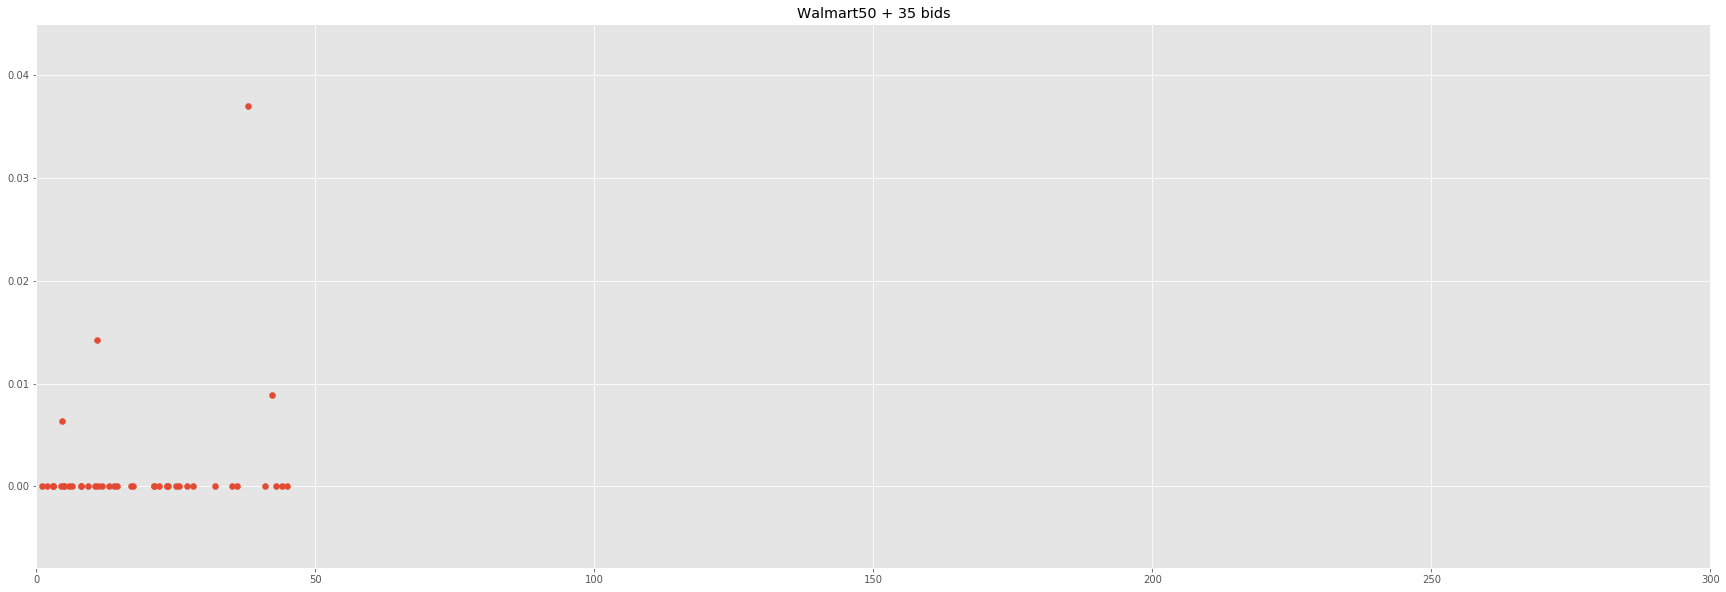

In [77]:
for a, idx in enumerate(df[df.is_winner==1].groupby(["cardtype", "cardvalue", "bidvalue"]).count().index):
    print(idx[0], idx[1], idx[2])
    streak_df = df[(df.cardtype==idx[0])&(df.cardvalue==idx[1])&(df.bidvalue==idx[2])]
    streak_df = streak_df.groupby(["streak1", "is_bidomatic1"]).mean().reset_index()
    streak_df = streak_df[streak_df.is_bidomatic0==True]
    streak_df = streak_df[streak_df.streak0 < 300]
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.set_ylim(bottom=0, top=.002)
    ax.set_xlim(left=0, right=300)
    ax.set_title(idx[0]+str(idx[1])+ " + " + str(idx[2]) + " bids")
    ax.scatter(streak_df.streak0, streak_df.is_winner)


Amazon 25 20
Amazon 25 30
Amazon 50 0
Amazon 50 20
Amazon 50 30
Amazon 50 35
Amazon 75 30
Amazon 100 30
Amazon 150 30
Home Depot 25 20
Home Depot 25 30
Home Depot 50 30
Home Depot 50 35
None 0 15
None 0 25
None 0 50
None 0 100
None 0 250
Shell 25 20
Shell 25 30
Shell 50 0
Shell 50 20
Shell 50 30


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


Shell 50 35
Target 25 20
Target 25 30
Walmart 25 20
Walmart 25 30
Walmart 50 0
Walmart 50 20
Walmart 50 30
Walmart 50 35


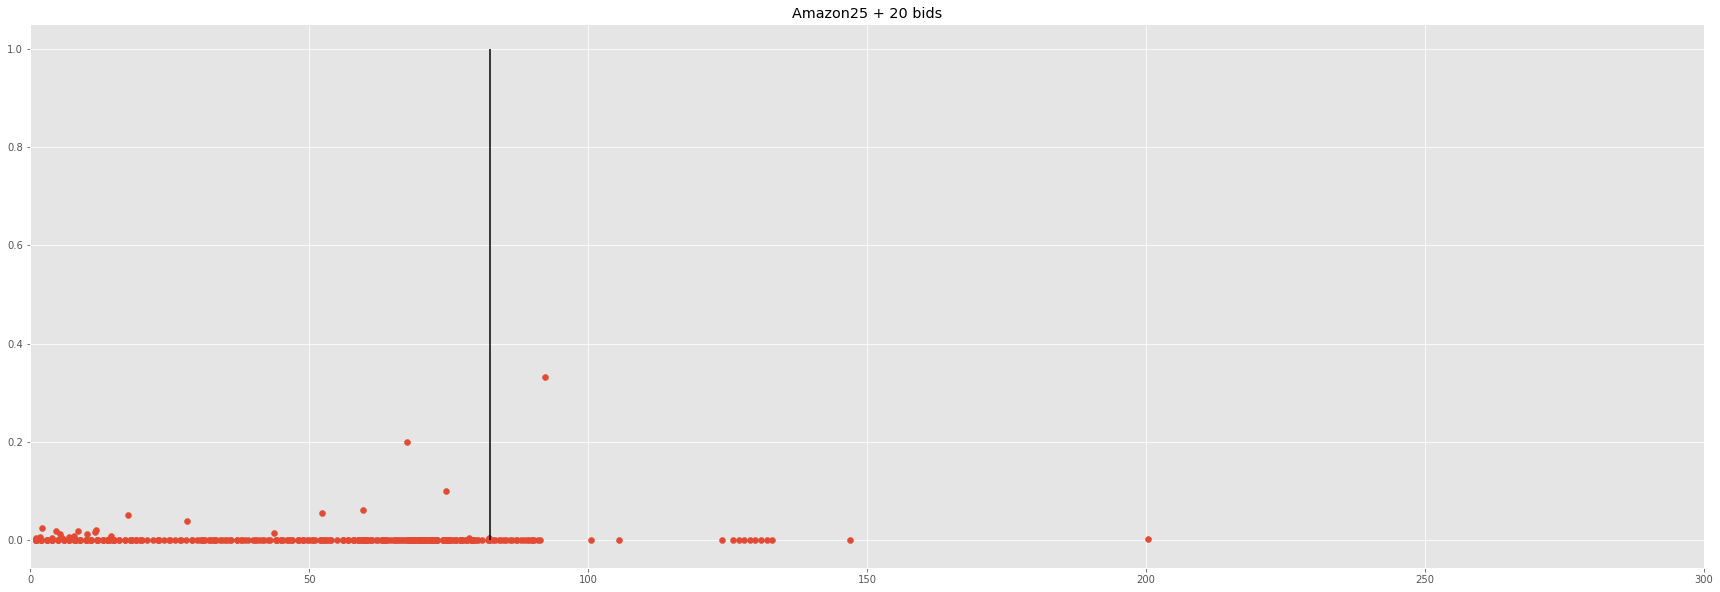

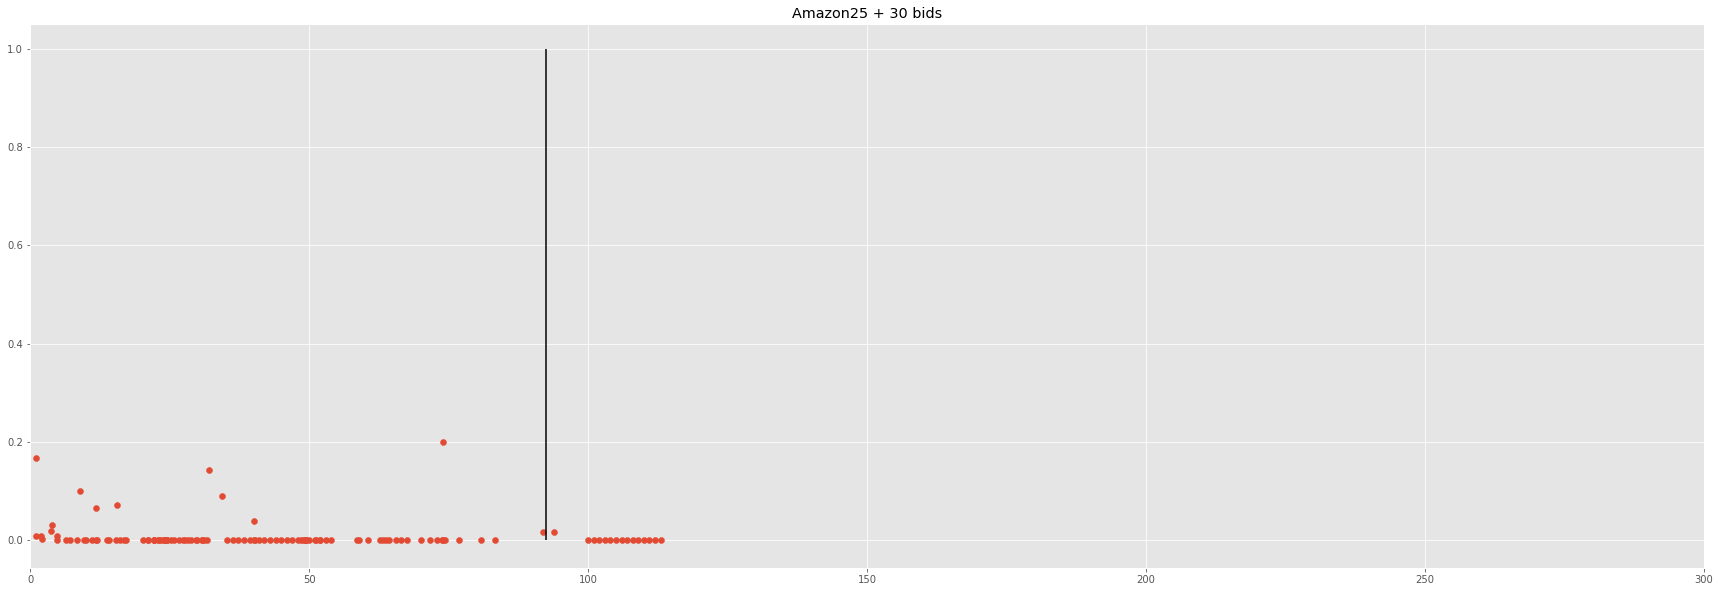

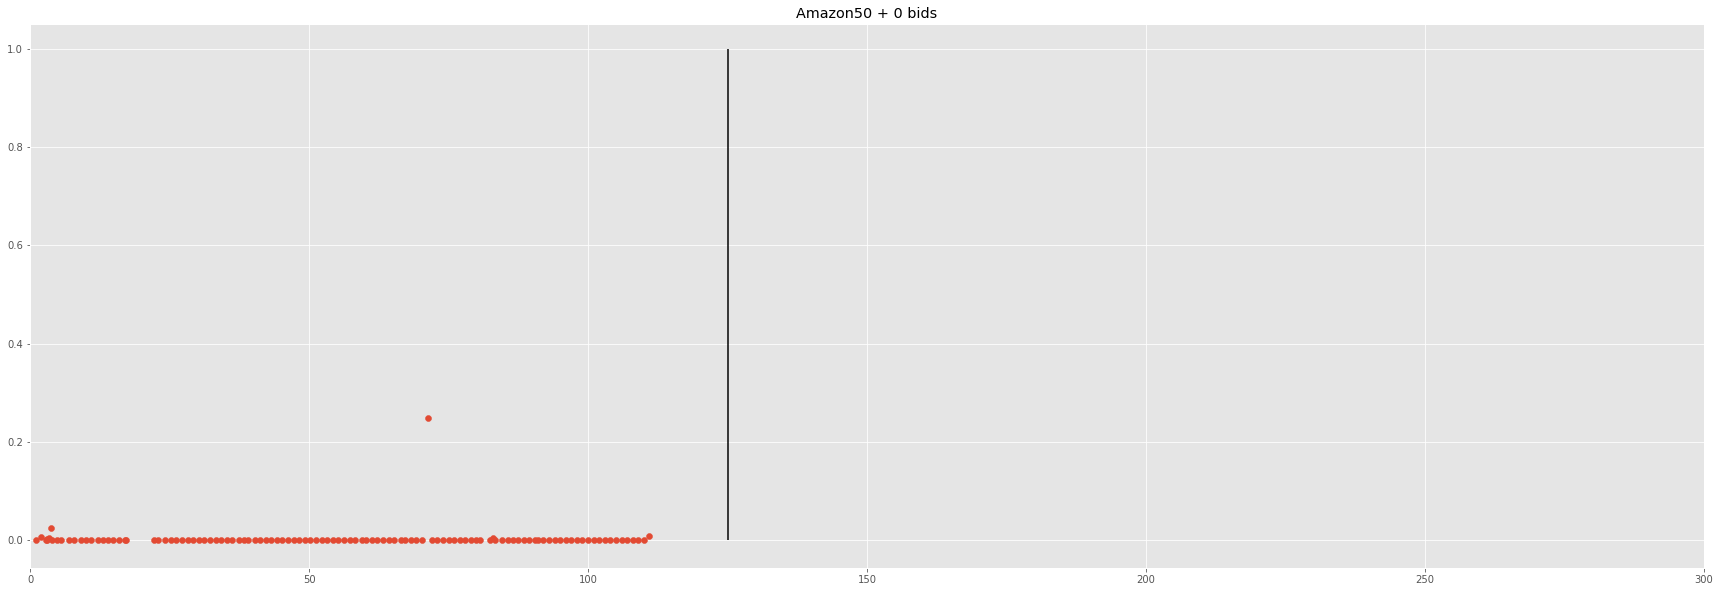

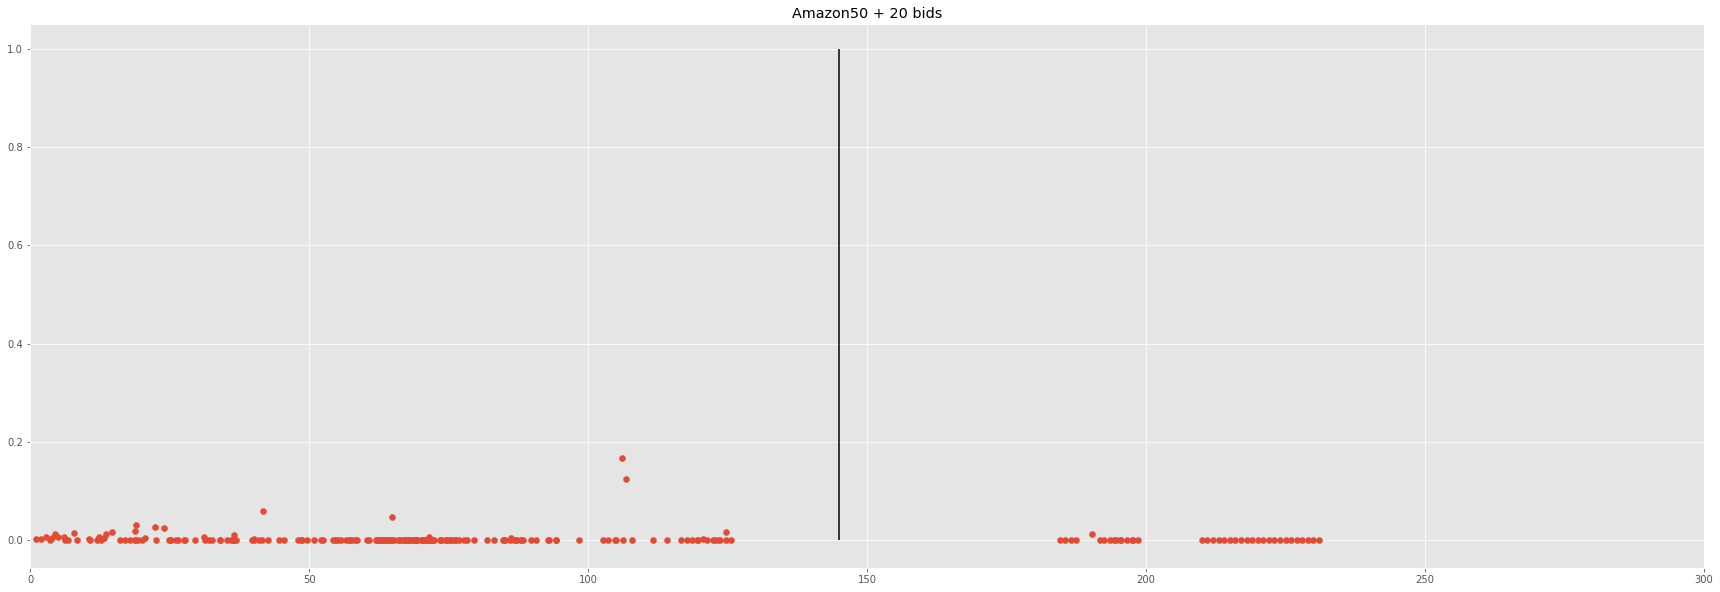

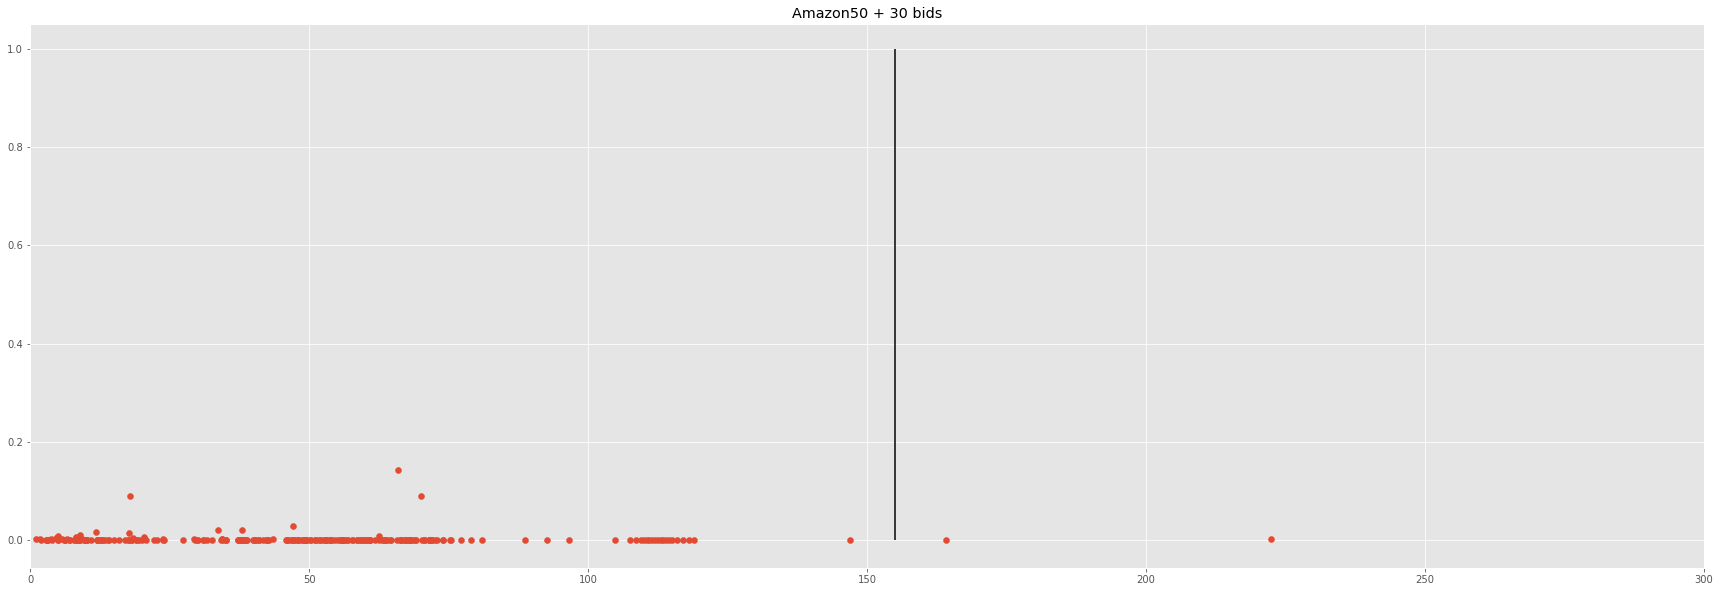

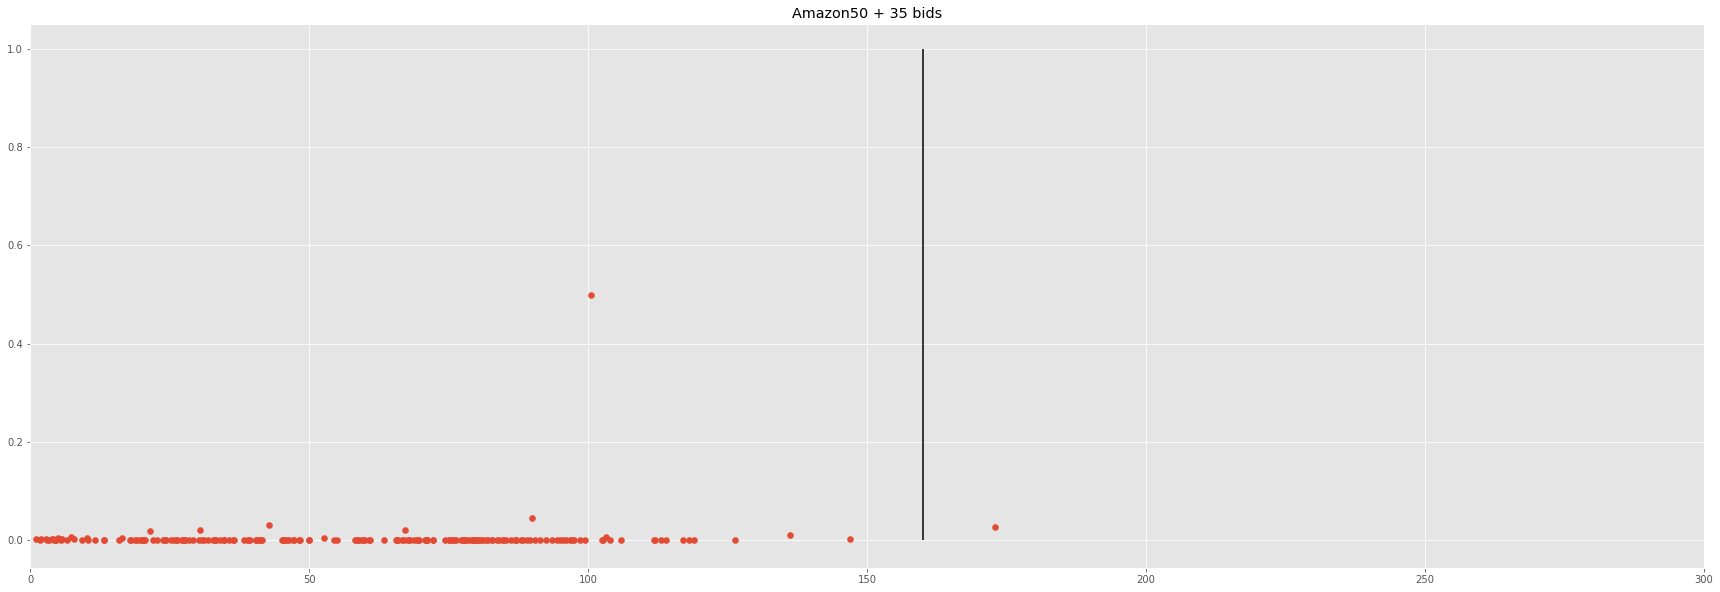

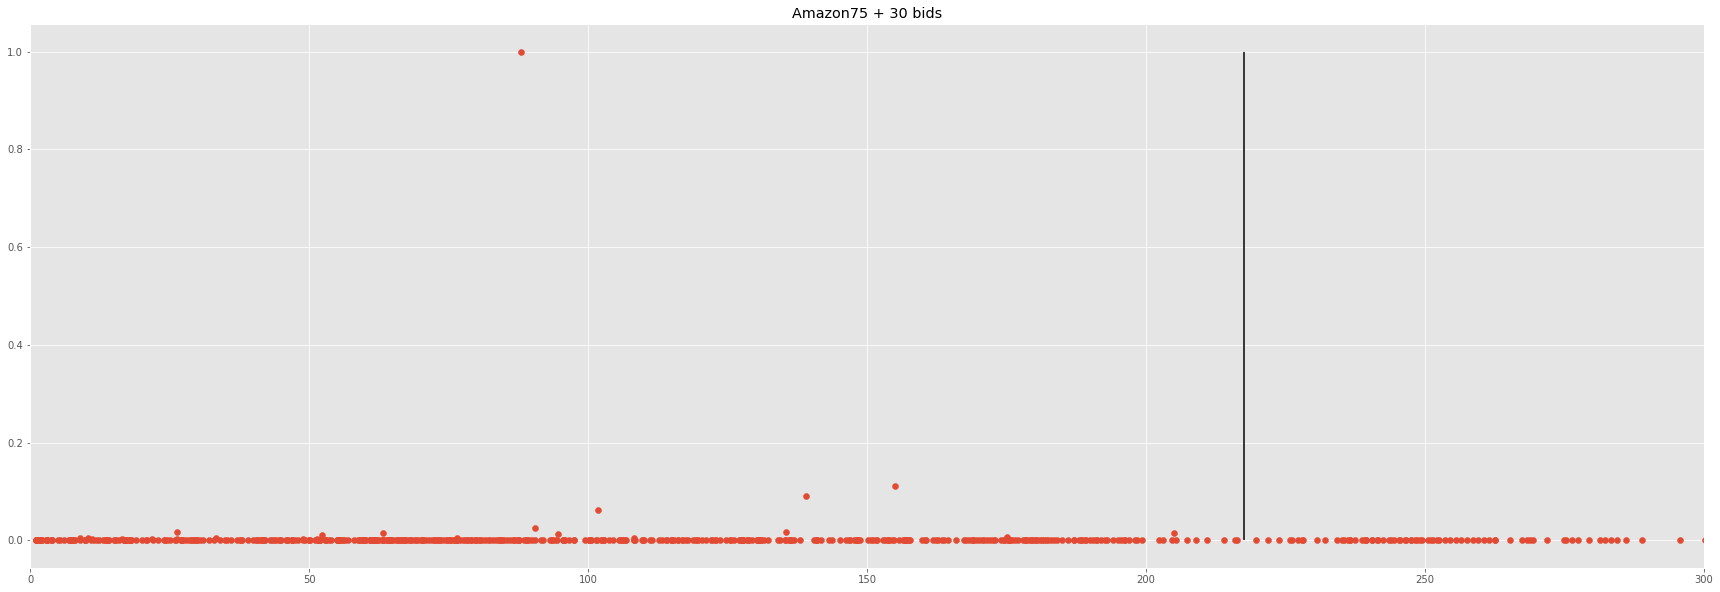

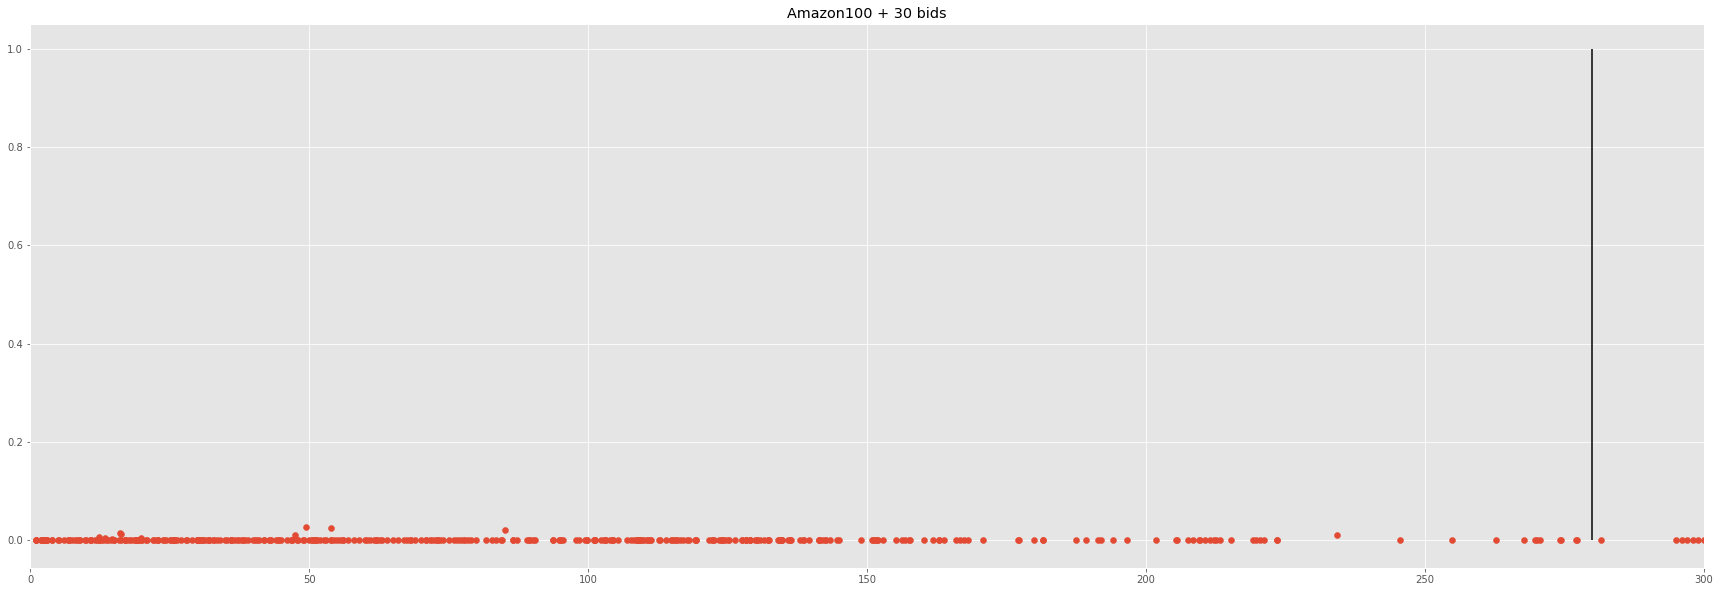

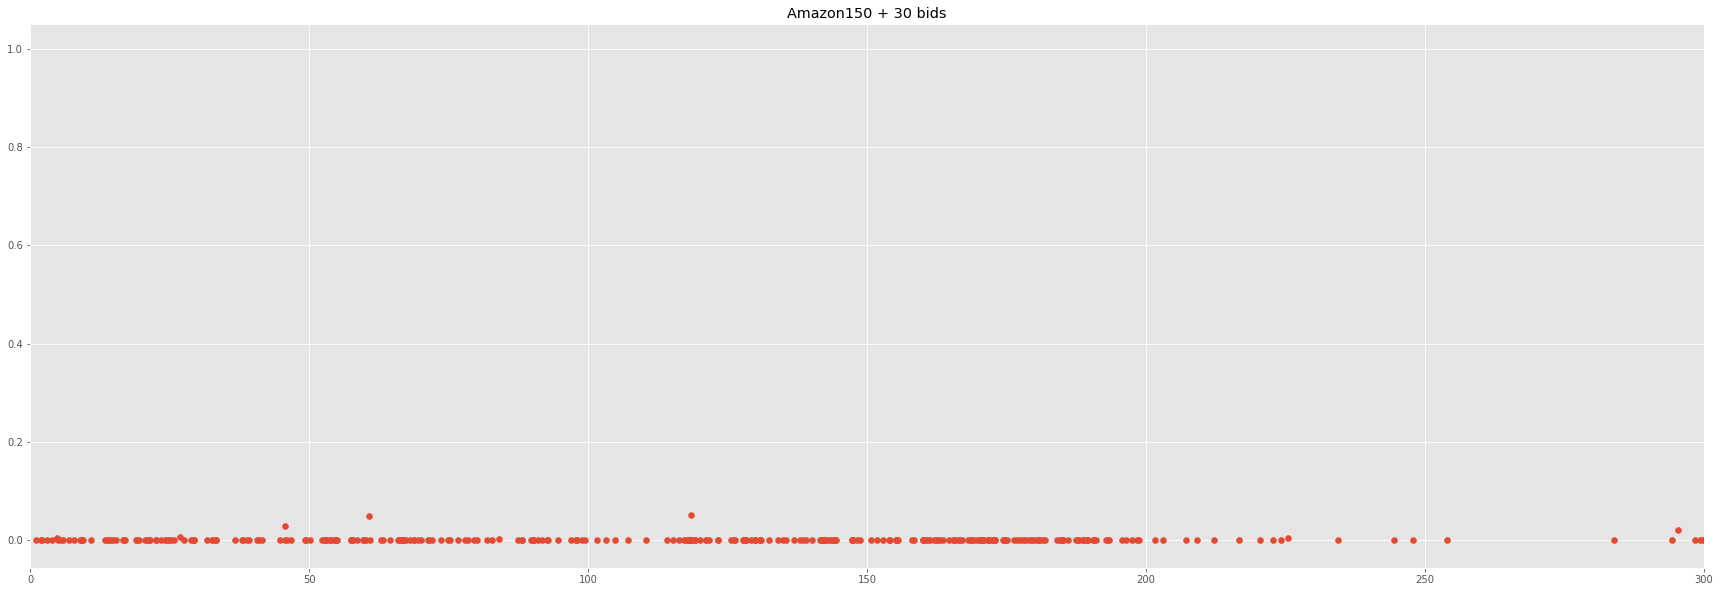

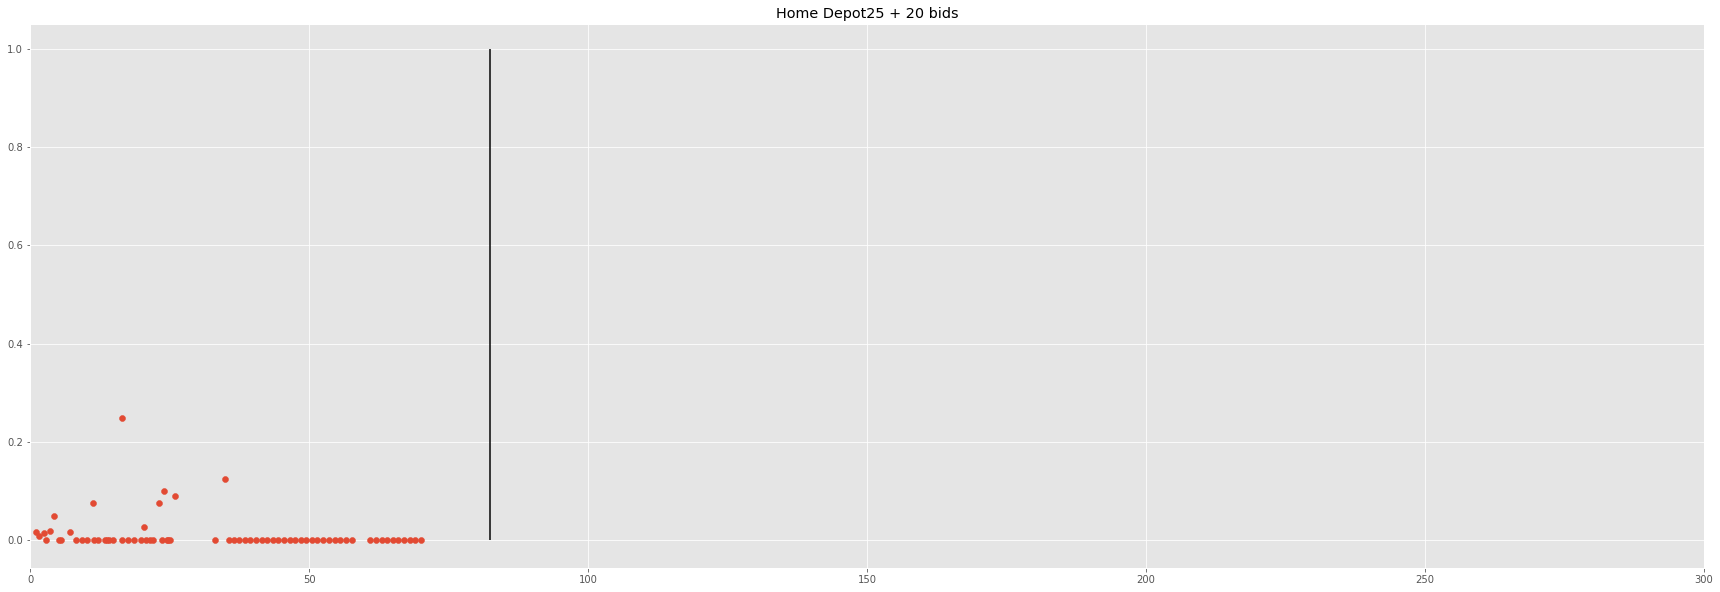

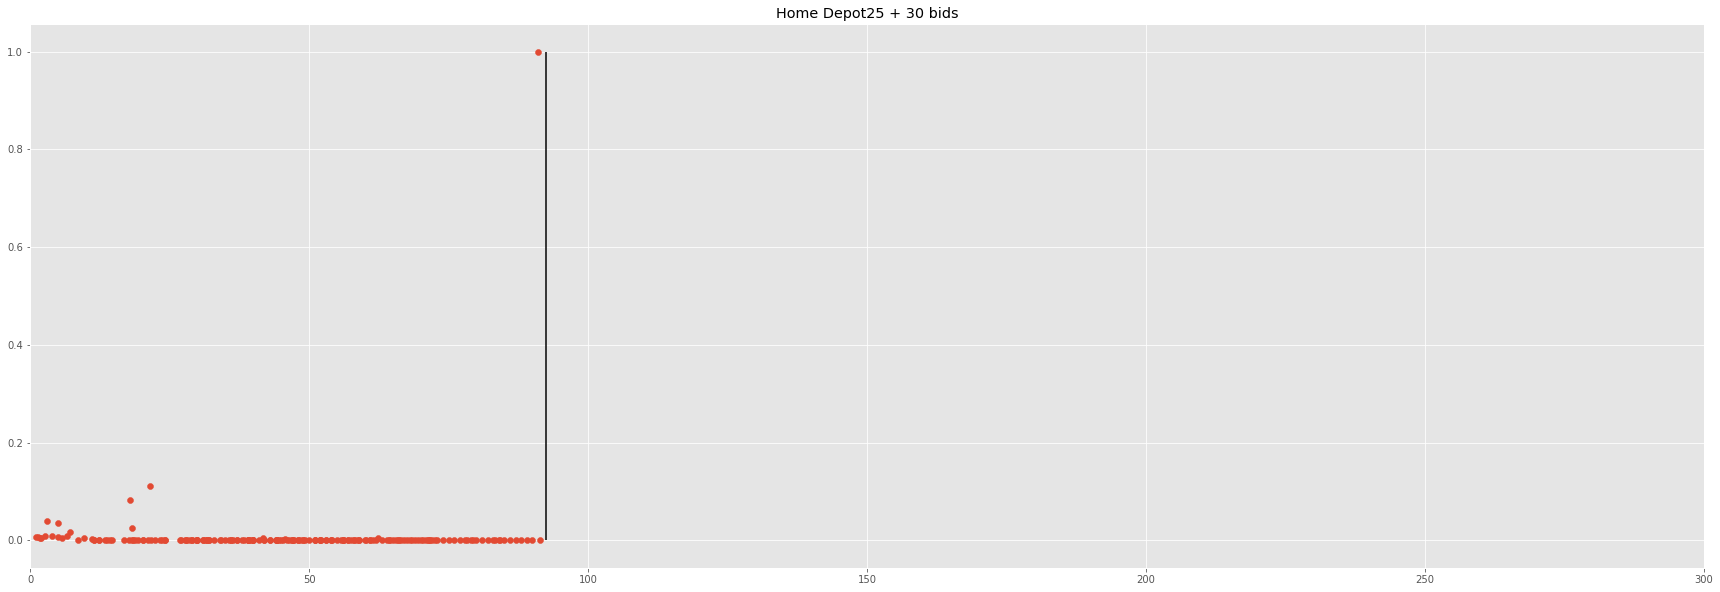

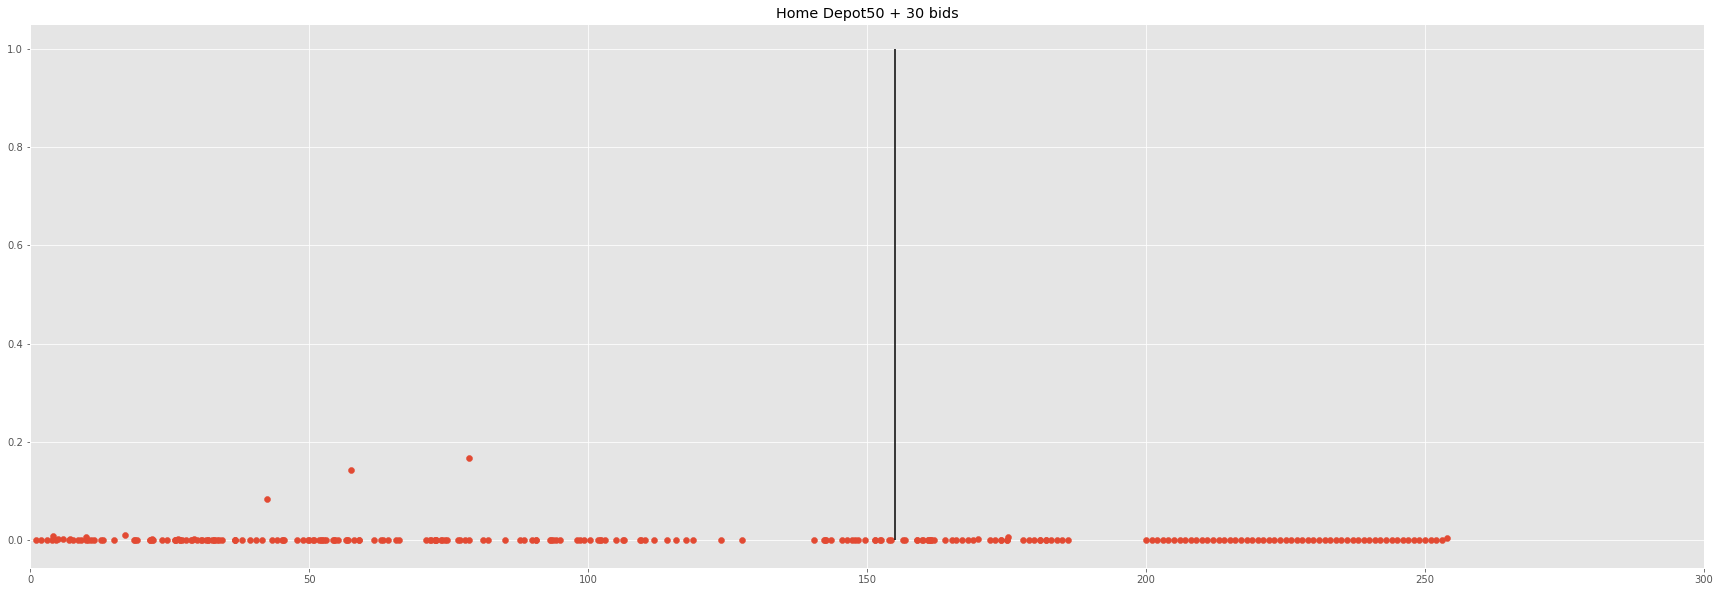

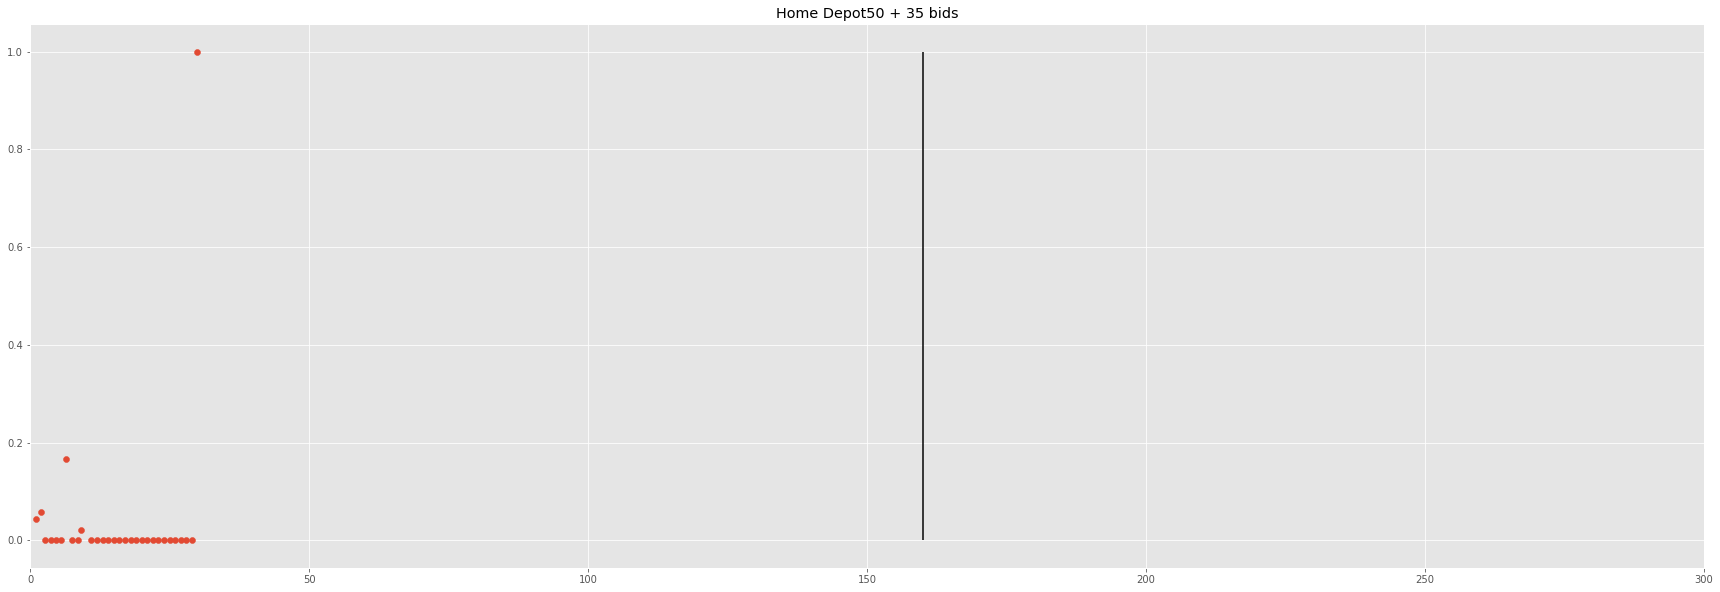

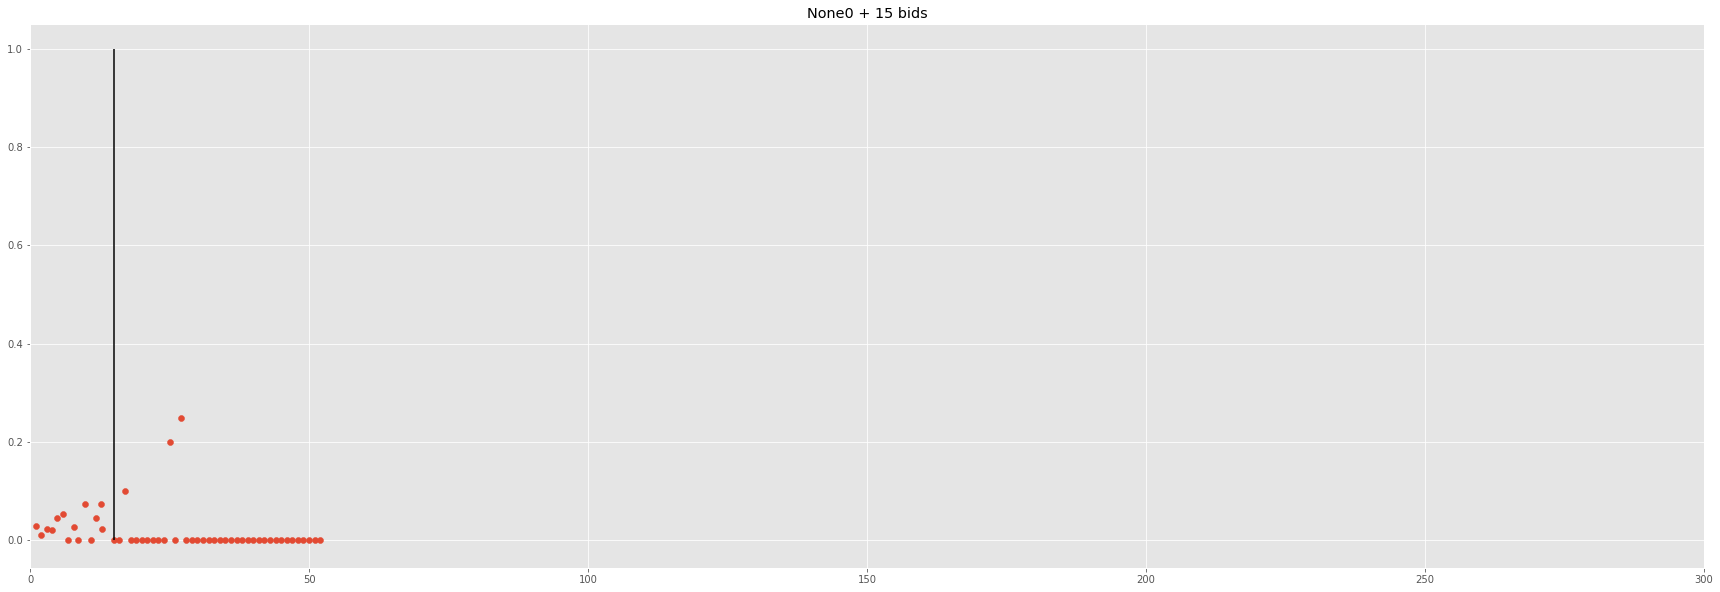

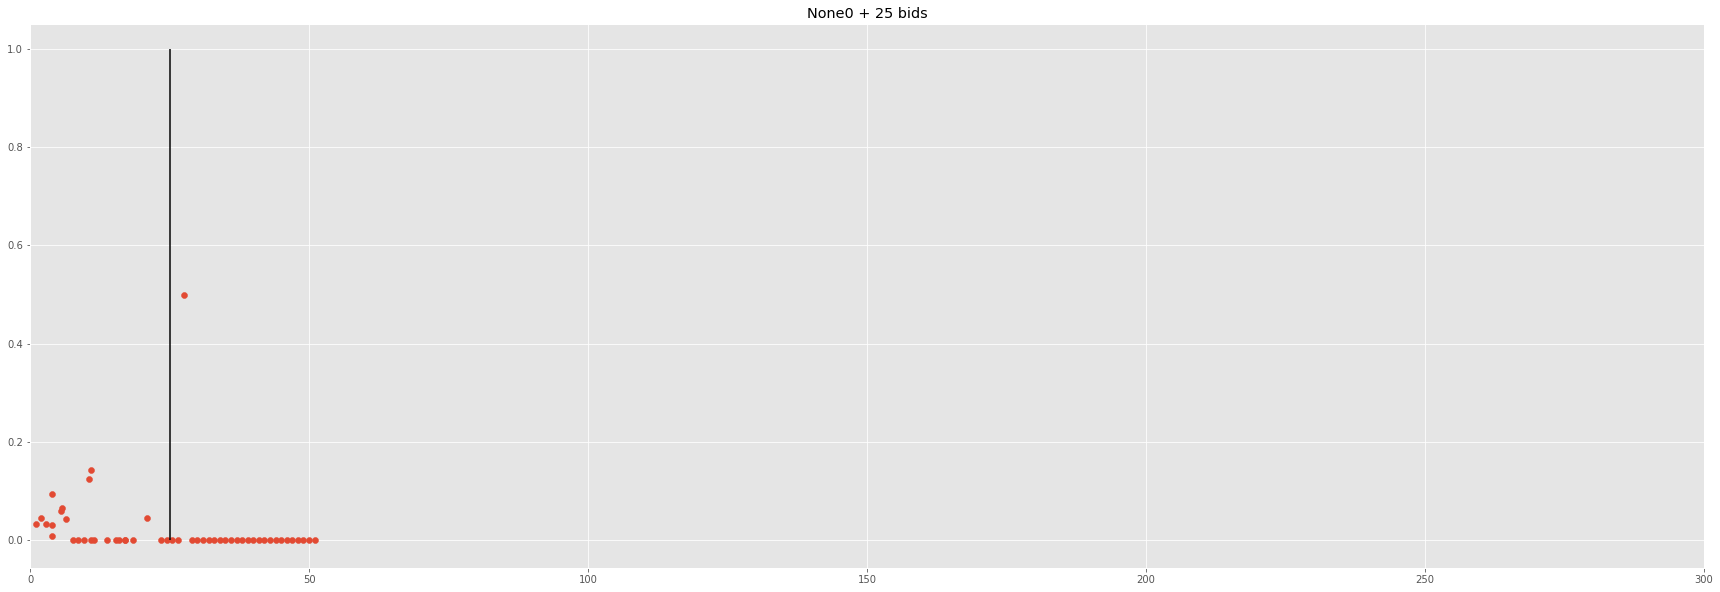

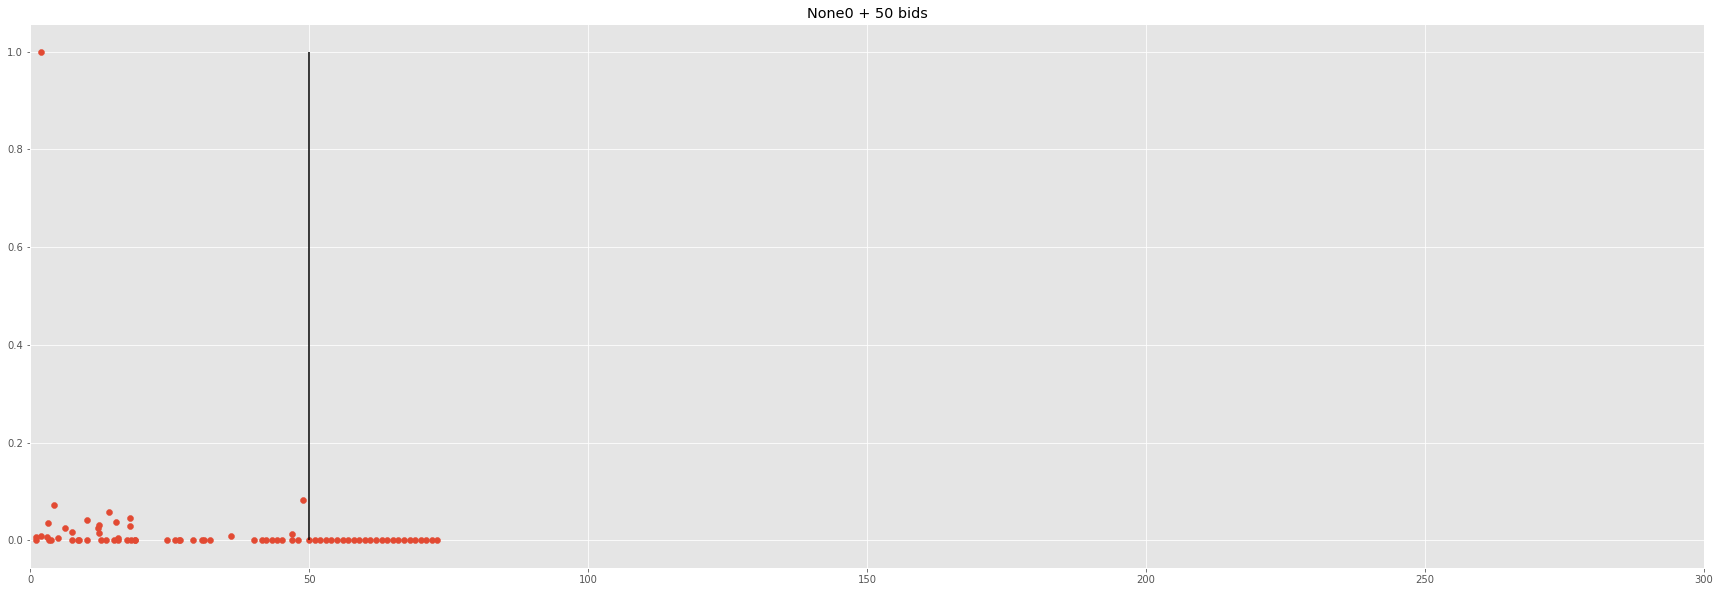

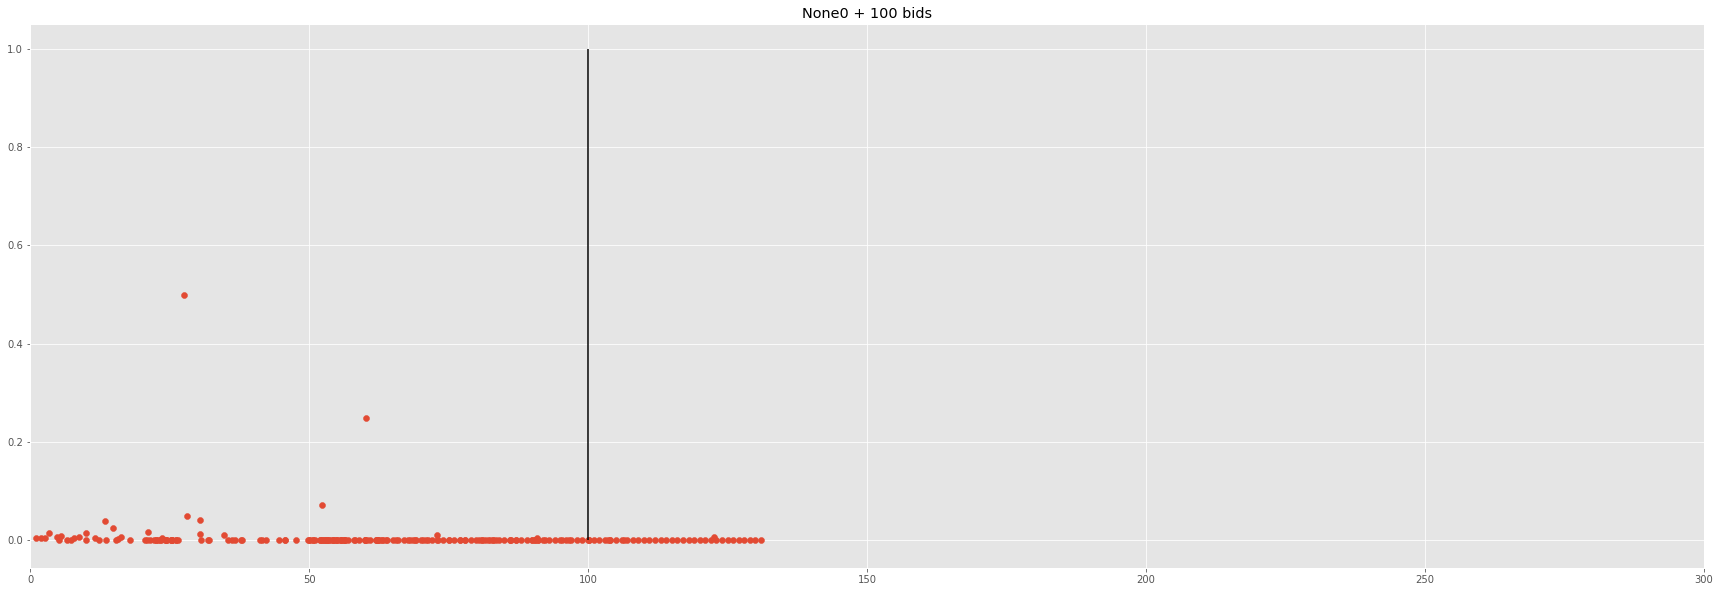

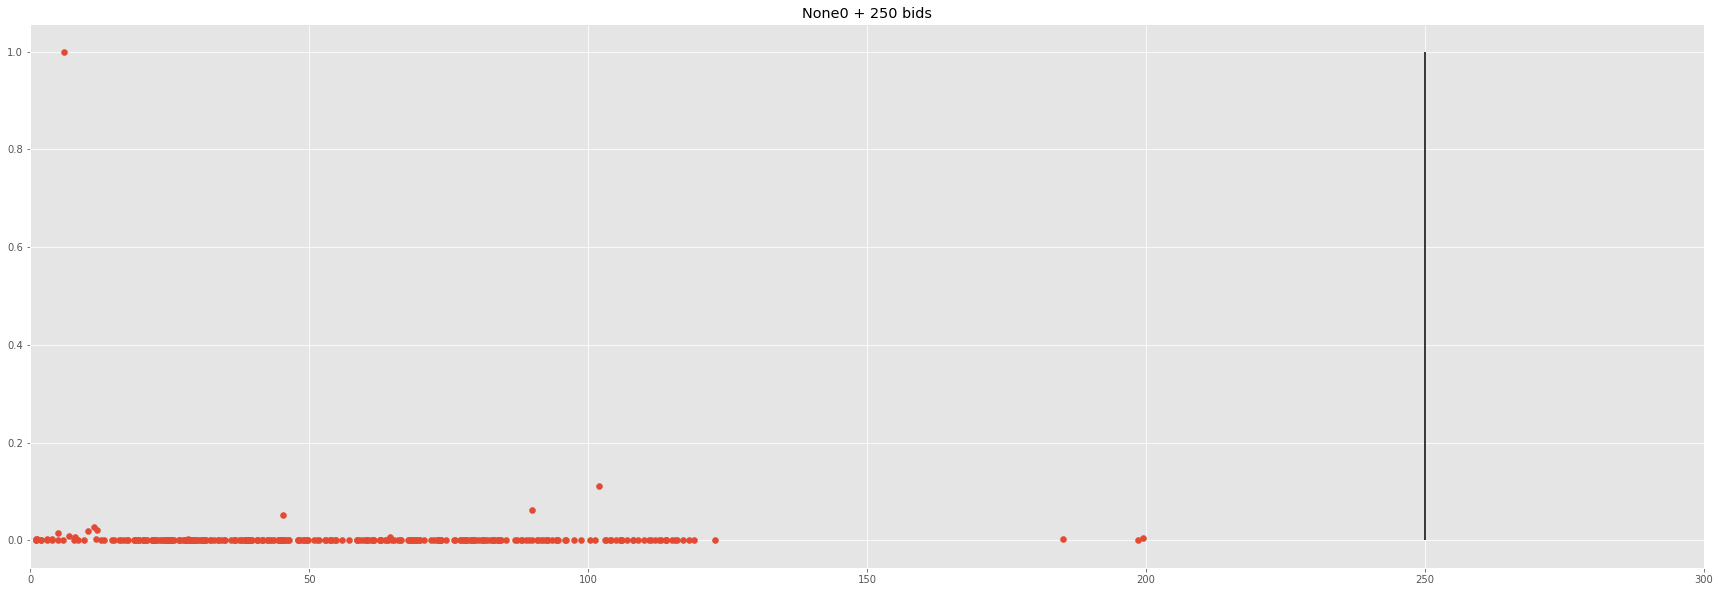

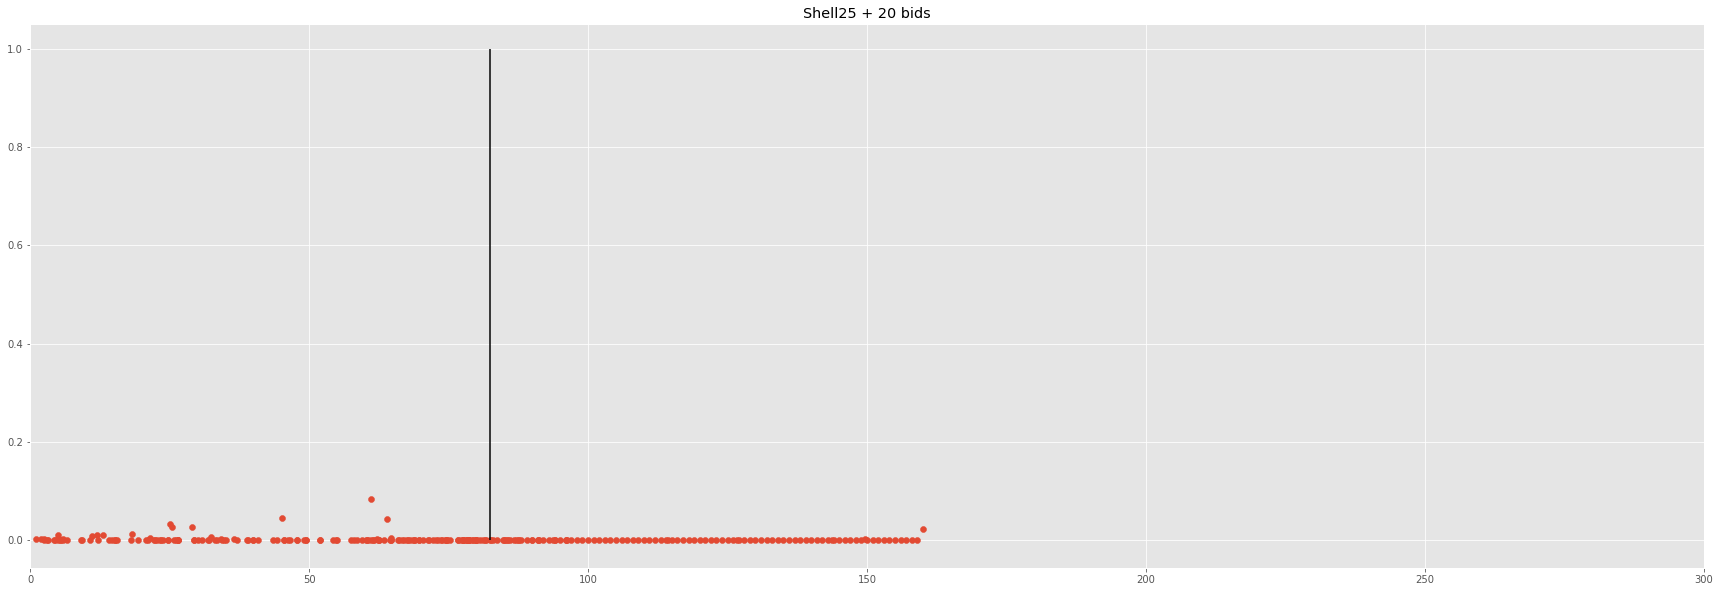

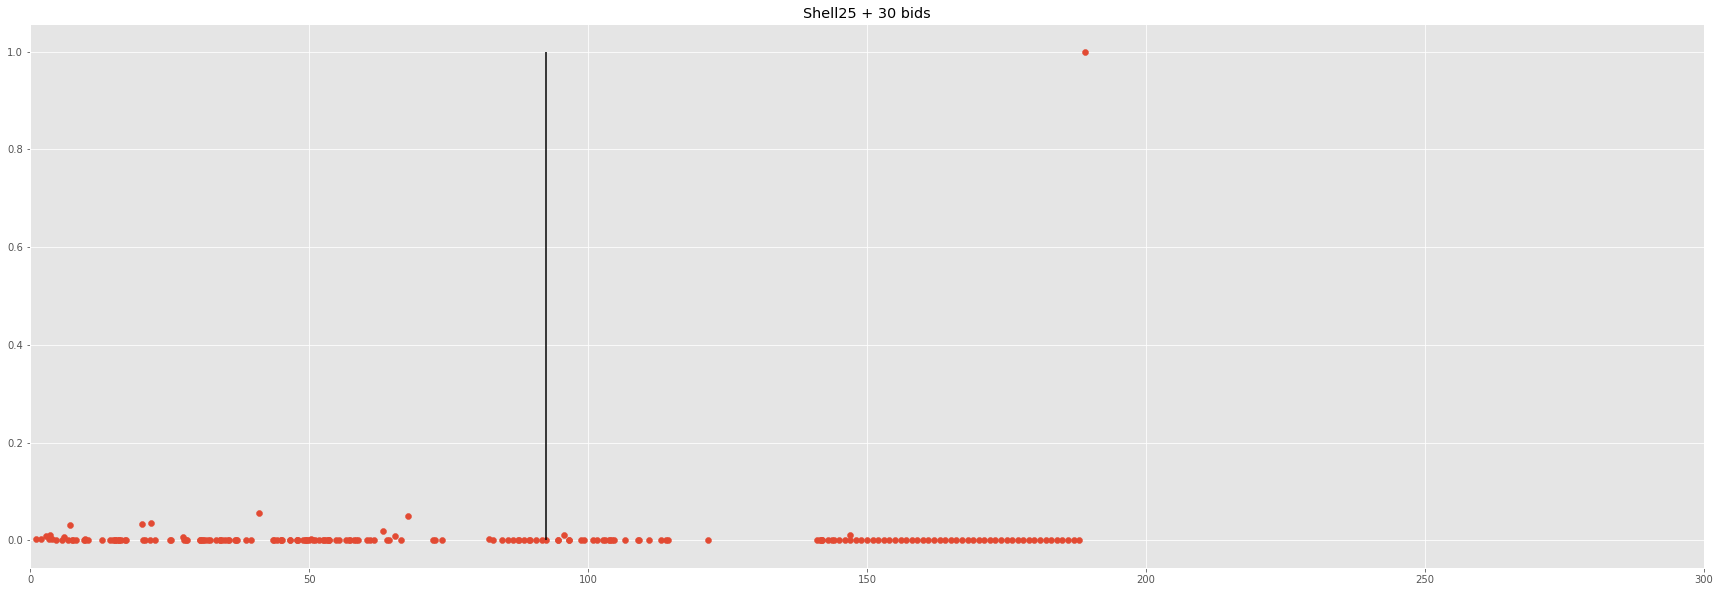

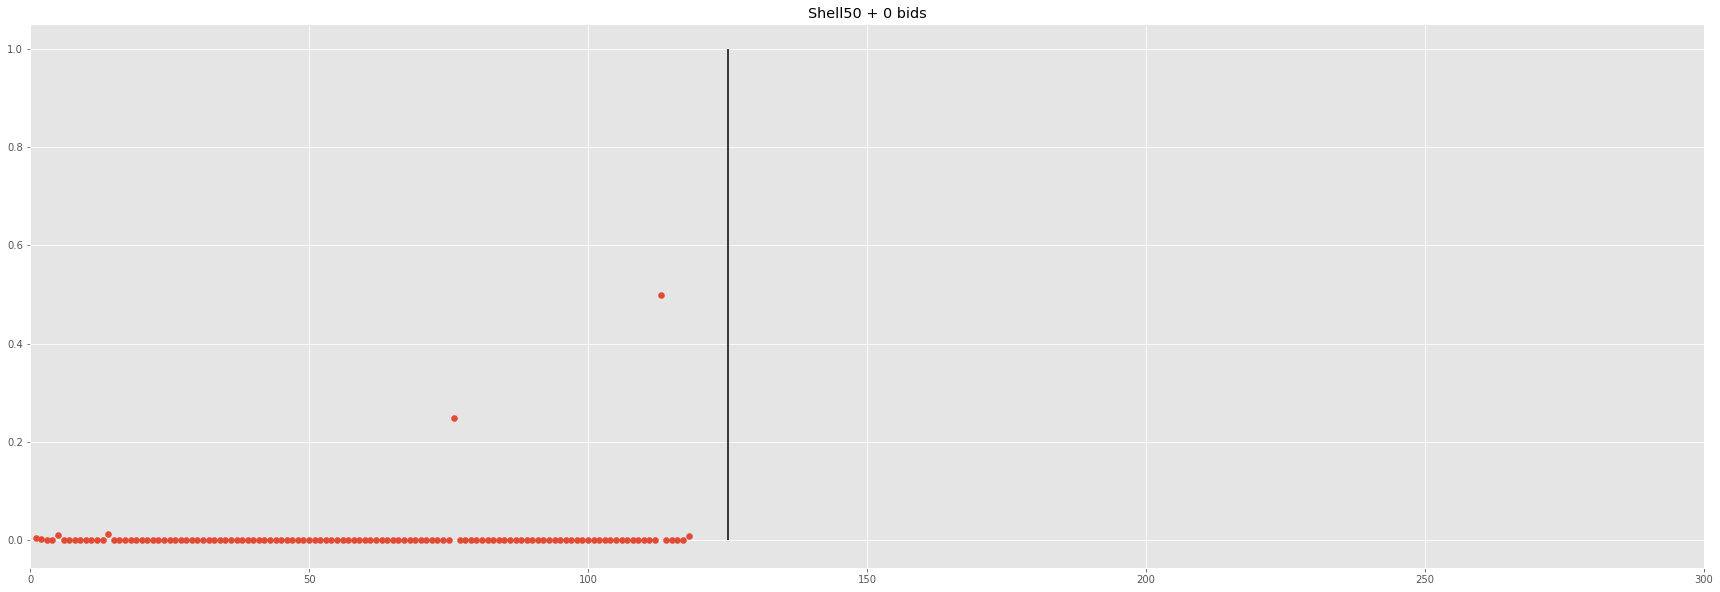

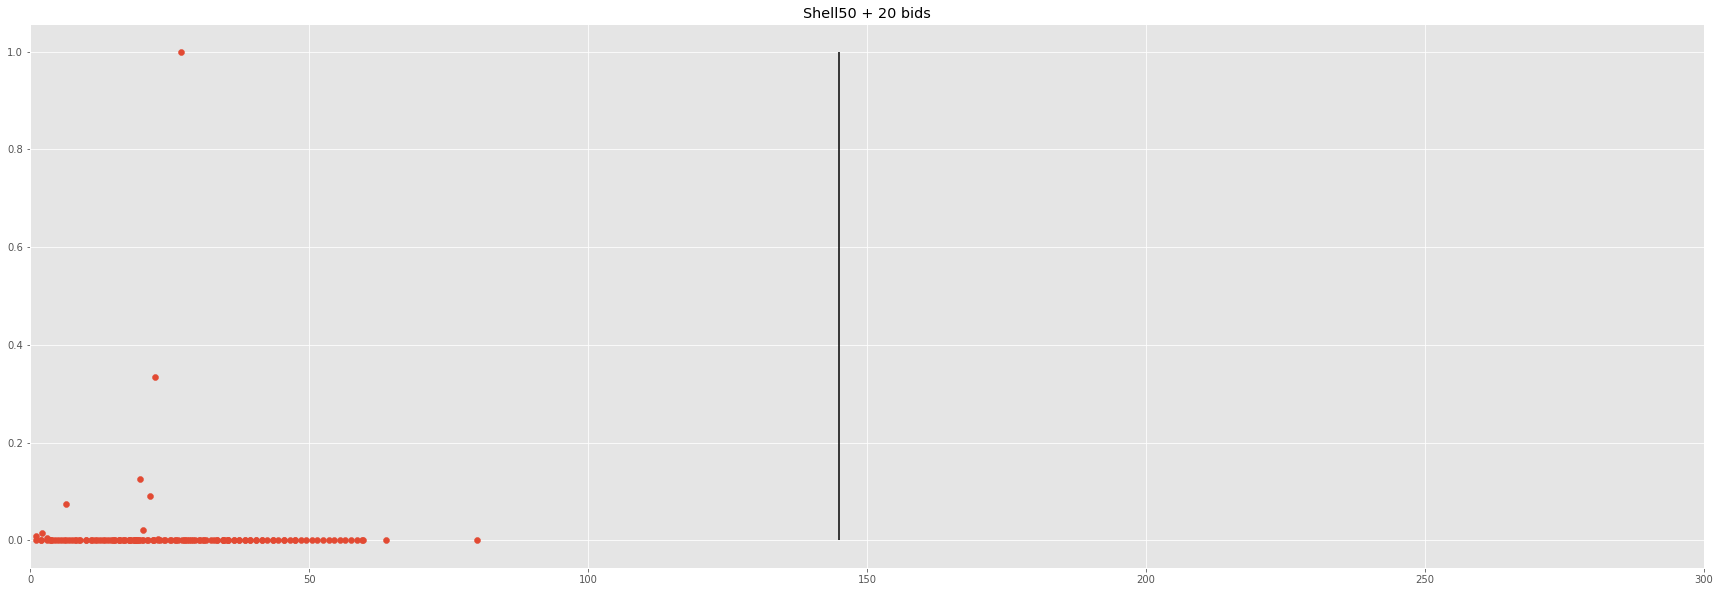

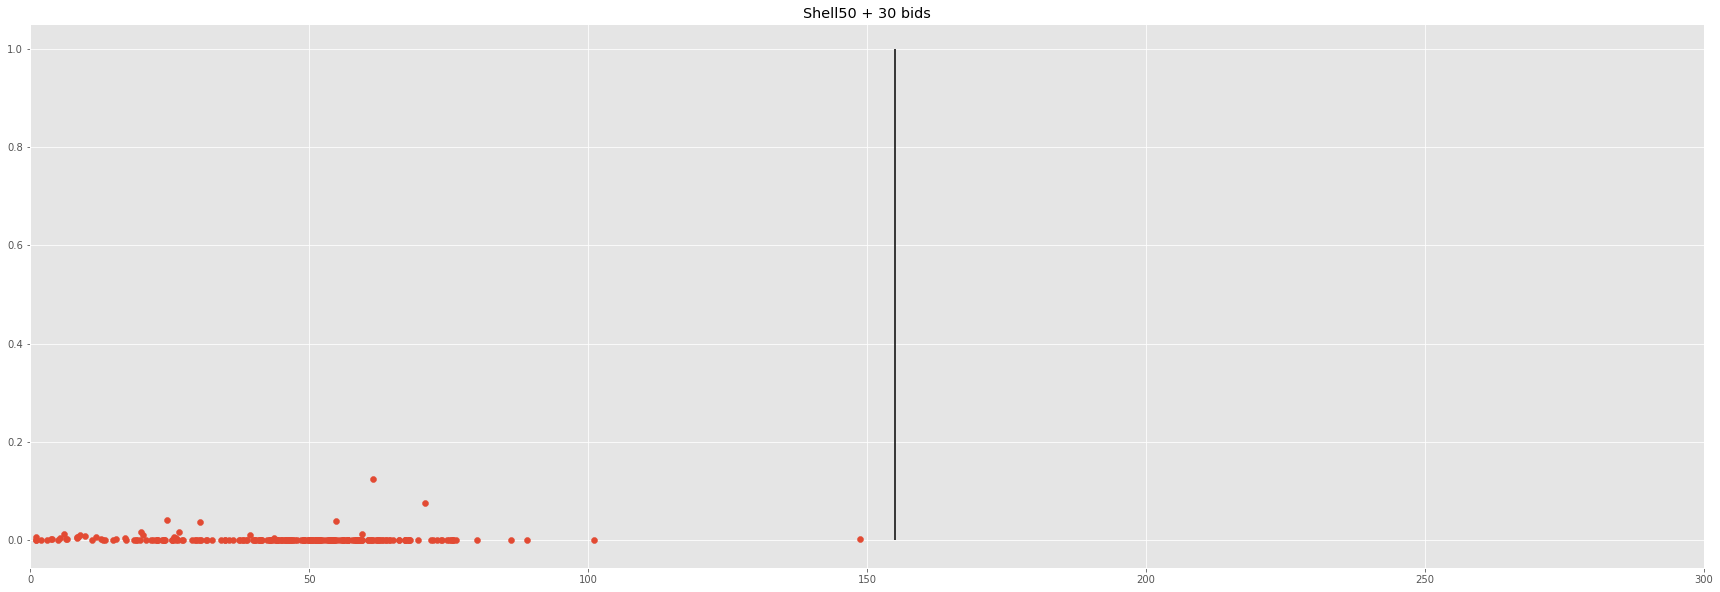

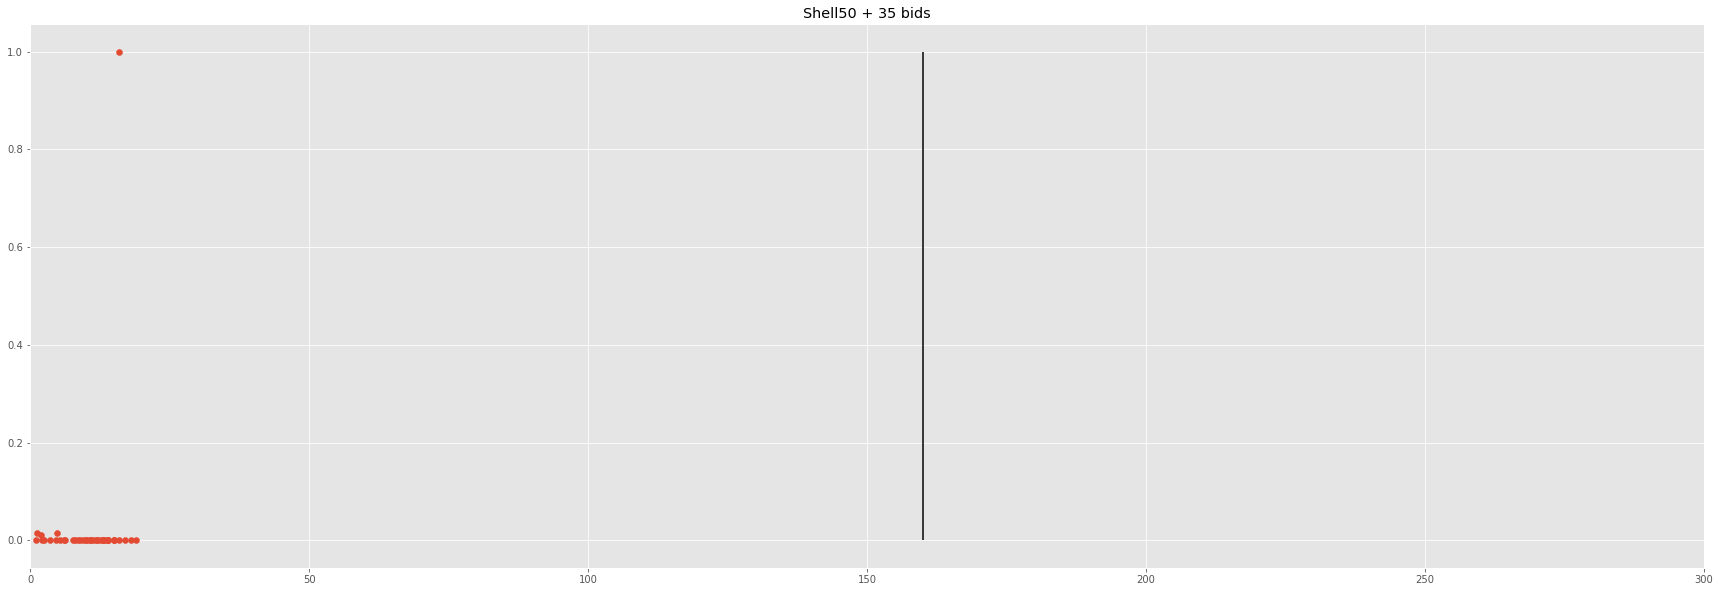

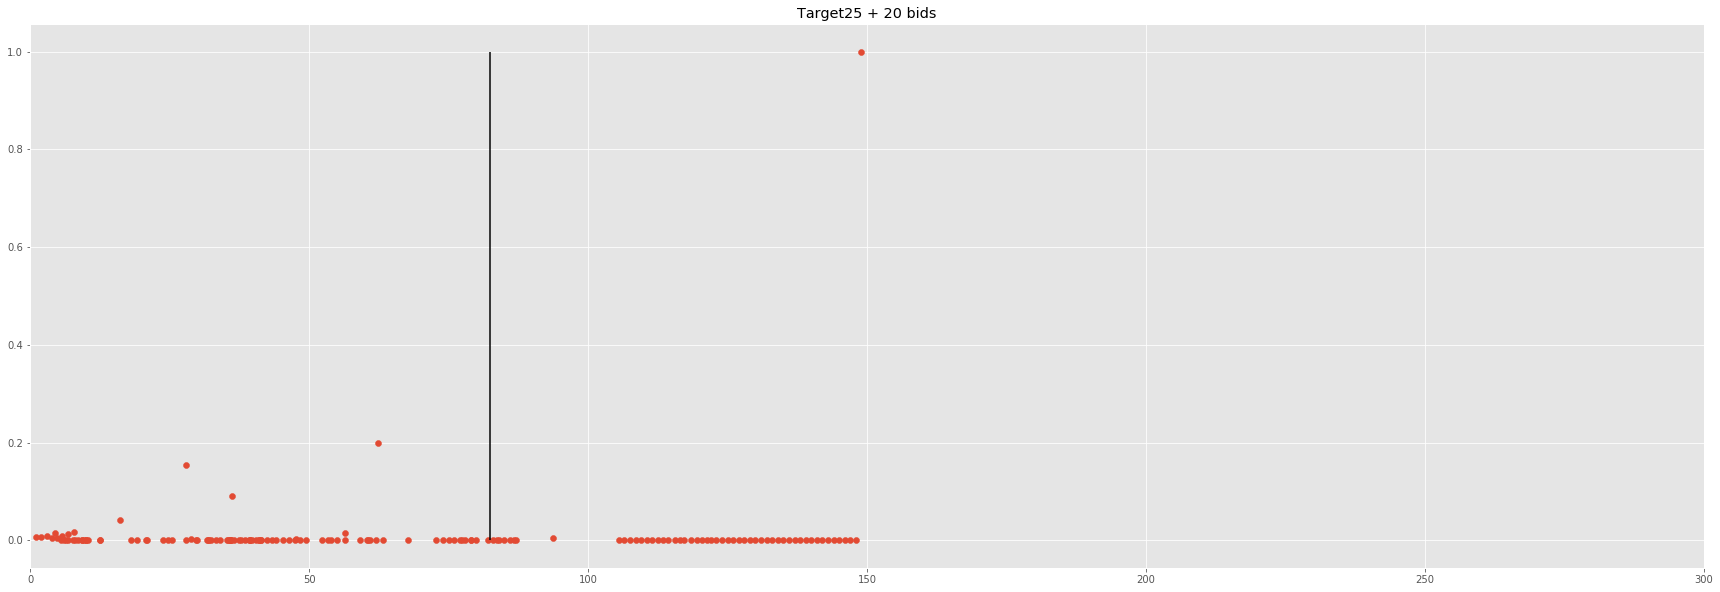

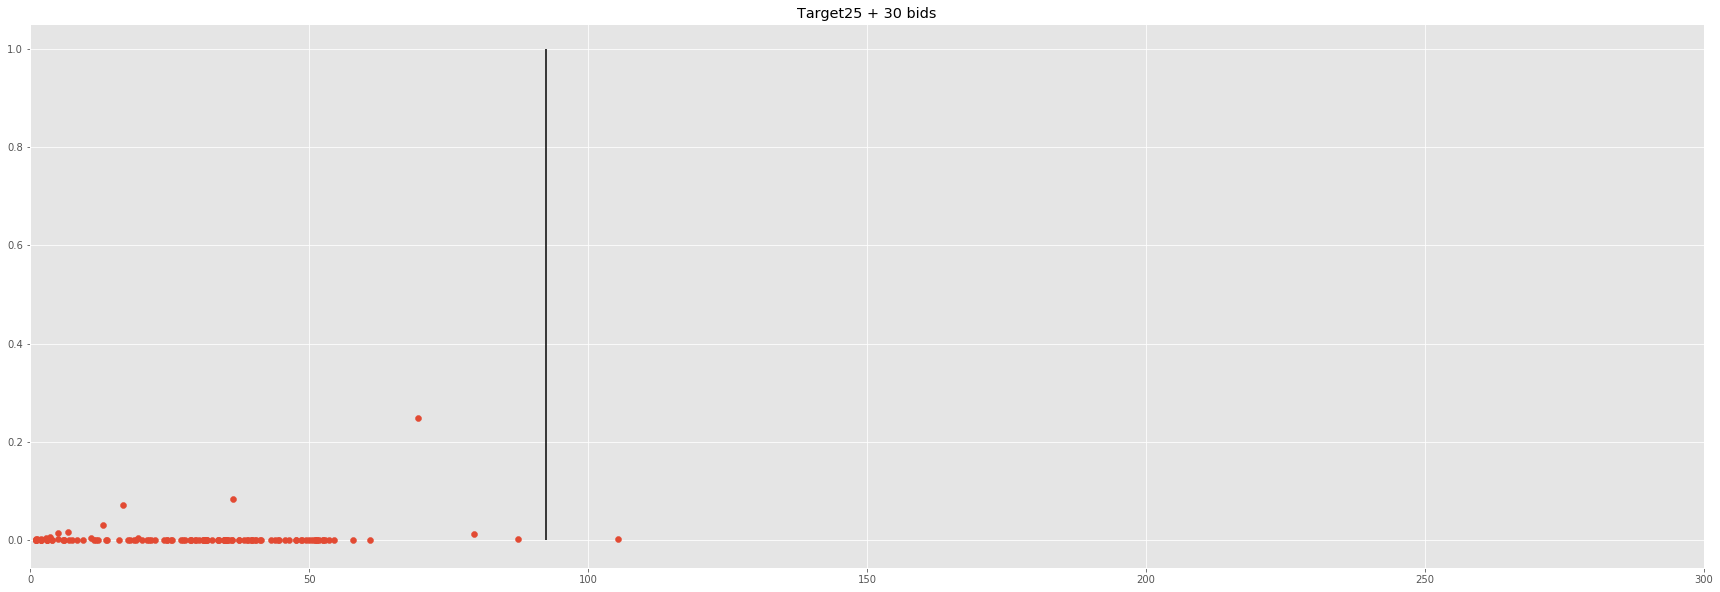

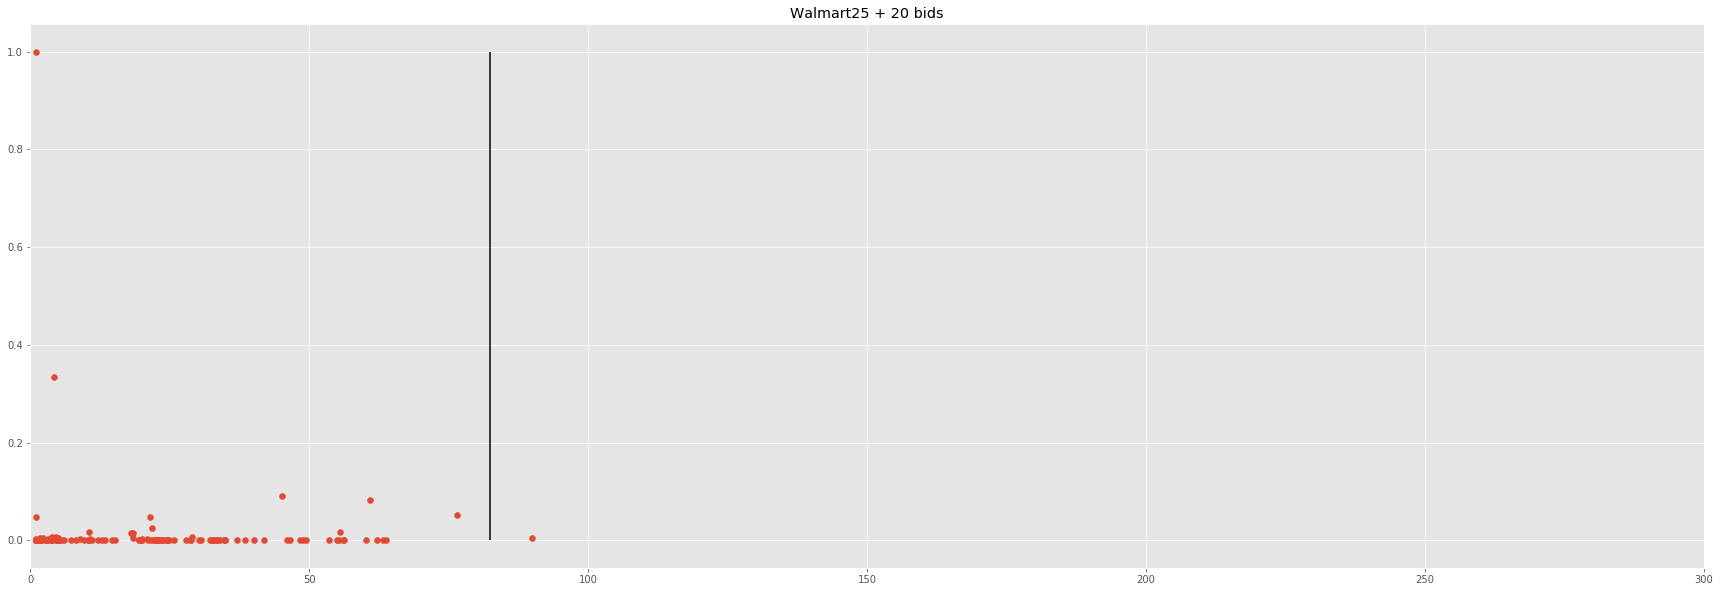

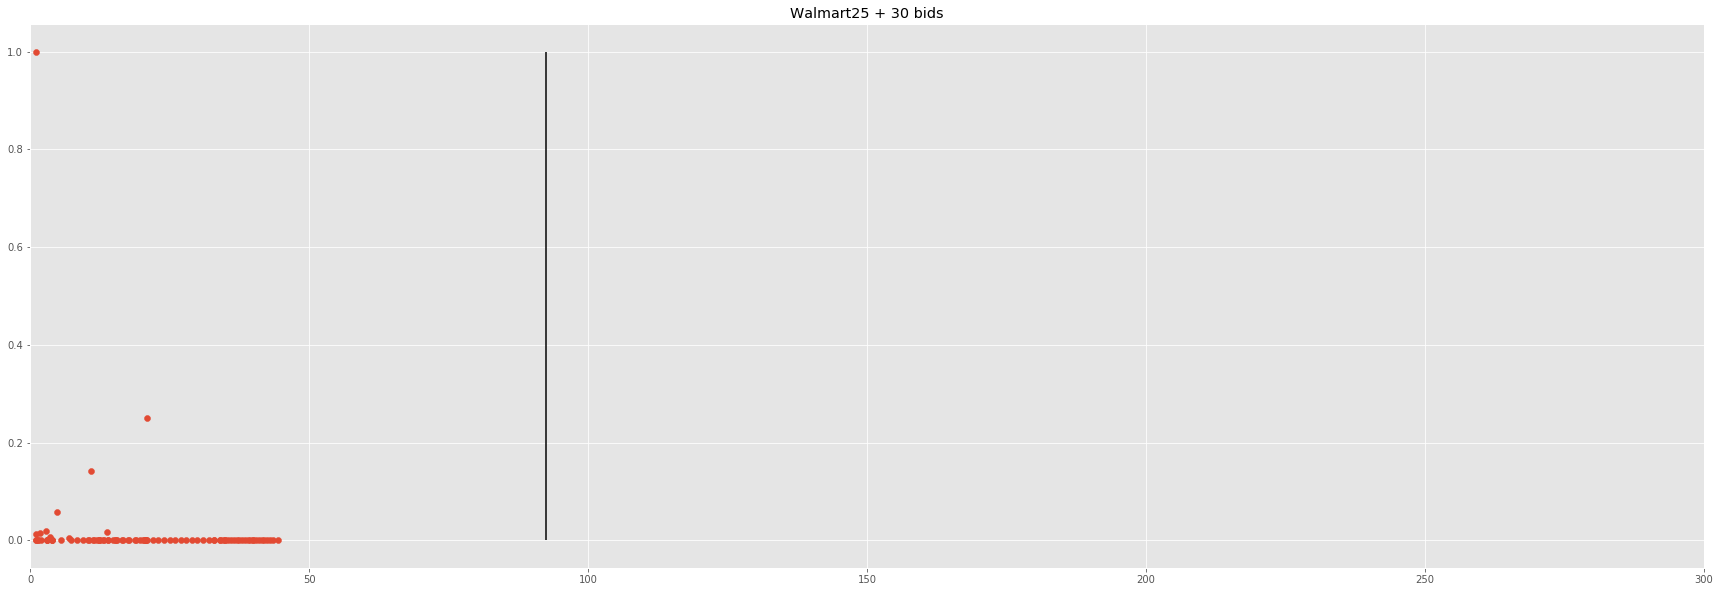

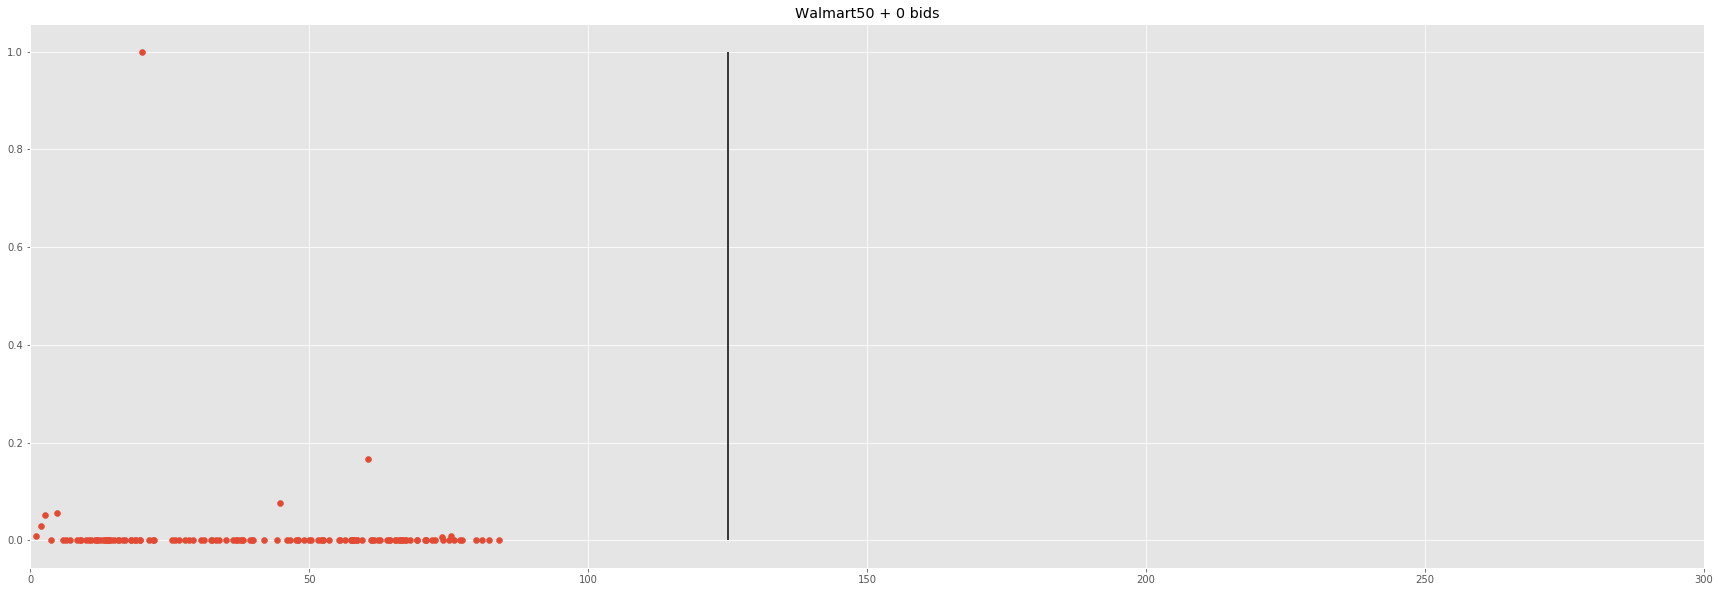

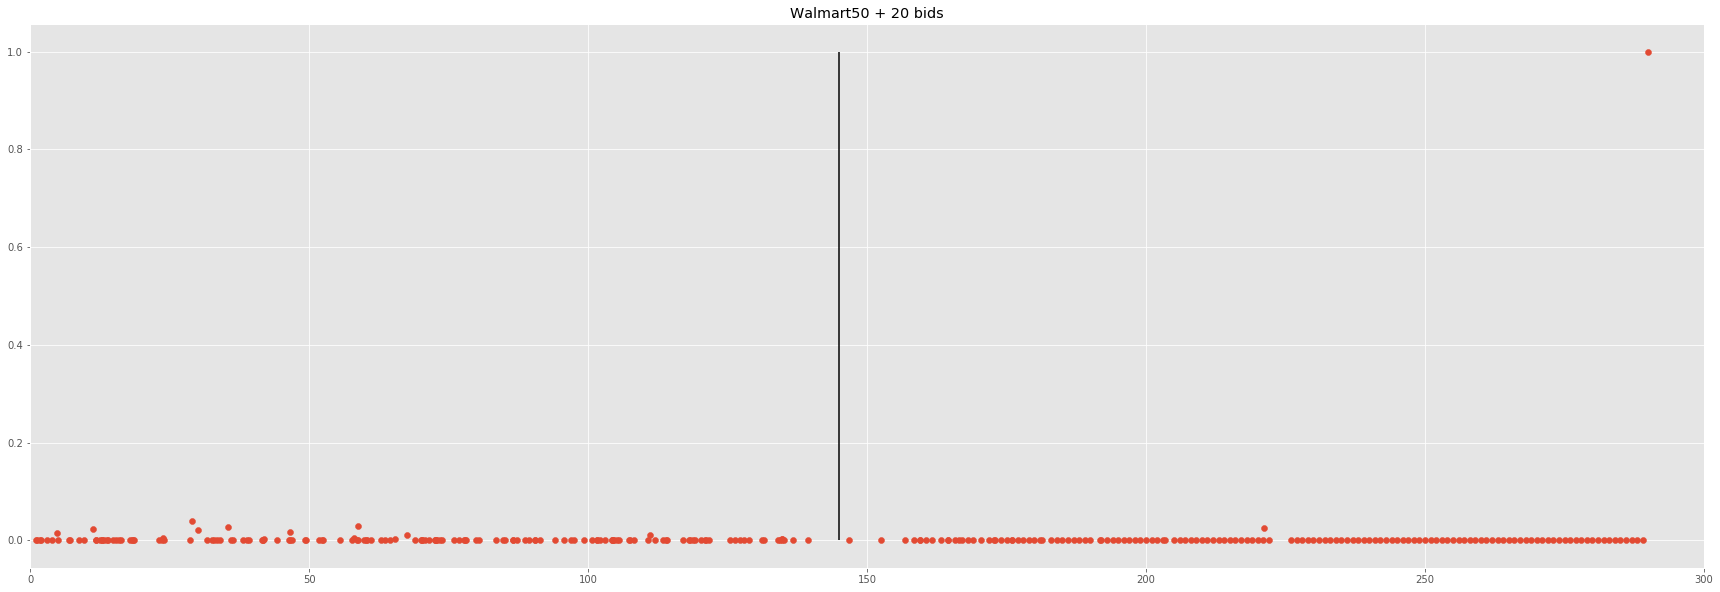

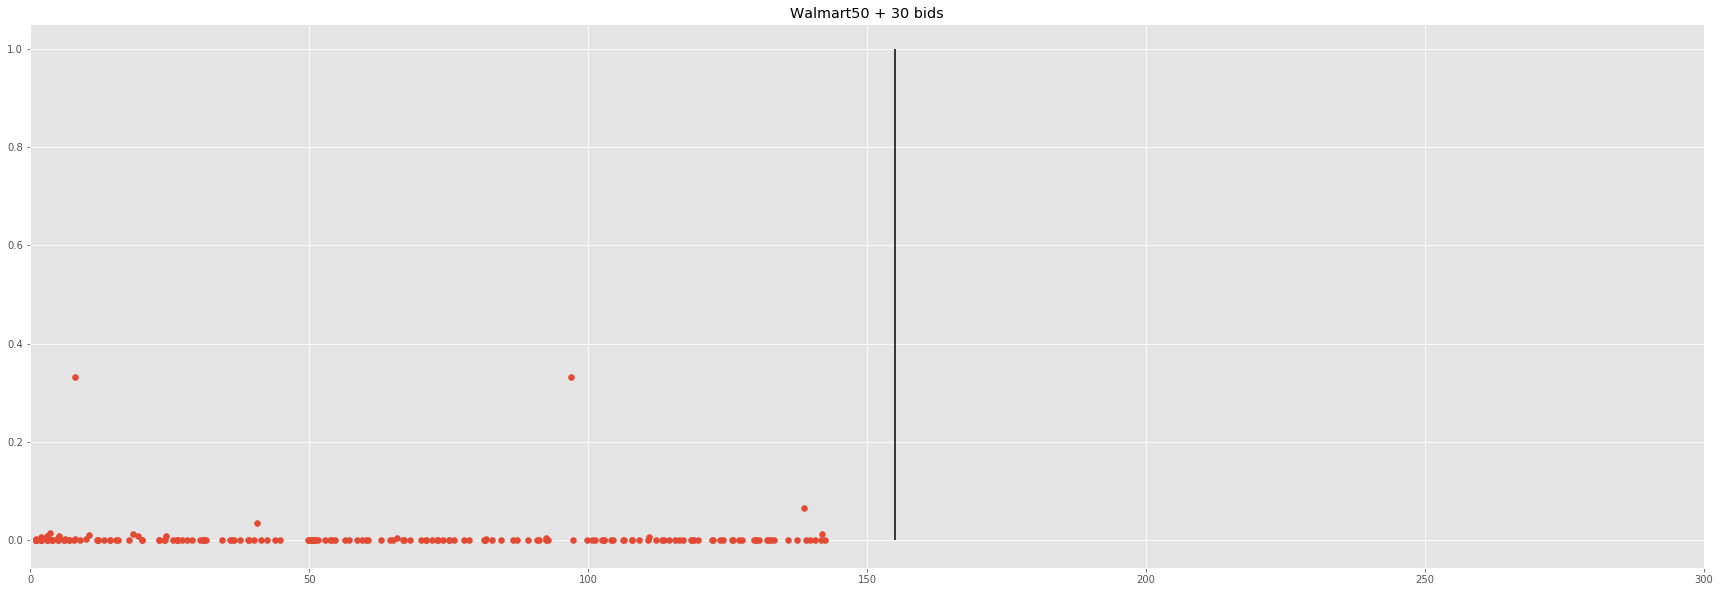

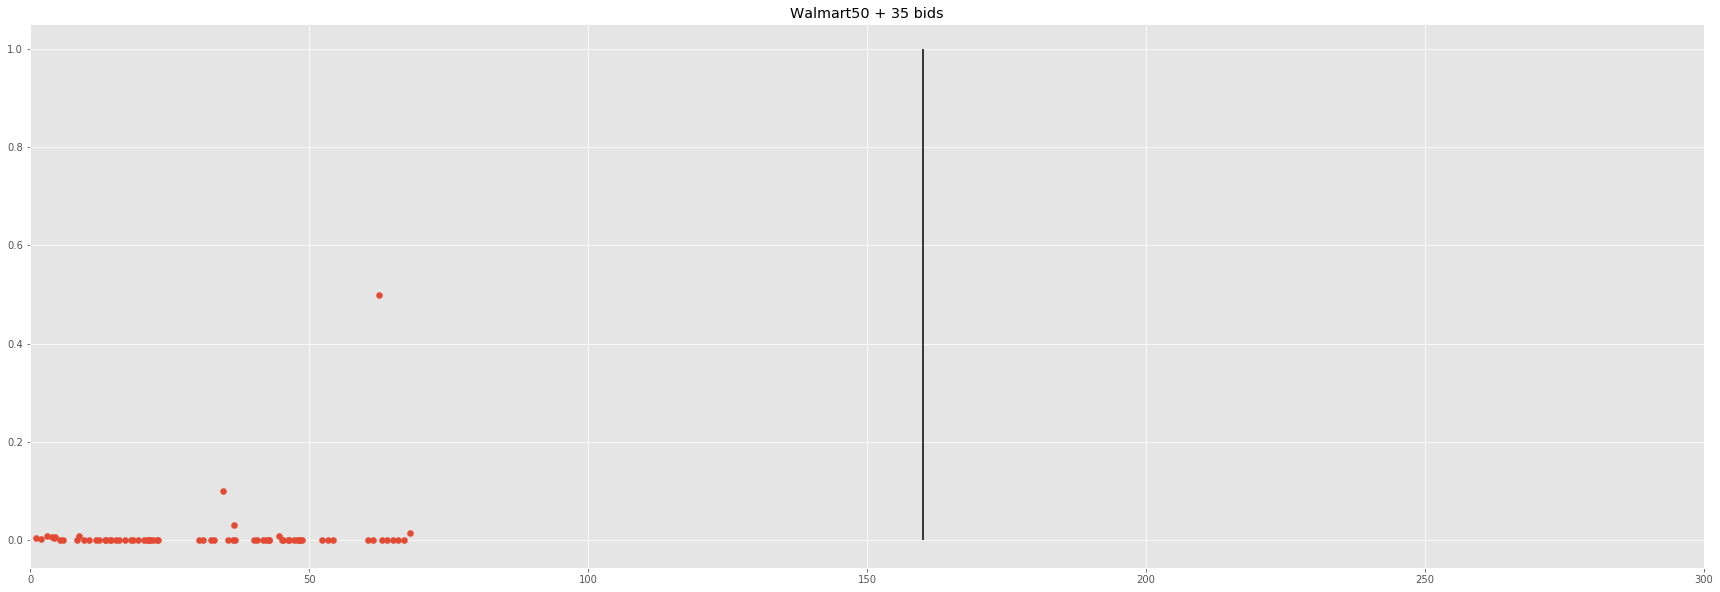

In [83]:
for a, idx in enumerate(df[df.is_winner==1].groupby(["cardtype", "cardvalue", "bidvalue"]).count().index):
    print(idx[0], idx[1], idx[2])
    bids = idx[1]*2.5 + idx[2]
    streak_df = df[(df.cardtype==idx[0])&(df.cardvalue==idx[1])&(df.bidvalue==idx[2])]
    streak_df = streak_df.groupby(["bids_so_far0"]).mean().reset_index()
 
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.set_ylim(bottom=0, top=.002)
    ax.set_xlim(left=0, right=300)
    ax.set_title(idx[0]+str(idx[1])+ " + " + str(idx[2]) + " bids")
    ax.scatter(streak_df.streak0, streak_df.is_winner)
    plt.vlines(x=bids, ymin=0, ymax=1)